In [ ]:
# libraries
#%matplotlib notebook
import os
import pandas as pd
import numpy as np
import json
from scipy.signal import periodogram
from sklearn.metrics import confusion_matrix, average_precision_score
import matplotlib
import seaborn
import matplotlib.dates as md
from matplotlib import pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dfsA1 = {}

# Loop through the range 1 to 67 (inclusive) and load data
for i in range(1, 68):
    file_path = f"/content/drive/My Drive/YAHOO/A1/Yahoo_A1real_{i}_data.out"
    dfsA1[i] = pd.read_csv(file_path, sep=",", names=[f"value_{i}", "label"])
    # Add a timestamp column assuming hourly data starting from '2022-01-01 00:00:00'
    start_time = pd.Timestamp('2022-01-01 00:00:00')
    dfsA1[i]['timestamp'] = [start_time + pd.Timedelta(hours=i) for i in range(len(dfsA1[i]))]

    # Set timestamp as the index for time-series processing
    dfsA1[i].set_index('timestamp', inplace=True)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Perform feature engineering
def feature_engineering(df, value_col, window_size):
    df = df.copy()

    # Rolling statistics
    df[f'rolling_mean_{window_size}'] = df[value_col].rolling(window=window_size).mean()
    df[f'rolling_std_{window_size}'] = df[value_col].rolling(window=window_size).std()
    df[f'rolling_min_{window_size}'] = df[value_col].rolling(window=window_size).min()
    df[f'rolling_max_{window_size}'] = df[value_col].rolling(window=window_size).max()

    # Time-based features
    df['hour'] = df.index.hour
    df['day_of_week'] = df.index.dayofweek
    df['day_of_month'] = df.index.day
    df['month'] = df.index.month
    df['Lag'] = df[value_col].shift(24)

    # Sinusoidal encoding for seasonality
    df['sin_day'] = np.sin(2 * np.pi * df.index.hour / 24)
    df['cos_day'] = np.cos(2 * np.pi * df.index.hour / 24)

    # Drop rows with NaN due to rolling statistics
    df.dropna(inplace=True)
    return df

## A1A - Long term Stationarity with weak seasonality


## OCSVM with temporal columns

Processing dataset dfsA1[1]...
Best F1 Score for dfsA1[1]: 0.1333
Best Precision: 0.0769
Best Recall: 0.5000
Best Parameters: {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.01}


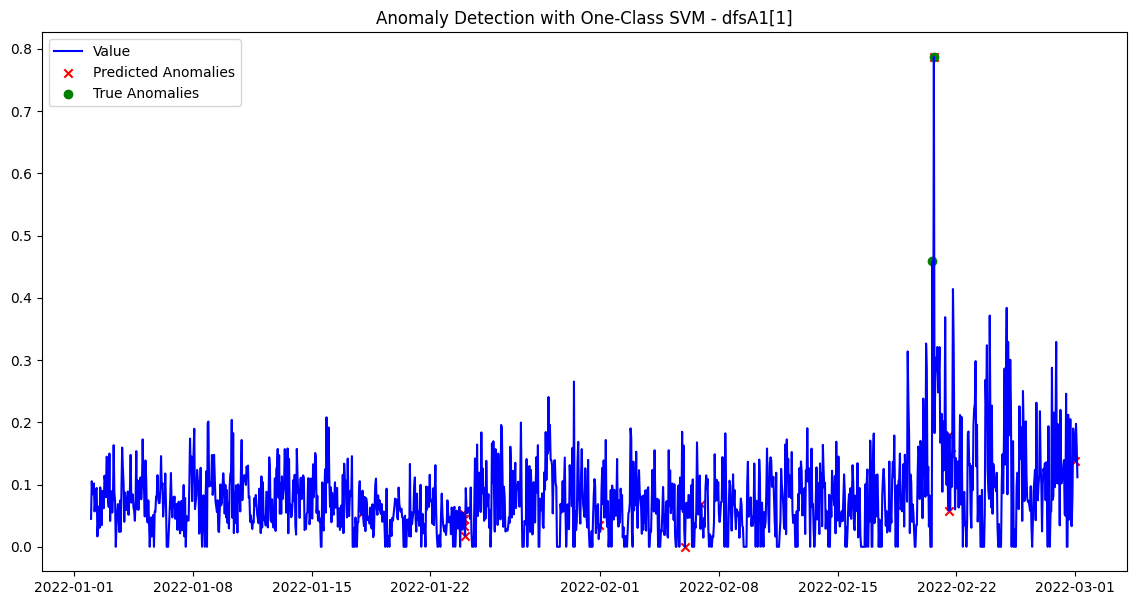

Processing dataset dfsA1[2]...
Best F1 Score for dfsA1[2]: 0.3333
Best Precision: 0.3571
Best Recall: 0.3125
Best Parameters: {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.01}


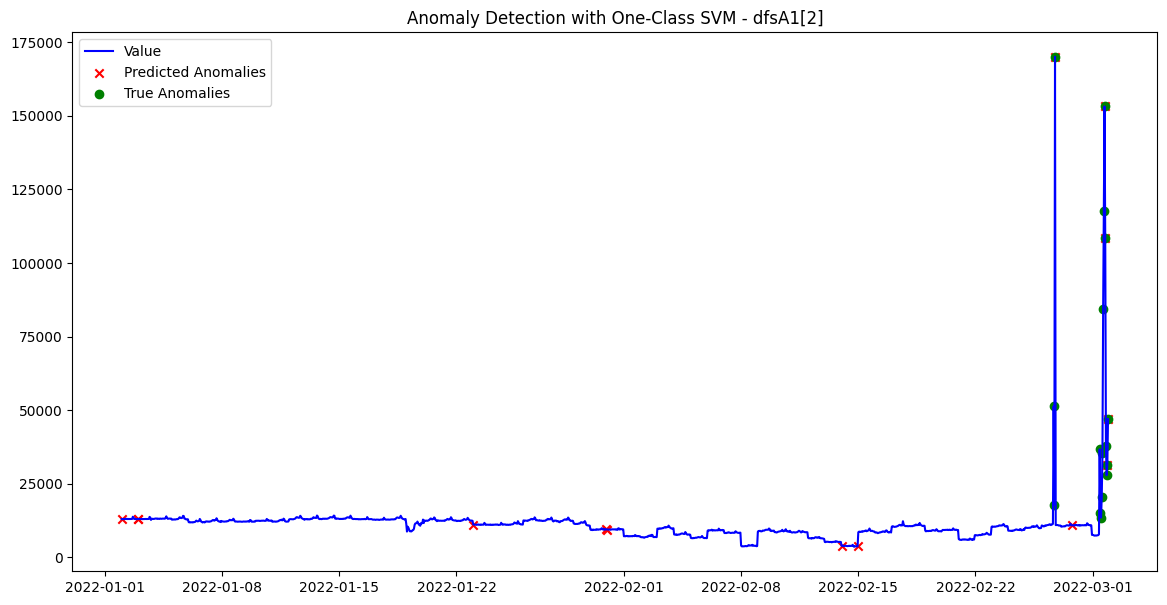

Processing dataset dfsA1[3]...
Best F1 Score for dfsA1[3]: 0.3448
Best Precision: 0.3571
Best Recall: 0.3333
Best Parameters: {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.01}


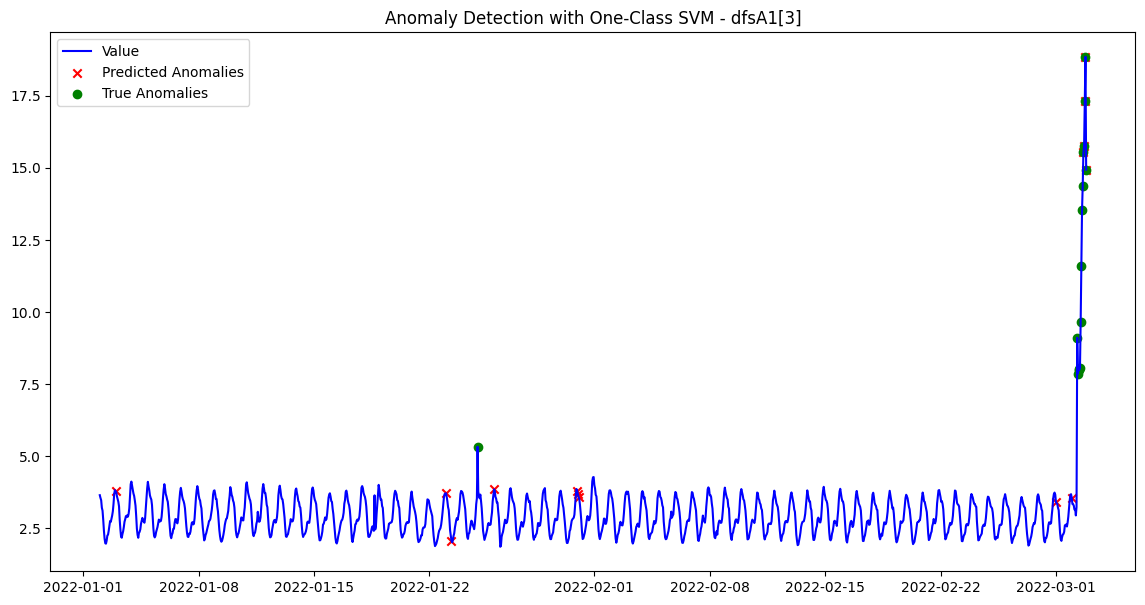

Processing dataset dfsA1[8]...
Best F1 Score for dfsA1[8]: 0.2400
Best Precision: 0.2000
Best Recall: 0.3000
Best Parameters: {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.01}


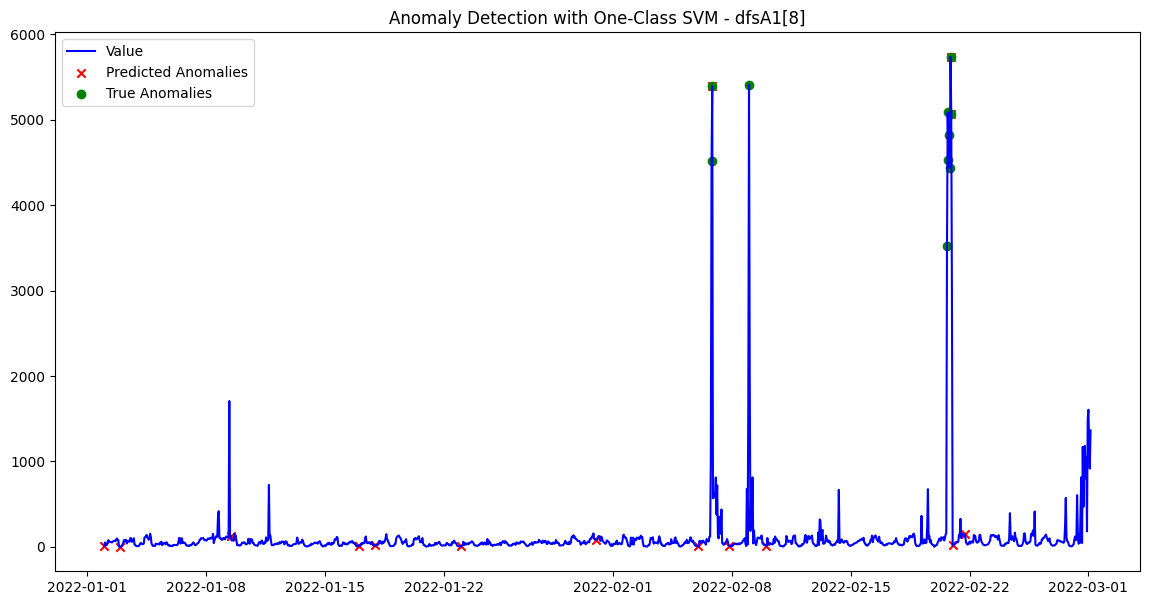

Processing dataset dfsA1[9]...
Best F1 Score for dfsA1[9]: 0.0870
Best Precision: 0.0667
Best Recall: 0.1250
Best Parameters: {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.01}


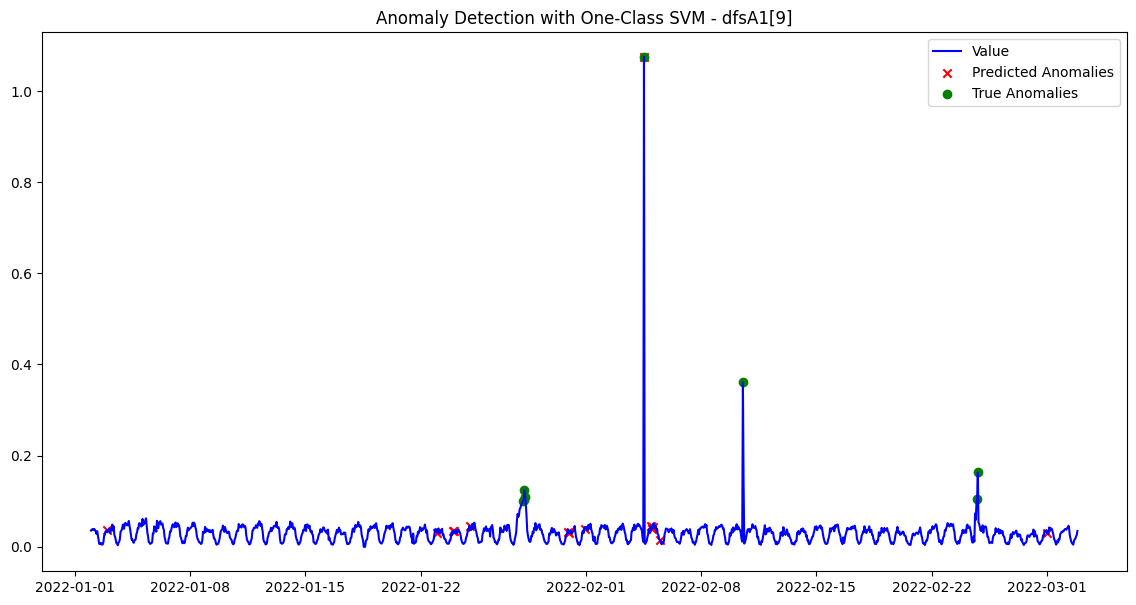

Processing dataset dfsA1[10]...
Best F1 Score for dfsA1[10]: 0.4138
Best Precision: 0.3750
Best Recall: 0.4615
Best Parameters: {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.01}


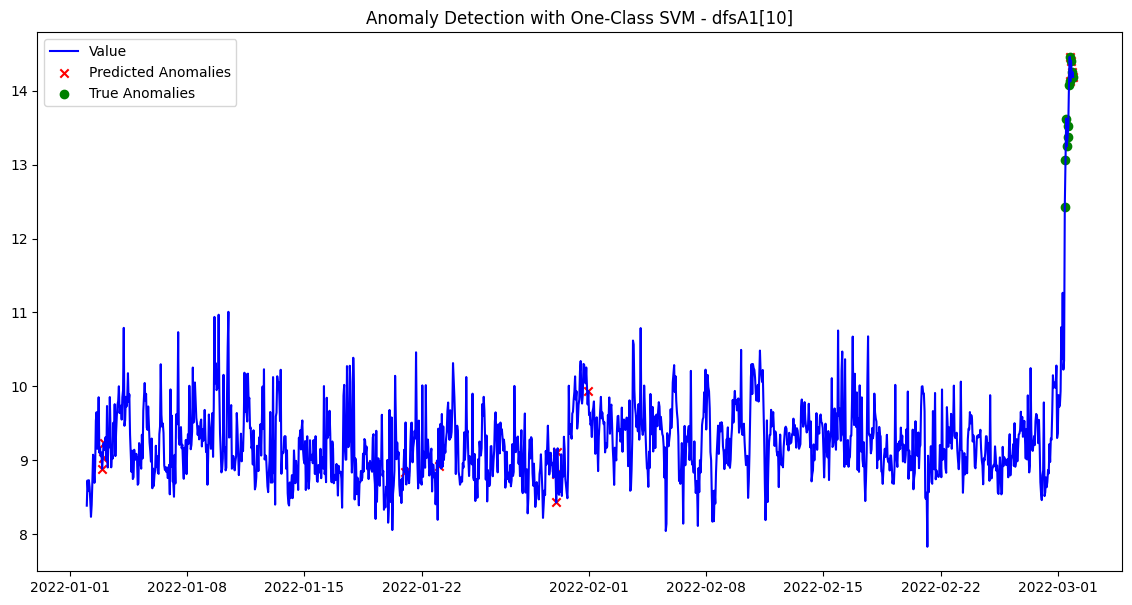

Processing dataset dfsA1[13]...
Best F1 Score for dfsA1[13]: 0.2222
Best Precision: 0.2000
Best Recall: 0.2500
Best Parameters: {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.01}


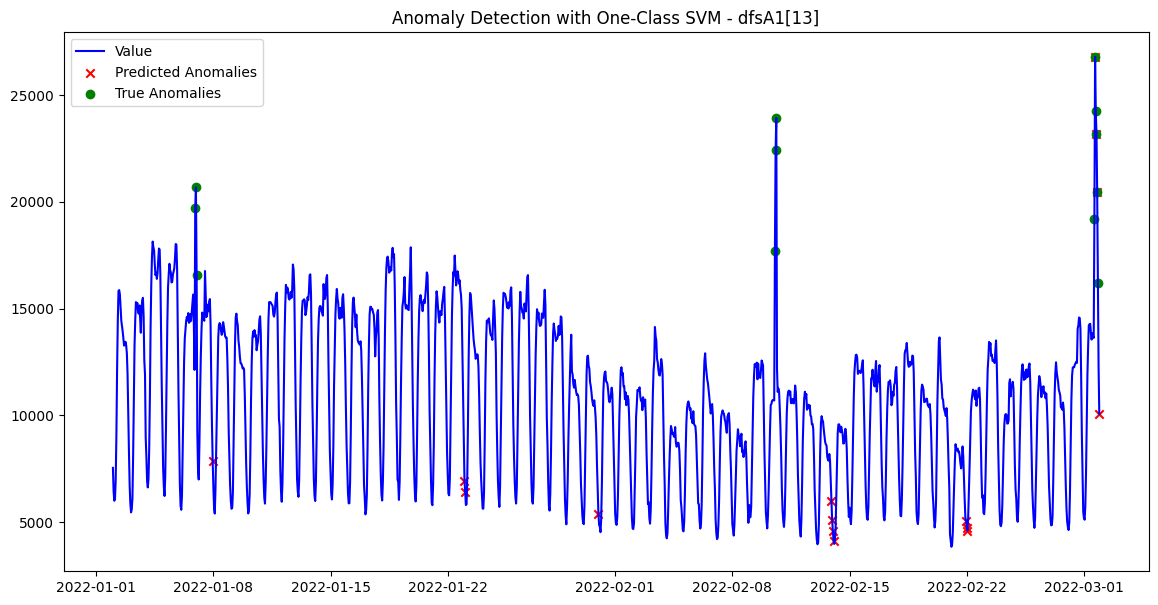

Processing dataset dfsA1[23]...
Best F1 Score for dfsA1[23]: 0.2424
Best Precision: 0.2857
Best Recall: 0.2105
Best Parameters: {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.01}


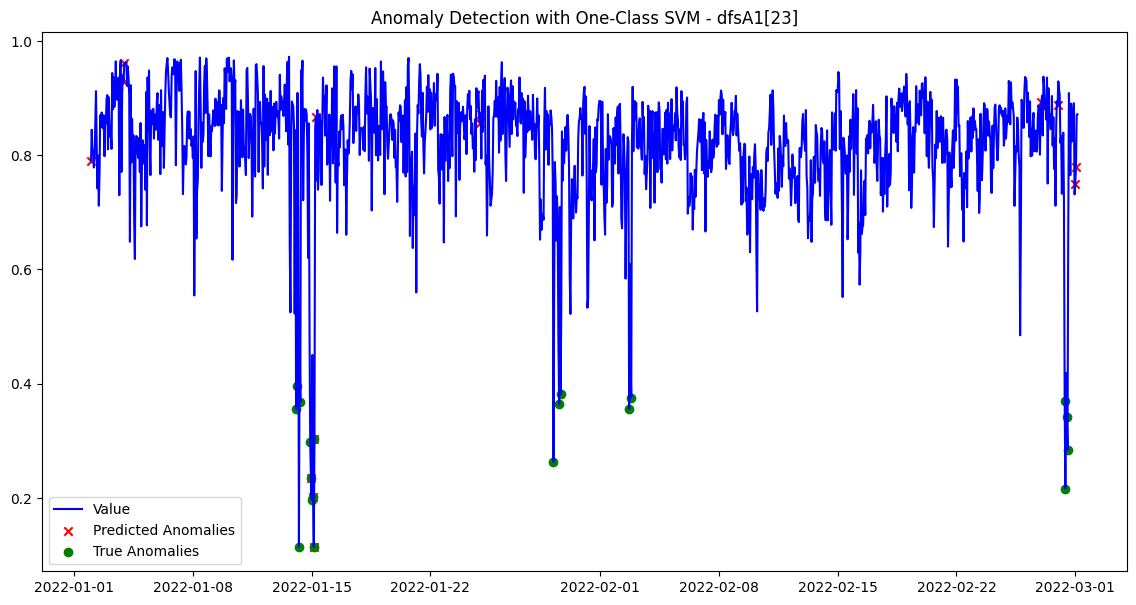

Processing dataset dfsA1[24]...
Best F1 Score for dfsA1[24]: 0.4516
Best Precision: 0.4667
Best Recall: 0.4375
Best Parameters: {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.01}


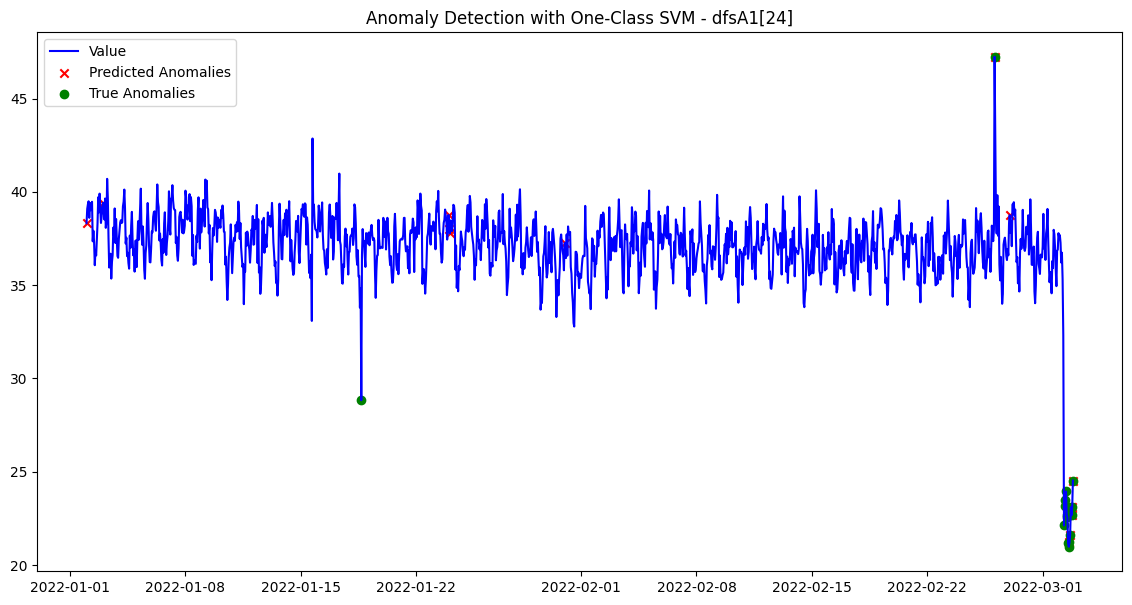

Processing dataset dfsA1[27]...
Best F1 Score for dfsA1[27]: 0.1333
Best Precision: 0.0769
Best Recall: 0.5000
Best Parameters: {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.01}


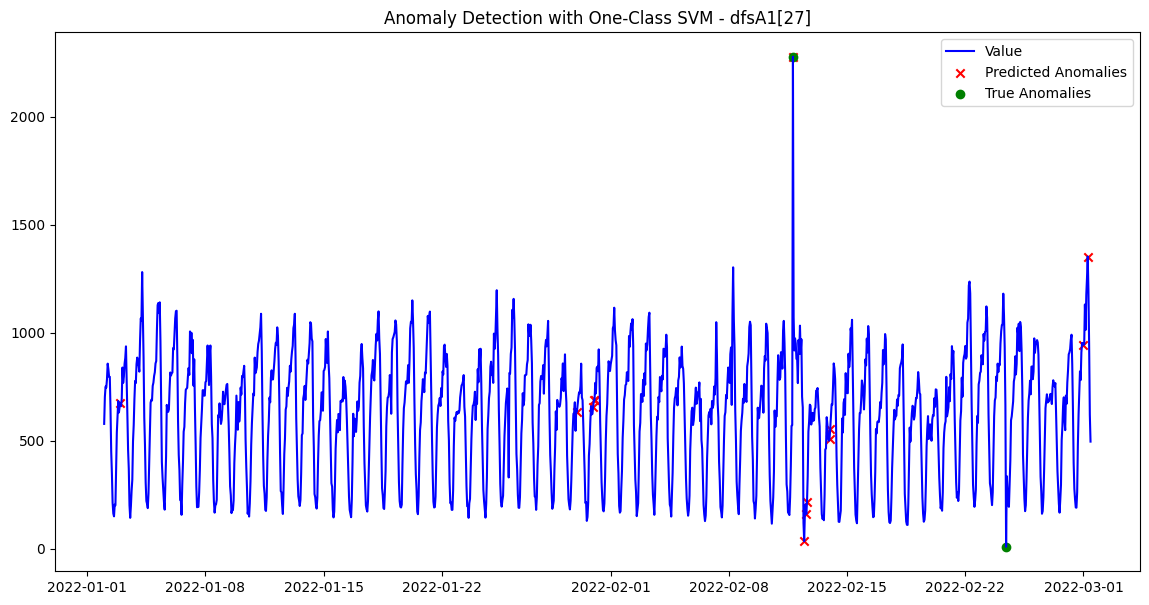

Processing dataset dfsA1[34]...
Best F1 Score for dfsA1[34]: 0.2609
Best Precision: 0.1875
Best Recall: 0.4286
Best Parameters: {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.01}


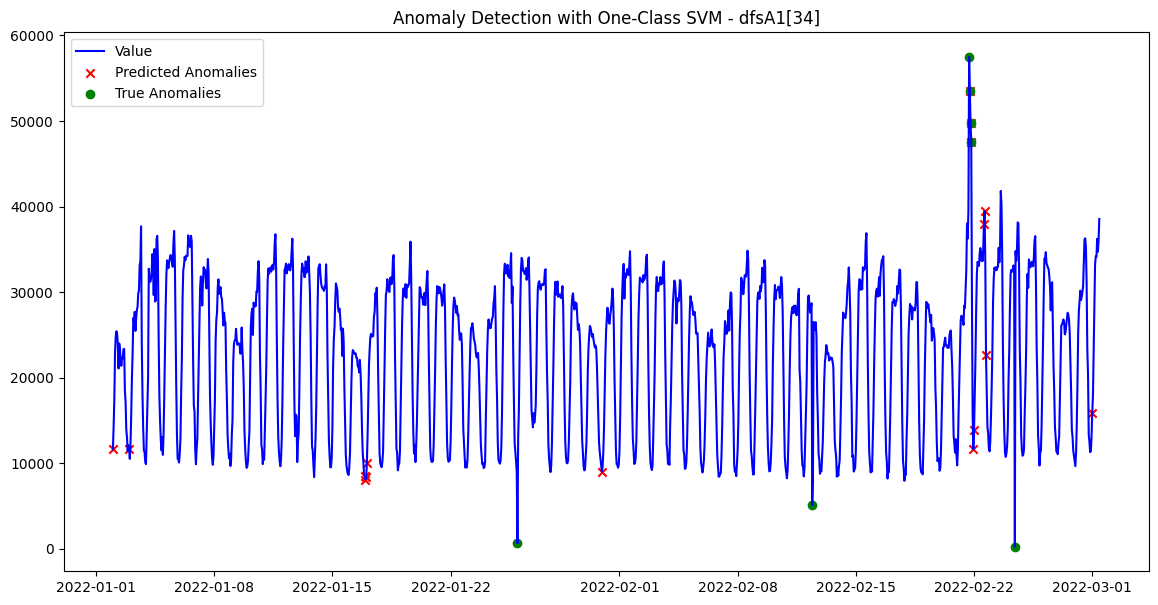

Processing dataset dfsA1[41]...
Best F1 Score for dfsA1[41]: 0.3158
Best Precision: 0.1875
Best Recall: 1.0000
Best Parameters: {'gamma': 'scale', 'kernel': 'rbf', 'nu': 0.01}


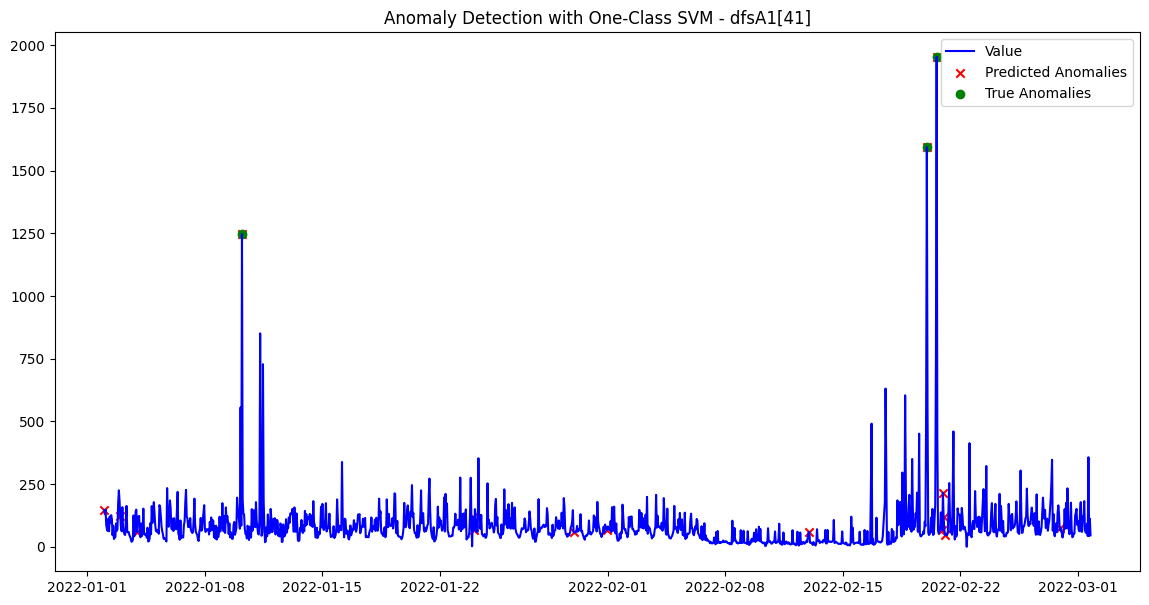

Processing dataset dfsA1[66]...
Best F1 Score for dfsA1[66]: 0.2444
Best Precision: 0.1594
Best Recall: 0.5238
Best Parameters: {'gamma': 'scale', 'kernel': 'rbf', 'nu': 0.05}


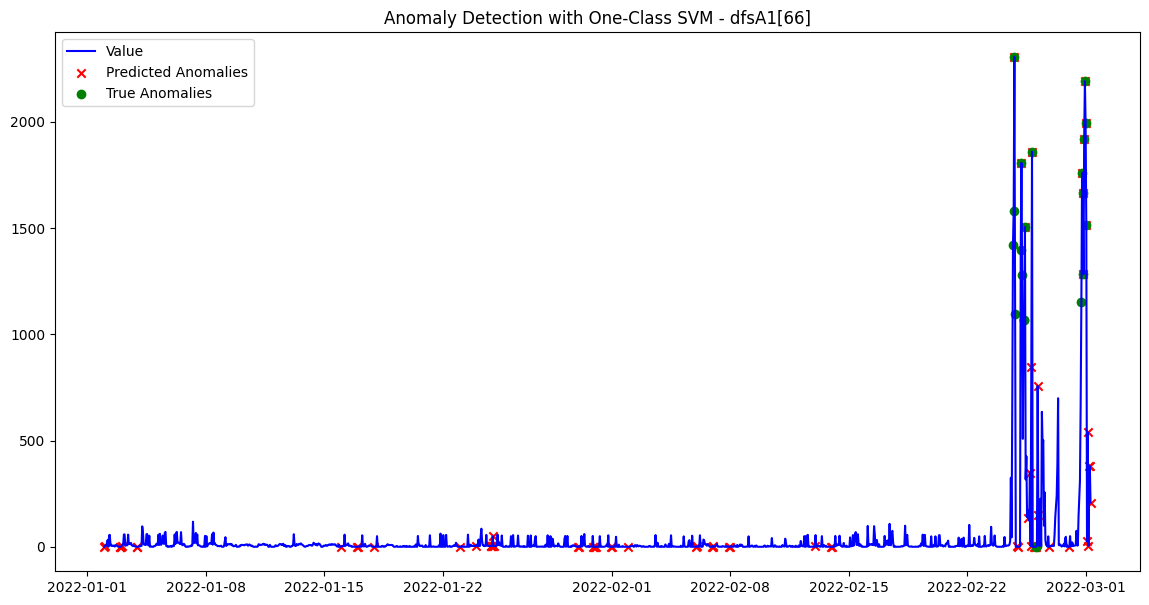

Average F1 Score across all datasets: 0.2633
Average Precision across all datasets: 0.2305
Average Recall across all datasets: 0.4141
All F1 Scores for each dataset: 0.1333, 0.3333, 0.3448, 0.2400, 0.0870, 0.4138, 0.2222, 0.2424, 0.4516, 0.1333, 0.2609, 0.3158, 0.2444


In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Define A1A and ParameterGrid for hyperparameter tuning
A1A = [1,2,3,8,9,10,13,23,24,27,34,41,66]
param_grid = {
    'nu': [0.01, 0.05, 0.1],
    'kernel': ['rbf'],
    'gamma': ['scale', 'auto']
}
grid = ParameterGrid(param_grid)

# To calculate the average F1 score, precision, and recall
f1_scores = []
precision_scores = []
recall_scores = []

# Iterate through datasets
for i in A1A:
    print(f"Processing dataset dfsA1[{i}]...")

    # Feature engineering (you'll need to implement this function)
    data_features = feature_engineering(dfsA1[i], value_col=f"value_{i}", window_size=24)

    # Separate features and labels
    X = data_features.drop(columns=['label'])  # Drop the label column
    y = data_features['label']  # Ground truth labels

    # Normalize features
    scaler = MinMaxScaler()
    X_normalized = scaler.fit_transform(X)

    # Hyperparameter tuning using grid search
    best_f1 = -1
    best_precision = -1
    best_recall = -1
    best_params = None
    best_predictions = None

    for params in grid:
        # Train One-Class SVM with current parameters
        ocsvm = OneClassSVM(
            nu=params['nu'],
            kernel=params['kernel'],
            gamma=params['gamma']
        )
        ocsvm.fit(X_normalized)
        predictions = ocsvm.predict(X_normalized)

        # Map predictions to binary (1 = anomaly, 0 = normal)
        predictions = [1 if pred == -1 else 0 for pred in predictions]

        # Calculate metrics
        f1 = f1_score(y, predictions)
        precision = precision_score(y, predictions)
        recall = recall_score(y, predictions)

        # Update best parameters if current F1 is better
        if f1 > best_f1:
            best_f1 = f1
            best_precision = precision
            best_recall = recall
            best_params = params
            best_predictions = predictions

    # Append best metrics for the dataset
    f1_scores.append(best_f1)
    precision_scores.append(best_precision)
    recall_scores.append(best_recall)

    # Output best parameters and metrics for current dataset
    print(f"Best F1 Score for dfsA1[{i}]: {best_f1:.4f}")
    print(f"Best Precision: {best_precision:.4f}")
    print(f"Best Recall: {best_recall:.4f}")
    print(f"Best Parameters: {best_params}")

    # Add predictions to the original DataFrame for inspection
    data_features['predictions'] = best_predictions

    # Visualize anomalies
    plt.figure(figsize=(14, 7))
    plt.plot(data_features.index, data_features[f"value_{i}"], label='Value', color='blue')
    plt.scatter(data_features[data_features['predictions'] == 1].index,
                data_features[data_features['predictions'] == 1][f"value_{i}"],
                color='red', label='Predicted Anomalies', marker='x')
    plt.scatter(data_features[data_features['label'] == 1].index,
                data_features[data_features['label'] == 1][f"value_{i}"],
                color='green', label='True Anomalies', marker='o')

    plt.title(f'Anomaly Detection with One-Class SVM - dfsA1[{i}]')
    plt.legend()
    plt.show()

# Calculate and output the average metrics
avg_f1_score = sum(f1_scores) / len(f1_scores)
avg_precision = sum(precision_scores) / len(precision_scores)
avg_recall = sum(recall_scores) / len(recall_scores)
print(f"Average F1 Score across all datasets: {avg_f1_score:.4f}")
print(f"Average Precision across all datasets: {avg_precision:.4f}")
print(f"Average Recall across all datasets: {avg_recall:.4f}")
# Print each F1 score formatted individually
formatted_f1_scores = [f"{score:.4f}" for score in f1_scores]
print(f"All F1 Scores for each dataset: {', '.join(formatted_f1_scores)}")





## no temp

Processing dataset dfsA1[1]...
Best F1 Score for dfsA1[1]: 0.1333
Best Precision: 0.0714
Best Recall: 1.0000
Best Parameters: {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.05}


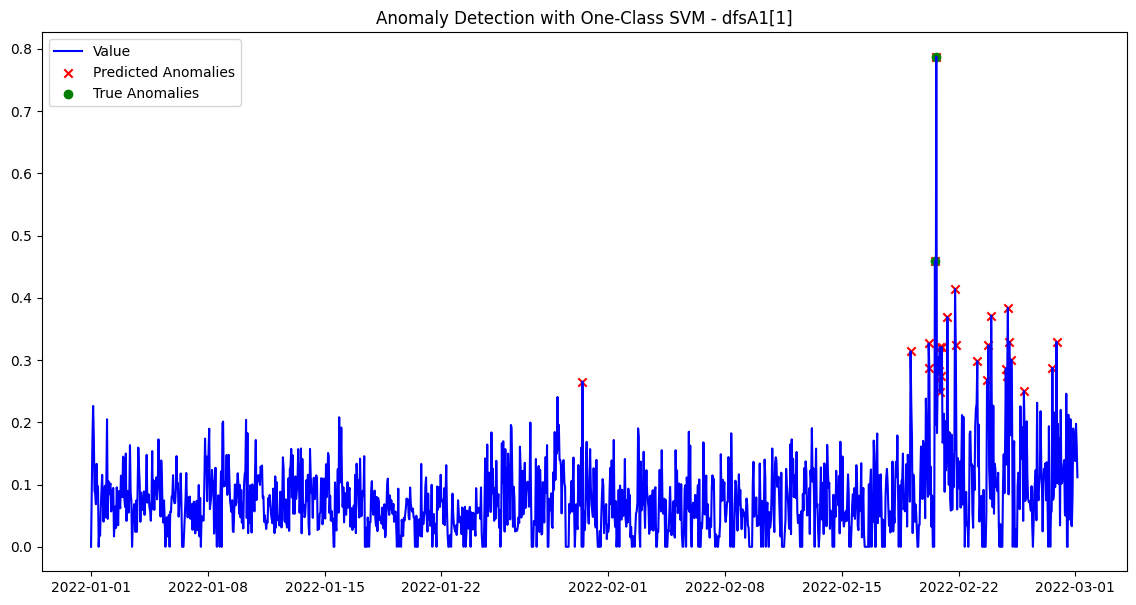

Processing dataset dfsA1[2]...
Best F1 Score for dfsA1[2]: 0.3409
Best Precision: 0.2083
Best Recall: 0.9375
Best Parameters: {'gamma': 'scale', 'kernel': 'rbf', 'nu': 0.05}


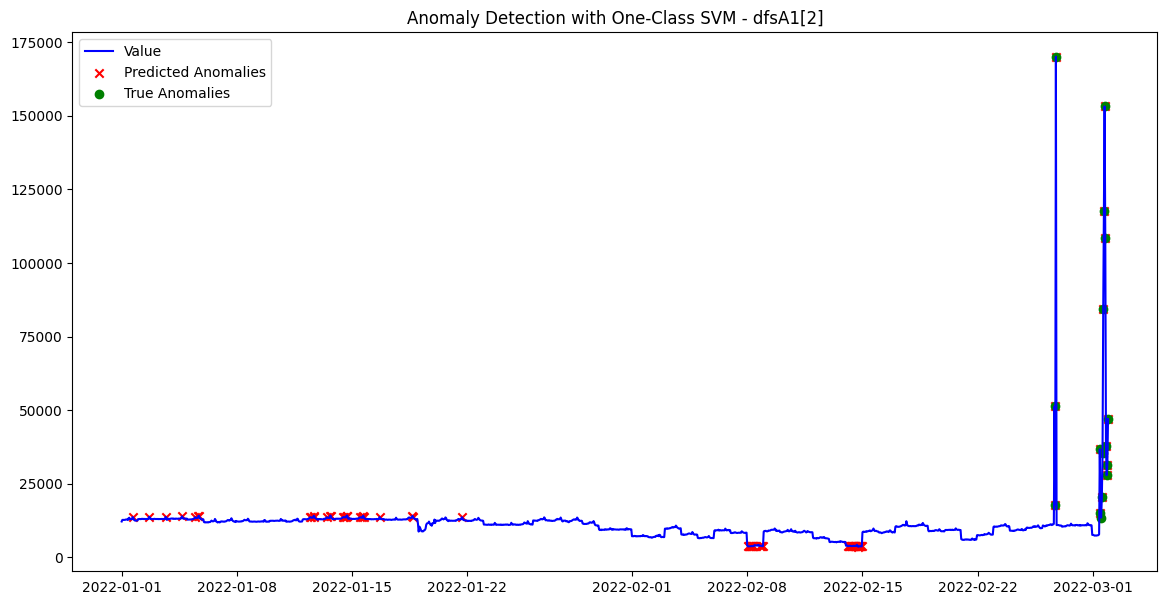

Processing dataset dfsA1[3]...
Best F1 Score for dfsA1[3]: 0.4138
Best Precision: 0.4286
Best Recall: 0.4000
Best Parameters: {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.01}


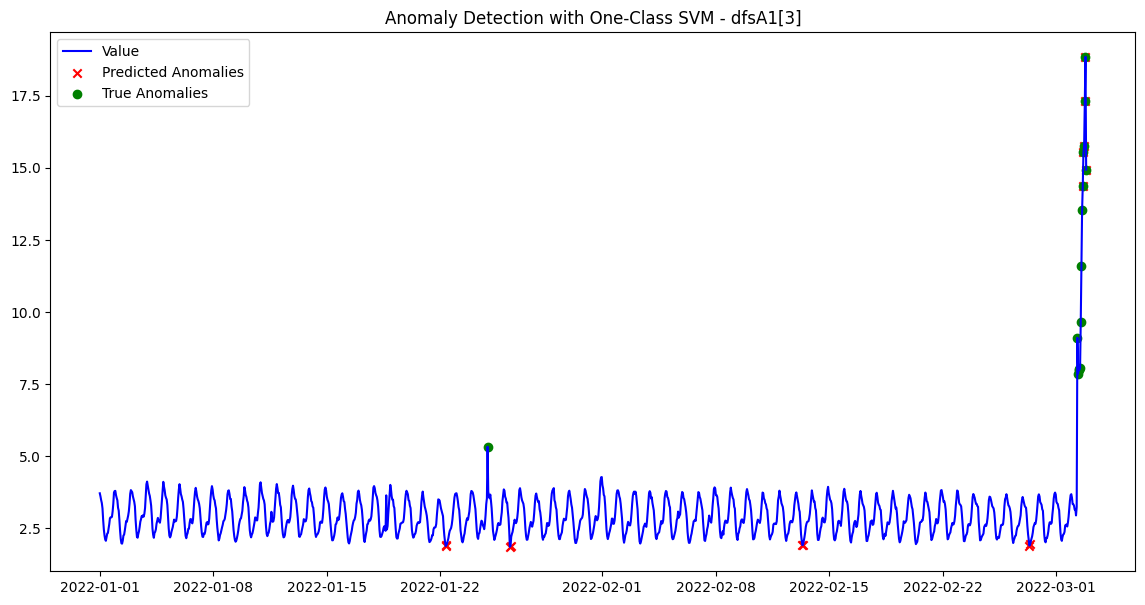

Processing dataset dfsA1[8]...
Best F1 Score for dfsA1[8]: 0.6087
Best Precision: 0.5385
Best Recall: 0.7000
Best Parameters: {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.01}


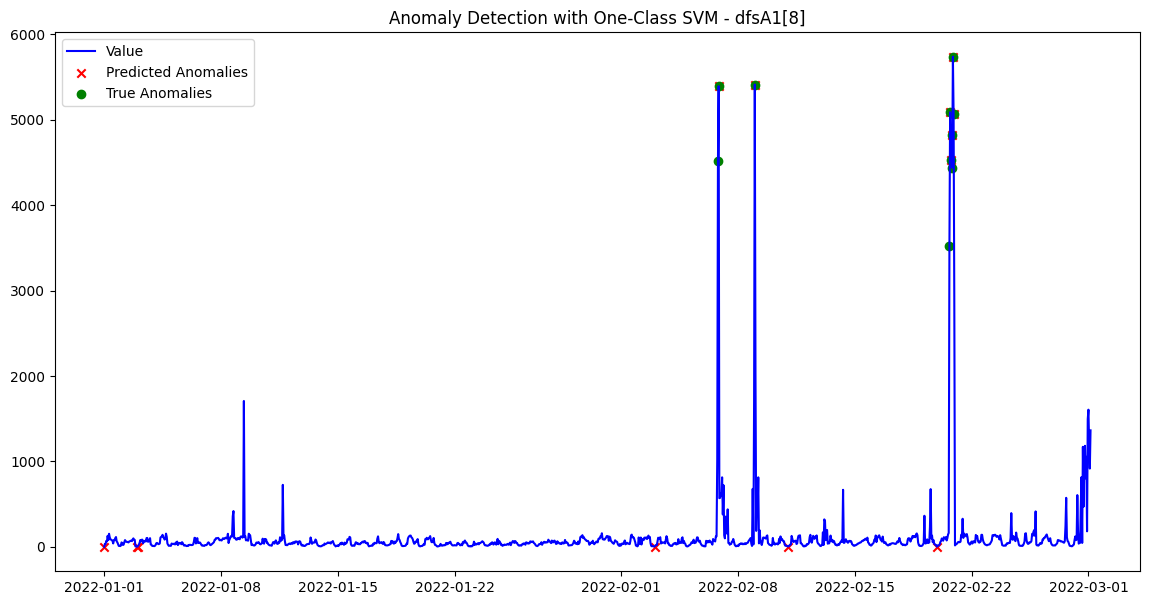

Processing dataset dfsA1[9]...
Best F1 Score for dfsA1[9]: 0.2727
Best Precision: 0.2143
Best Recall: 0.3750
Best Parameters: {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.01}


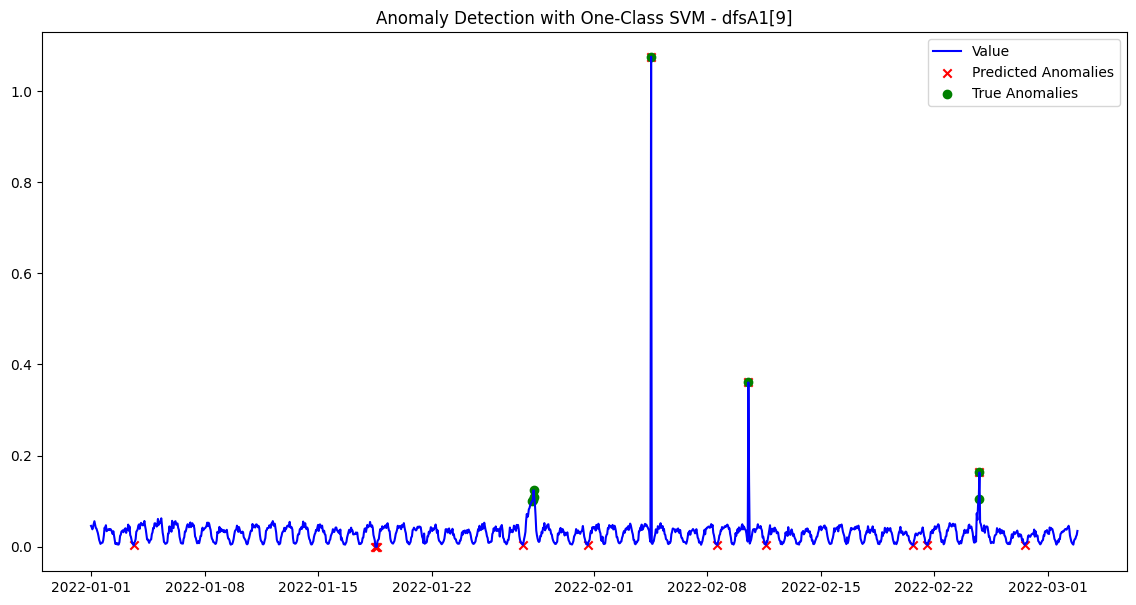

Processing dataset dfsA1[10]...
Best F1 Score for dfsA1[10]: 0.5000
Best Precision: 0.4667
Best Recall: 0.5385
Best Parameters: {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.01}


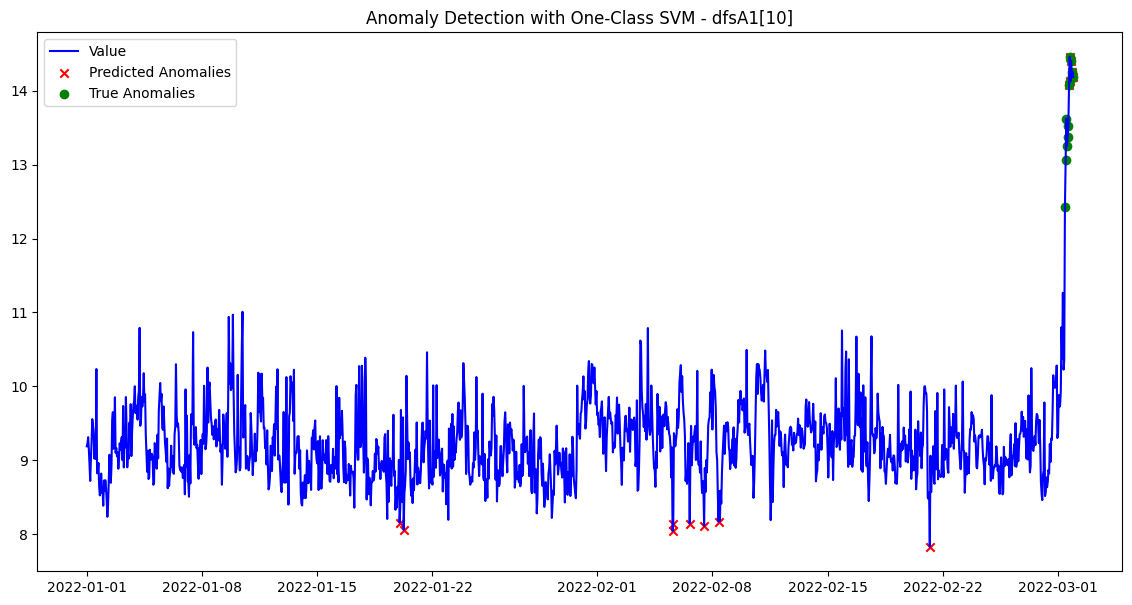

Processing dataset dfsA1[13]...
Best F1 Score for dfsA1[13]: 0.4800
Best Precision: 0.4615
Best Recall: 0.5000
Best Parameters: {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.01}


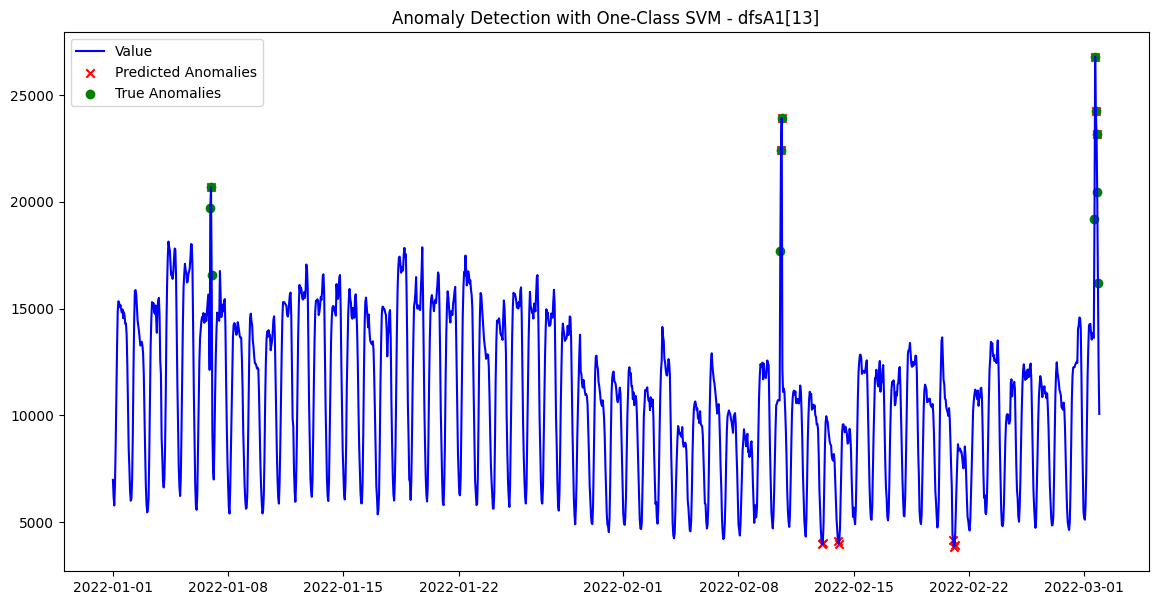

Processing dataset dfsA1[23]...
Best F1 Score for dfsA1[23]: 0.4222
Best Precision: 0.2676
Best Recall: 1.0000
Best Parameters: {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.05}


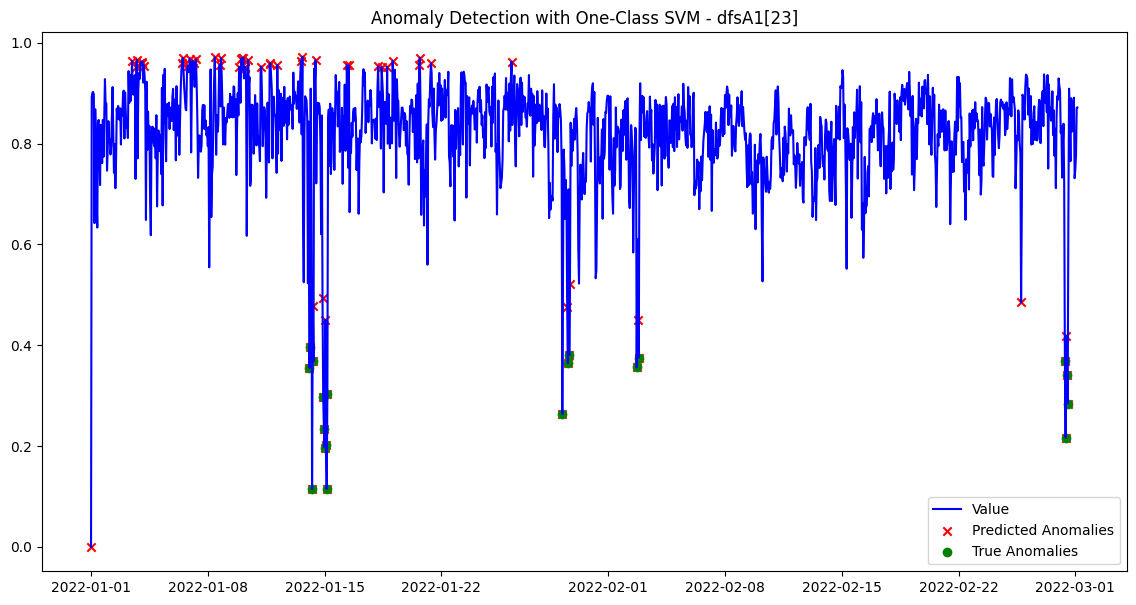

Processing dataset dfsA1[24]...
Best F1 Score for dfsA1[24]: 0.5625
Best Precision: 0.5625
Best Recall: 0.5625
Best Parameters: {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.01}


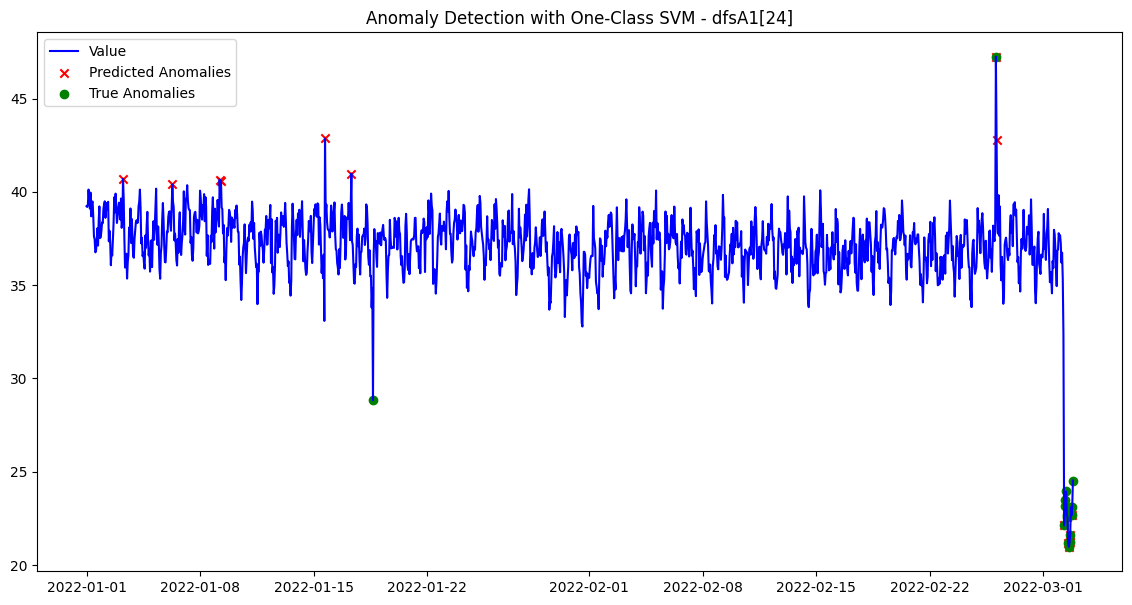

Processing dataset dfsA1[27]...
Best F1 Score for dfsA1[27]: 0.2500
Best Precision: 0.1429
Best Recall: 1.0000
Best Parameters: {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.01}


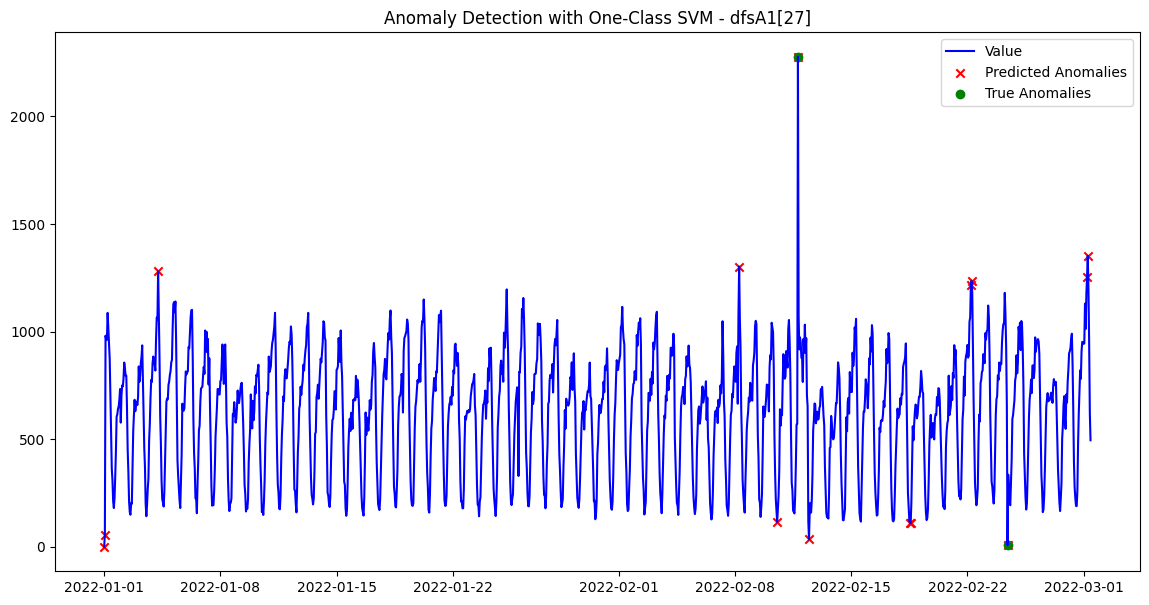

Processing dataset dfsA1[34]...
Best F1 Score for dfsA1[34]: 0.7000
Best Precision: 0.5385
Best Recall: 1.0000
Best Parameters: {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.01}


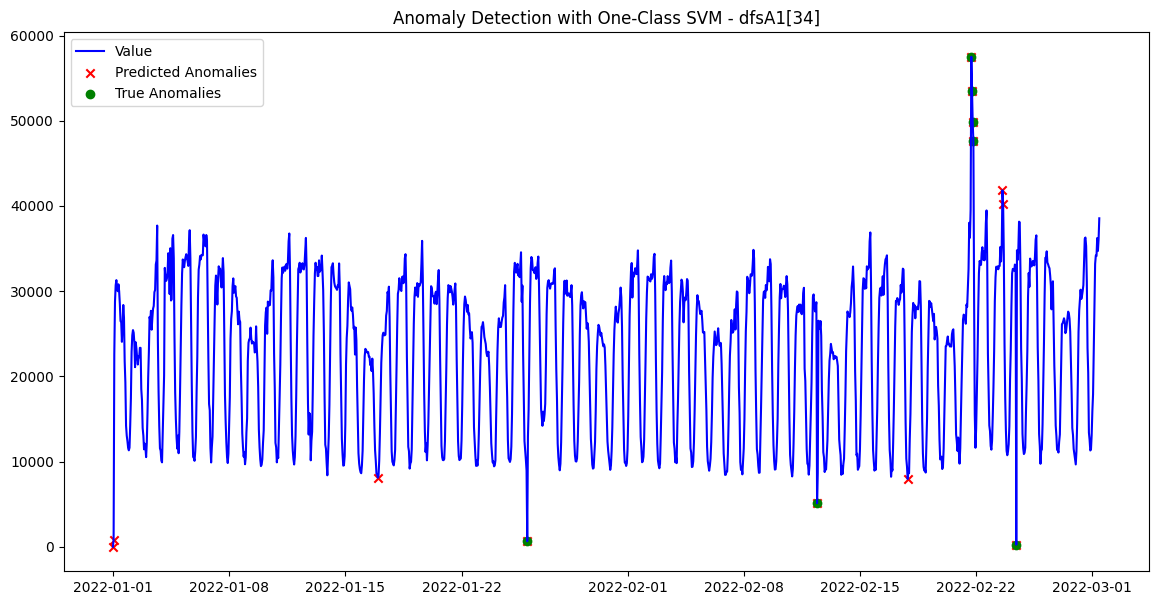

Processing dataset dfsA1[41]...
Best F1 Score for dfsA1[41]: 0.3333
Best Precision: 0.2000
Best Recall: 1.0000
Best Parameters: {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.01}


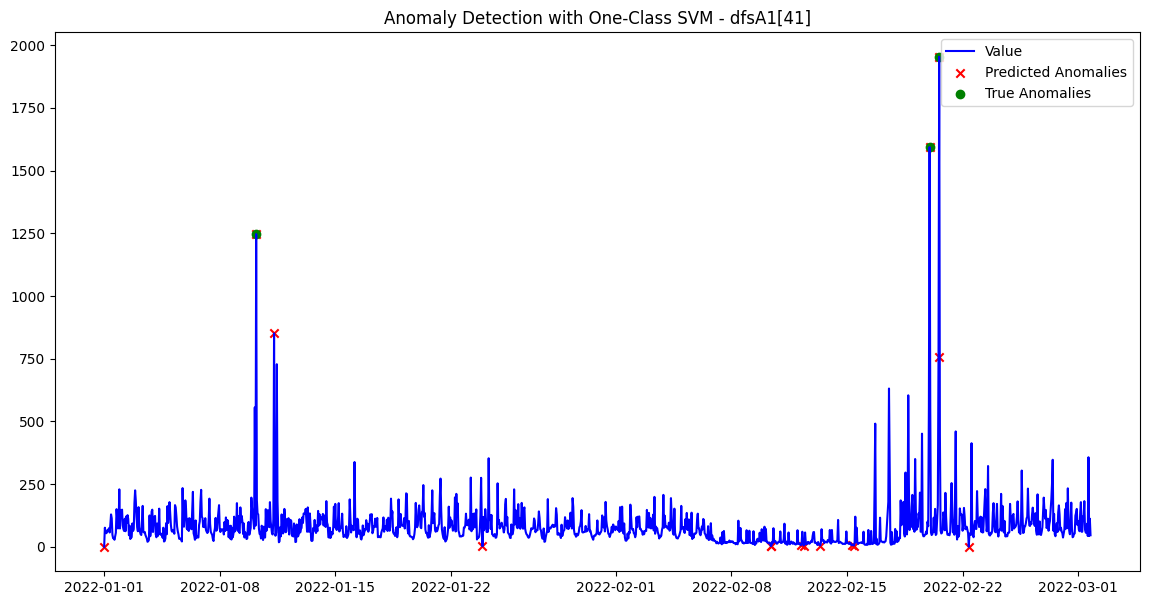

Processing dataset dfsA1[66]...
Best F1 Score for dfsA1[66]: 0.9048
Best Precision: 0.9048
Best Recall: 0.9048
Best Parameters: {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.05}


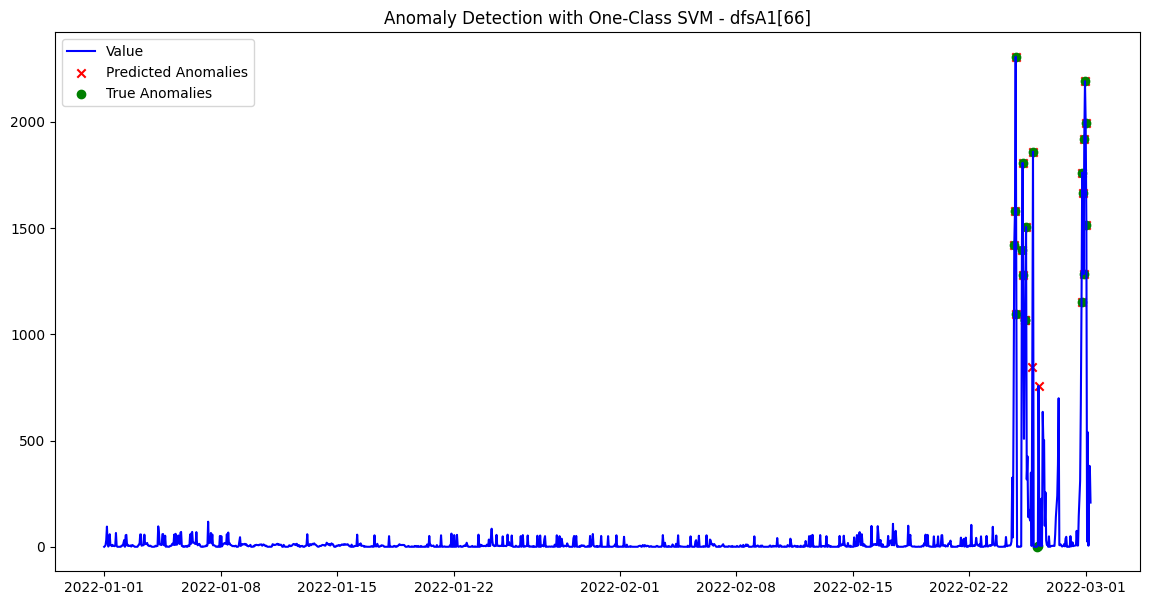

Average F1 Score across all datasets: 0.4556
Average Precision across all datasets: 0.3850
Average Recall across all datasets: 0.7629
All F1 Scores for each dataset: 0.1333, 0.3409, 0.4138, 0.6087, 0.2727, 0.5000, 0.4800, 0.4222, 0.5625, 0.2500, 0.7000, 0.3333, 0.9048


In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Define A1A and ParameterGrid for hyperparameter tuning
A1A = [1,2,3,8,9,10,13,23,24,27,34,41,66]
param_grid = {
    'nu': [0.01, 0.05, 0.1],
    'kernel': ['rbf'],
    'gamma': ['scale', 'auto']
}
grid = ParameterGrid(param_grid)

# To calculate the average F1 score, precision, and recall
f1_scores = []
precision_scores = []
recall_scores = []

# Iterate through datasets
for i in A1A:
    print(f"Processing dataset dfsA1[{i}]...")

    # Feature engineering (you'll need to implement this function)
    data_features = dfsA1[i]

    # Separate features and labels
    X = data_features.drop(columns=['label'])  # Drop the label column
    y = data_features['label']  # Ground truth labels

    # Normalize features
    scaler = MinMaxScaler()
    X_normalized = scaler.fit_transform(X)

    # Hyperparameter tuning using grid search
    best_f1 = -1
    best_precision = -1
    best_recall = -1
    best_params = None
    best_predictions = None

    for params in grid:
        # Train One-Class SVM with current parameters
        ocsvm = OneClassSVM(
            nu=params['nu'],
            kernel=params['kernel'],
            gamma=params['gamma']
        )
        ocsvm.fit(X_normalized)
        predictions = ocsvm.predict(X_normalized)

        # Map predictions to binary (1 = anomaly, 0 = normal)
        predictions = [1 if pred == -1 else 0 for pred in predictions]

        # Calculate metrics
        f1 = f1_score(y, predictions)
        precision = precision_score(y, predictions)
        recall = recall_score(y, predictions)

        # Update best parameters if current F1 is better
        if f1 > best_f1:
            best_f1 = f1
            best_precision = precision
            best_recall = recall
            best_params = params
            best_predictions = predictions

    # Append best metrics for the dataset
    f1_scores.append(best_f1)
    precision_scores.append(best_precision)
    recall_scores.append(best_recall)

    # Output best parameters and metrics for current dataset
    print(f"Best F1 Score for dfsA1[{i}]: {best_f1:.4f}")
    print(f"Best Precision: {best_precision:.4f}")
    print(f"Best Recall: {best_recall:.4f}")
    print(f"Best Parameters: {best_params}")

    # Add predictions to the original DataFrame for inspection
    data_features['predictions'] = best_predictions

    # Visualize anomalies
    plt.figure(figsize=(14, 7))
    plt.plot(data_features.index, data_features[f"value_{i}"], label='Value', color='blue')
    plt.scatter(data_features[data_features['predictions'] == 1].index,
                data_features[data_features['predictions'] == 1][f"value_{i}"],
                color='red', label='Predicted Anomalies', marker='x')
    plt.scatter(data_features[data_features['label'] == 1].index,
                data_features[data_features['label'] == 1][f"value_{i}"],
                color='green', label='True Anomalies', marker='o')

    plt.title(f'Anomaly Detection with One-Class SVM - dfsA1[{i}]')
    plt.legend()
    plt.show()

# Calculate and output the average metrics
avg_f1_score = sum(f1_scores) / len(f1_scores)
avg_precision = sum(precision_scores) / len(precision_scores)
avg_recall = sum(recall_scores) / len(recall_scores)
print(f"Average F1 Score across all datasets: {avg_f1_score:.4f}")
print(f"Average Precision across all datasets: {avg_precision:.4f}")
print(f"Average Recall across all datasets: {avg_recall:.4f}")
# Print each F1 score formatted individually
formatted_f1_scores = [f"{score:.4f}" for score in f1_scores]
print(f"All F1 Scores for each dataset: {', '.join(formatted_f1_scores)}")


## A1B

## TEMP

Processing dataset dfsA1[7]...
Best F1 Score for dfsA1[7]: 0.5172
Best Precision: 0.5455
Best Recall: 0.4918
Best Parameters: {'gamma': 'scale', 'kernel': 'rbf', 'nu': 0.01}


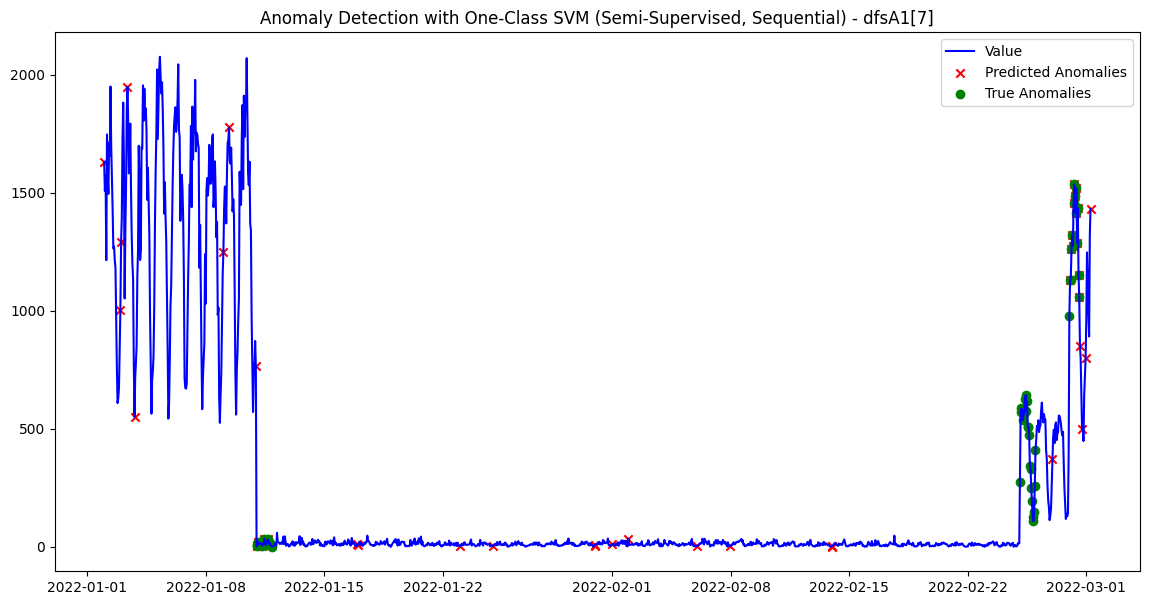

Processing dataset dfsA1[20]...
Best F1 Score for dfsA1[20]: 0.0816
Best Precision: 0.1250
Best Recall: 0.0606
Best Parameters: {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.01}


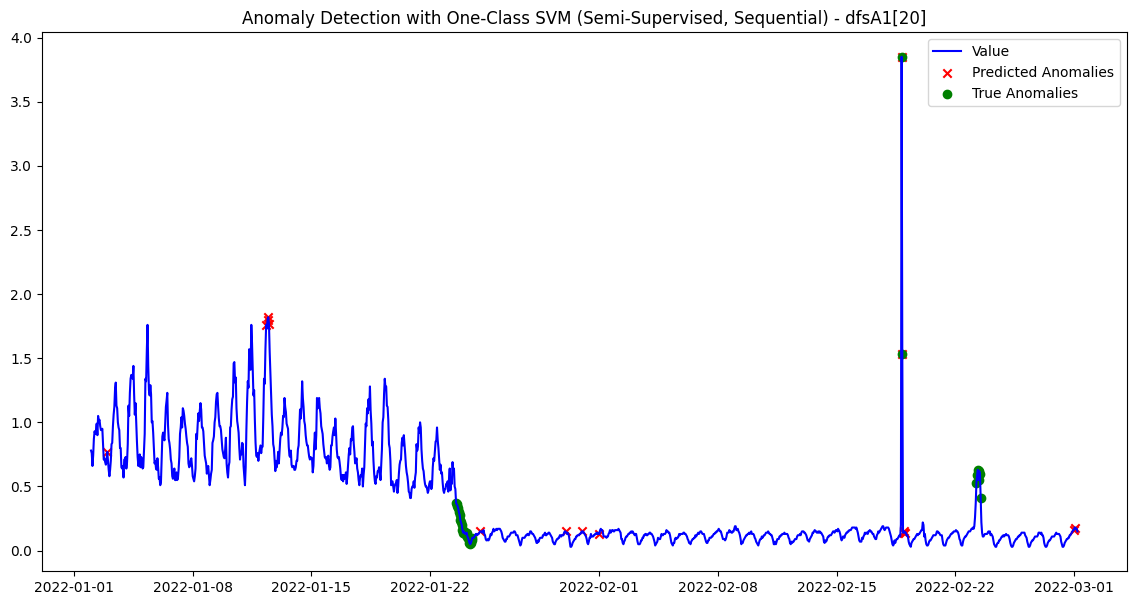

Processing dataset dfsA1[31]...
Best F1 Score for dfsA1[31]: 0.7458
Best Precision: 0.6286
Best Recall: 0.9167
Best Parameters: {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.01}


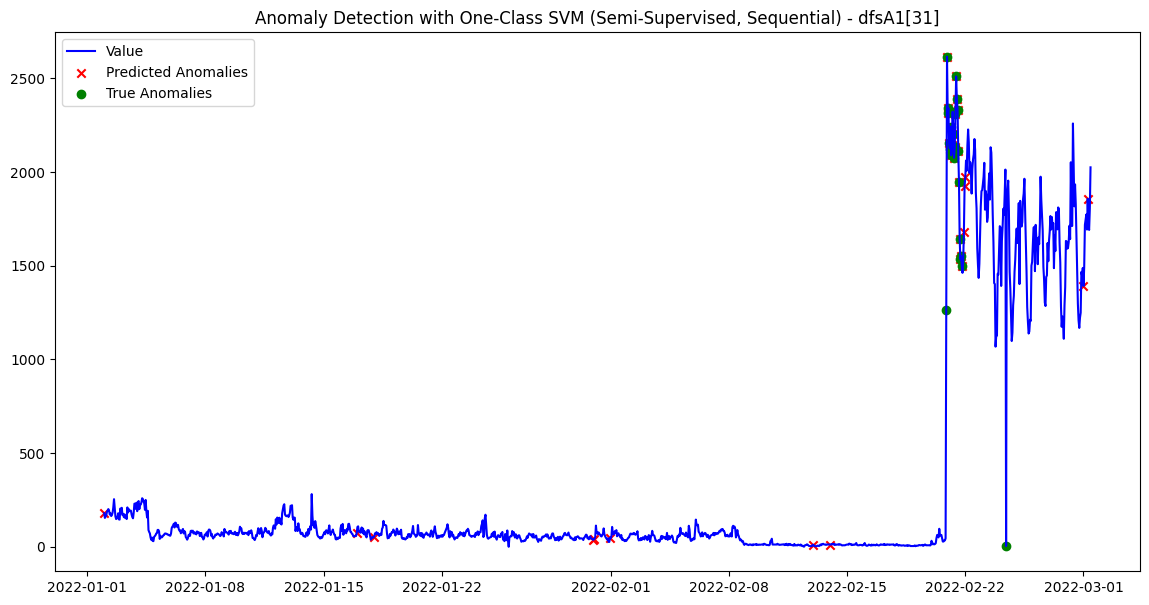

Processing dataset dfsA1[32]...
Best F1 Score for dfsA1[32]: 0.8039
Best Precision: 0.7455
Best Recall: 0.8723
Best Parameters: {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.01}


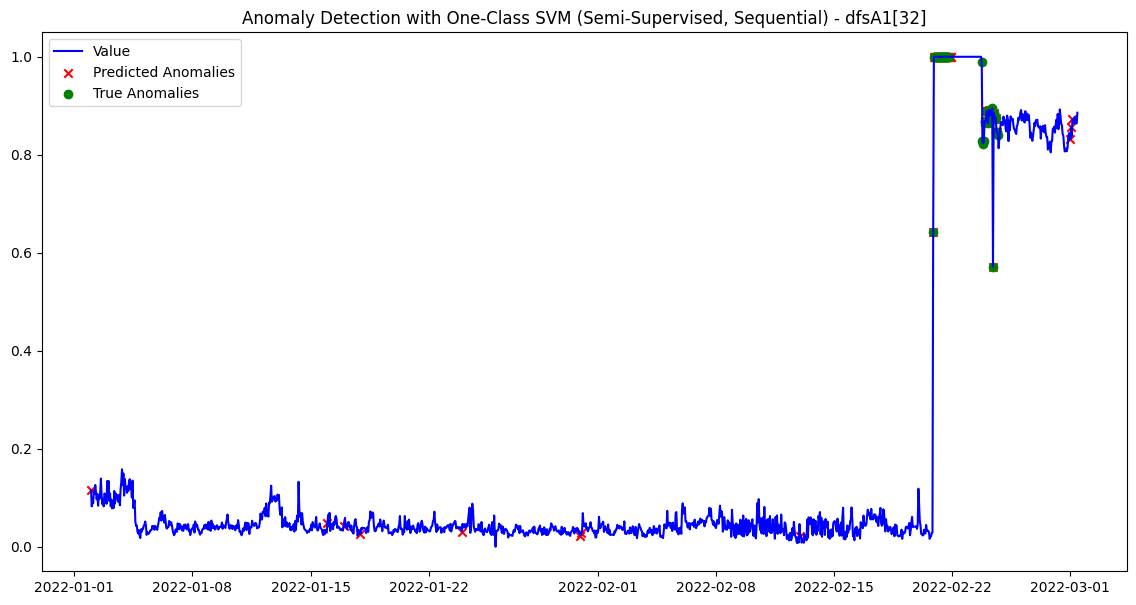

Processing dataset dfsA1[48]...
Best F1 Score for dfsA1[48]: 0.6970
Best Precision: 0.5476
Best Recall: 0.9583
Best Parameters: {'gamma': 'scale', 'kernel': 'rbf', 'nu': 0.01}


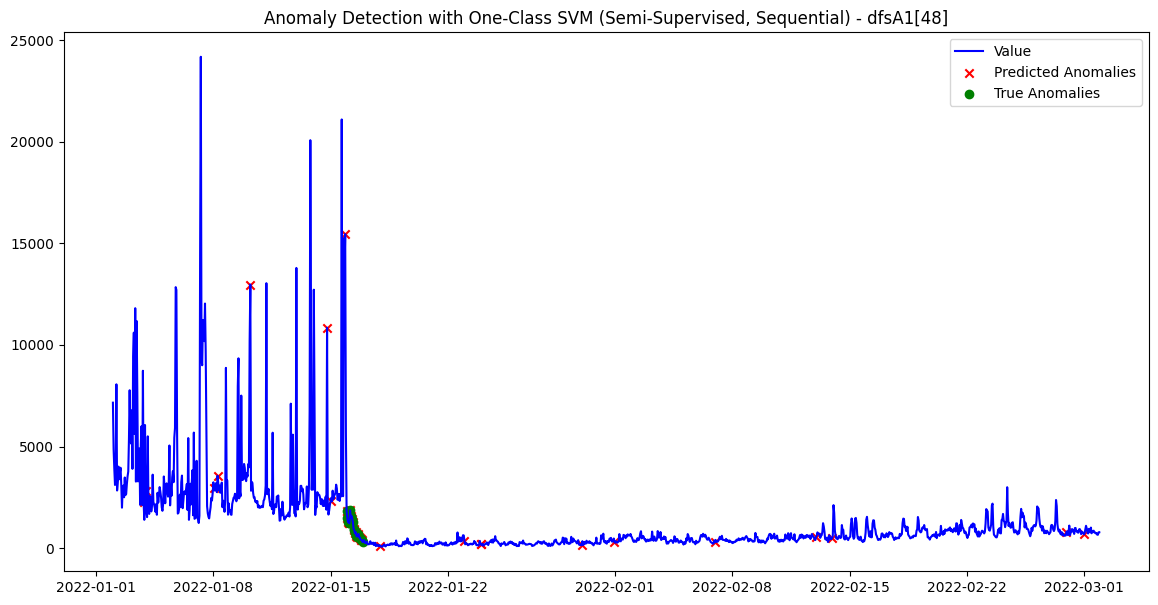

Processing dataset dfsA1[57]...
Best F1 Score for dfsA1[57]: 0.0870
Best Precision: 0.0500
Best Recall: 0.3333
Best Parameters: {'gamma': 'scale', 'kernel': 'rbf', 'nu': 0.01}


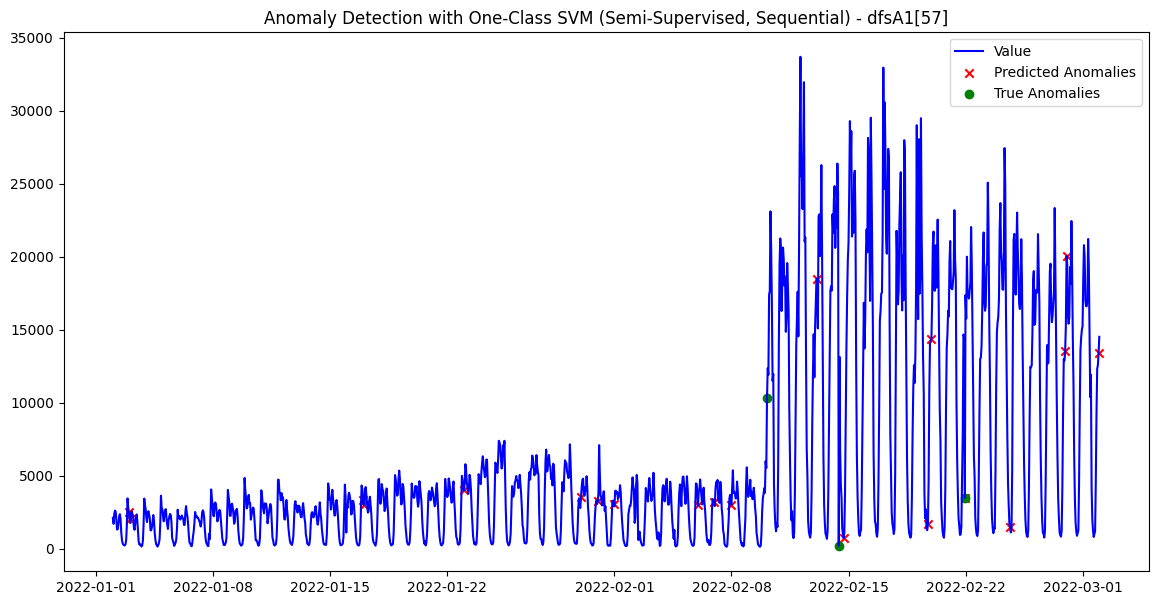

Processing dataset dfsA1[61]...
Best F1 Score for dfsA1[61]: 0.0800
Best Precision: 0.0769
Best Recall: 0.0833
Best Parameters: {'gamma': 'scale', 'kernel': 'rbf', 'nu': 0.01}


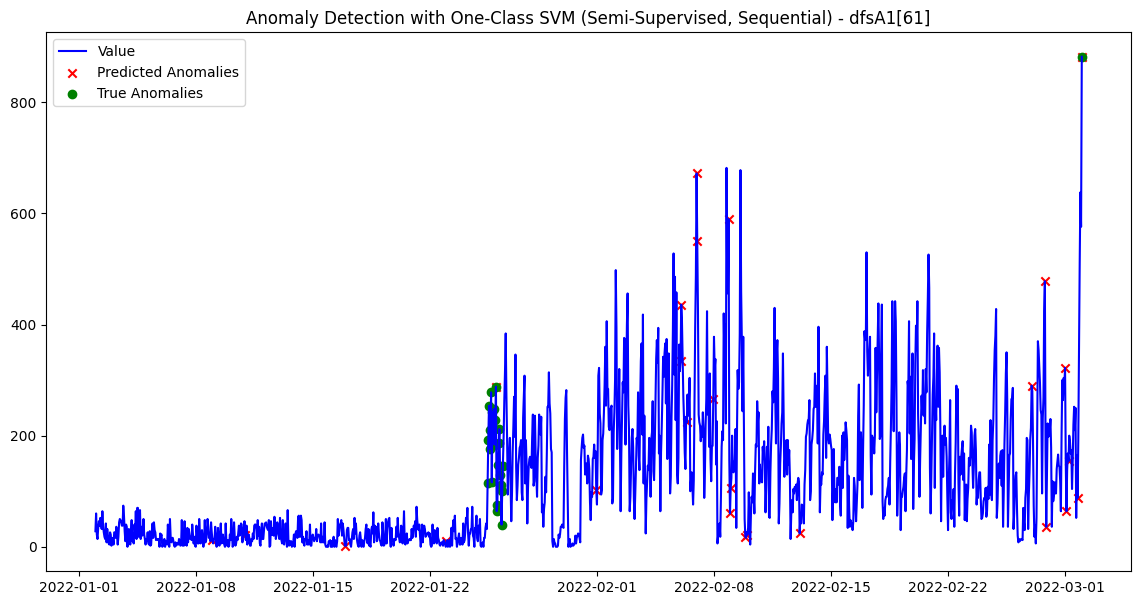

Average F1 Score across all datasets: 0.4304
Average Precision across all datasets: 0.3884
Average Recall across all datasets: 0.5309
All F1 Scores for each dataset: 0.5172, 0.0816, 0.7458, 0.8039, 0.6970, 0.0870, 0.0800


In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Define A1A and ParameterGrid for hyperparameter tuning
A1B = [7,20,31,32,48,57,61]
param_grid = {
    'nu': [0.01, 0.05, 0.1, 0.5, 0.7],
    'kernel': ['rbf'],
    'gamma': ['scale', 'auto']
}
grid = ParameterGrid(param_grid)

# To calculate the average F1 score, precision, and recall
f1_scores = []
precision_scores = []
recall_scores = []

# Iterate through datasets
for i in A1B:
    print(f"Processing dataset dfsA1[{i}]...")

    # Feature engineering for sequential data
    data_features = feature_engineering(dfsA1[i], value_col=f"value_{i}", window_size=24)

    # Separate features and labels
    X = data_features.drop(columns=['label'])  # Drop the label column
    y = data_features['label']  # Ground truth labels

    # Separate normal data for training
    X_normal = X[y == 0]  # Use only normal data for training
    y_test = y  # Full ground truth for evaluation

    # Normalize features
    scaler = MinMaxScaler()
    X_normal_normalized = scaler.fit_transform(X_normal)  # Normalize only normal training data
    X_normalized = scaler.transform(X)  # Normalize the entire dataset for evaluation

    # Hyperparameter tuning using grid search
    best_f1 = -1
    best_precision = -1
    best_recall = -1
    best_params = None
    best_predictions = None

    for params in grid:
        # Train One-Class SVM using only normal instances
        ocsvm = OneClassSVM(
            nu=params['nu'],
            kernel=params['kernel'],
            gamma=params['gamma']
        )
        ocsvm.fit(X_normal_normalized)  # Train on normal data only

        # Predict sequentially
        predictions = ocsvm.predict(X_normalized)

        # Map predictions to binary (1 = anomaly, 0 = normal)
        predictions = [1 if pred == -1 else 0 for pred in predictions]

        # Calculate metrics
        f1 = f1_score(y_test, predictions)
        precision = precision_score(y_test, predictions)
        recall = recall_score(y_test, predictions)

        # Update best parameters if current F1 is better
        if f1 > best_f1:
            best_f1 = f1
            best_precision = precision
            best_recall = recall
            best_params = params
            best_predictions = predictions

    # Append best metrics for the dataset
    f1_scores.append(best_f1)
    precision_scores.append(best_precision)
    recall_scores.append(best_recall)

    # Output best parameters and metrics for current dataset
    print(f"Best F1 Score for dfsA1[{i}]: {best_f1:.4f}")
    print(f"Best Precision: {best_precision:.4f}")
    print(f"Best Recall: {best_recall:.4f}")
    print(f"Best Parameters: {best_params}")

    # Add predictions to the original DataFrame for inspection
    data_features['predictions'] = best_predictions

    # Visualize anomalies
    plt.figure(figsize=(14, 7))
    plt.plot(data_features.index, data_features[f"value_{i}"], label='Value', color='blue')
    plt.scatter(data_features[data_features['predictions'] == 1].index,
                data_features[data_features['predictions'] == 1][f"value_{i}"],
                color='red', label='Predicted Anomalies', marker='x')
    plt.scatter(data_features[data_features['label'] == 1].index,
                data_features[data_features['label'] == 1][f"value_{i}"],
                color='green', label='True Anomalies', marker='o')

    plt.title(f'Anomaly Detection with One-Class SVM (Semi-Supervised, Sequential) - dfsA1[{i}]')
    plt.legend()
    plt.show()

# Calculate and output the average metrics
avg_f1_score = sum(f1_scores) / len(f1_scores)
avg_precision = sum(precision_scores) / len(precision_scores)
avg_recall = sum(recall_scores) / len(recall_scores)
print(f"Average F1 Score across all datasets: {avg_f1_score:.4f}")
print(f"Average Precision across all datasets: {avg_precision:.4f}")
print(f"Average Recall across all datasets: {avg_recall:.4f}")
# Print each F1 score formatted individually
formatted_f1_scores = [f"{score:.4f}" for score in f1_scores]
print(f"All F1 Scores for each dataset: {', '.join(formatted_f1_scores)}")


## NOT TEMP

Processing dataset dfsA1[7]...
Best F1 Score for dfsA1[7]: 0.1096
Best Precision: 0.0592
Best Recall: 0.7377
Best Parameters: {'gamma': 'scale', 'kernel': 'rbf', 'nu': 0.5}


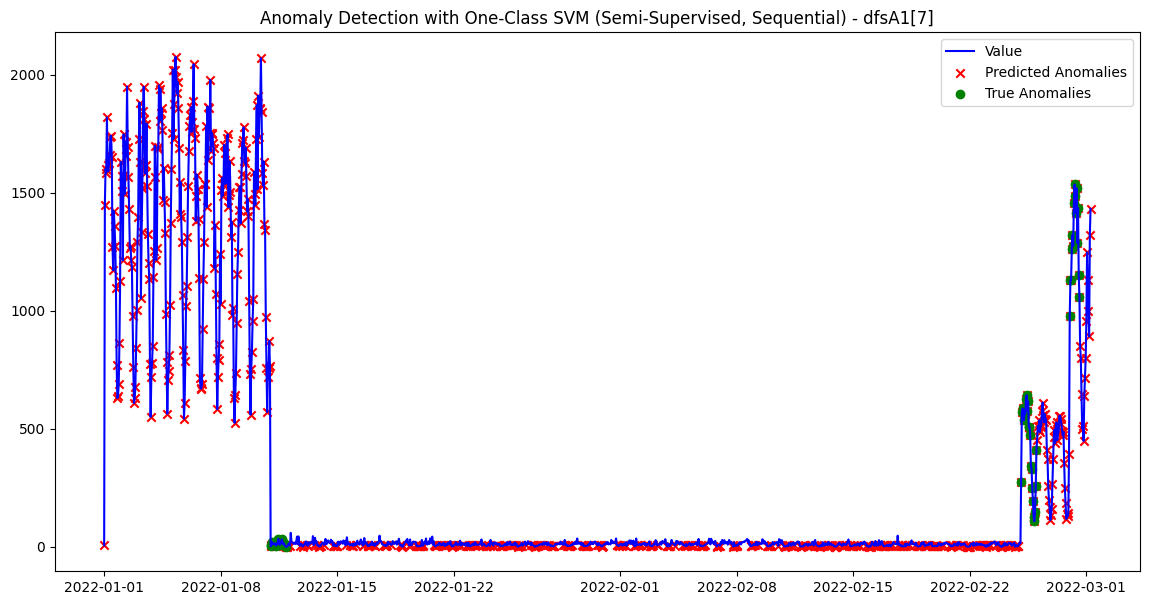

Processing dataset dfsA1[20]...
Best F1 Score for dfsA1[20]: 0.0606
Best Precision: 0.0404
Best Recall: 0.1212
Best Parameters: {'gamma': 'scale', 'kernel': 'rbf', 'nu': 0.05}


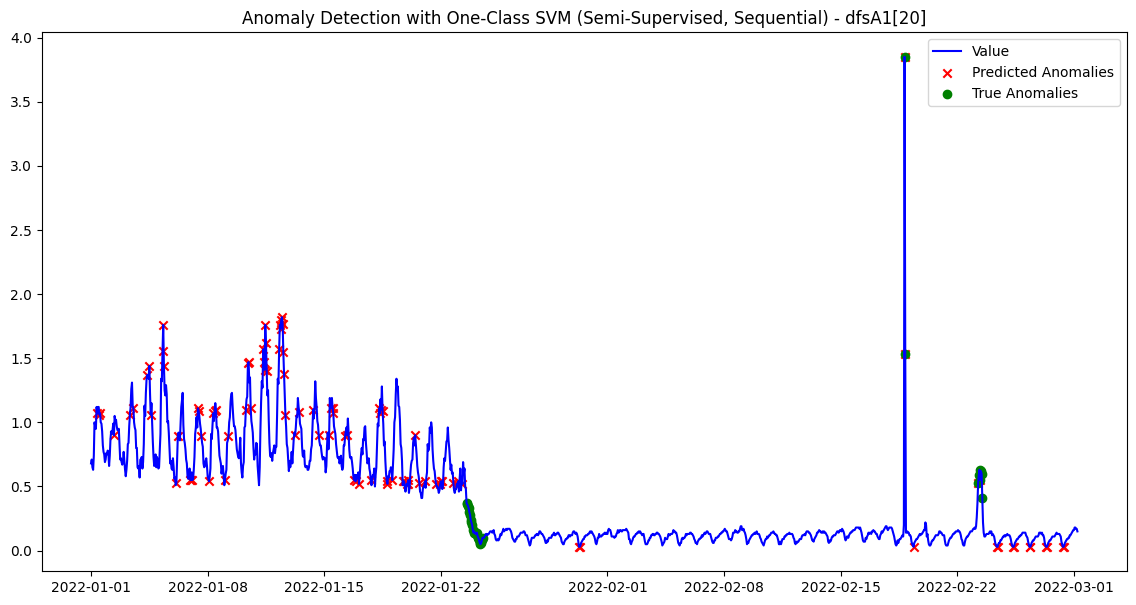

Processing dataset dfsA1[31]...
Best F1 Score for dfsA1[31]: 0.5714
Best Precision: 0.5600
Best Recall: 0.5833
Best Parameters: {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.01}


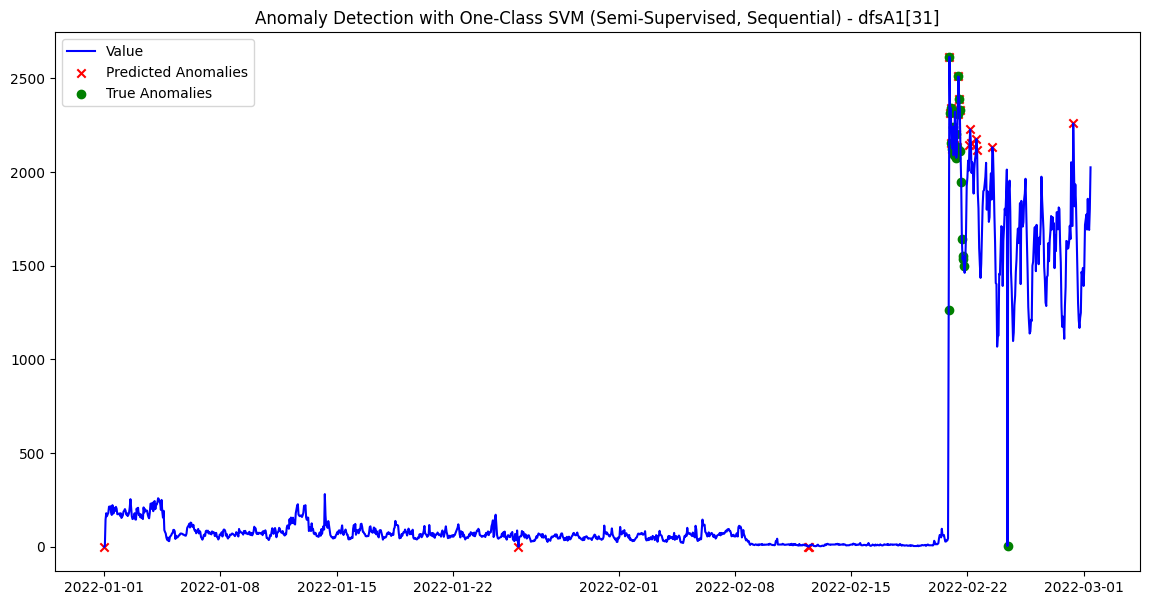

Processing dataset dfsA1[32]...
Best F1 Score for dfsA1[32]: 0.3607
Best Precision: 0.2933
Best Recall: 0.4681
Best Parameters: {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.01}


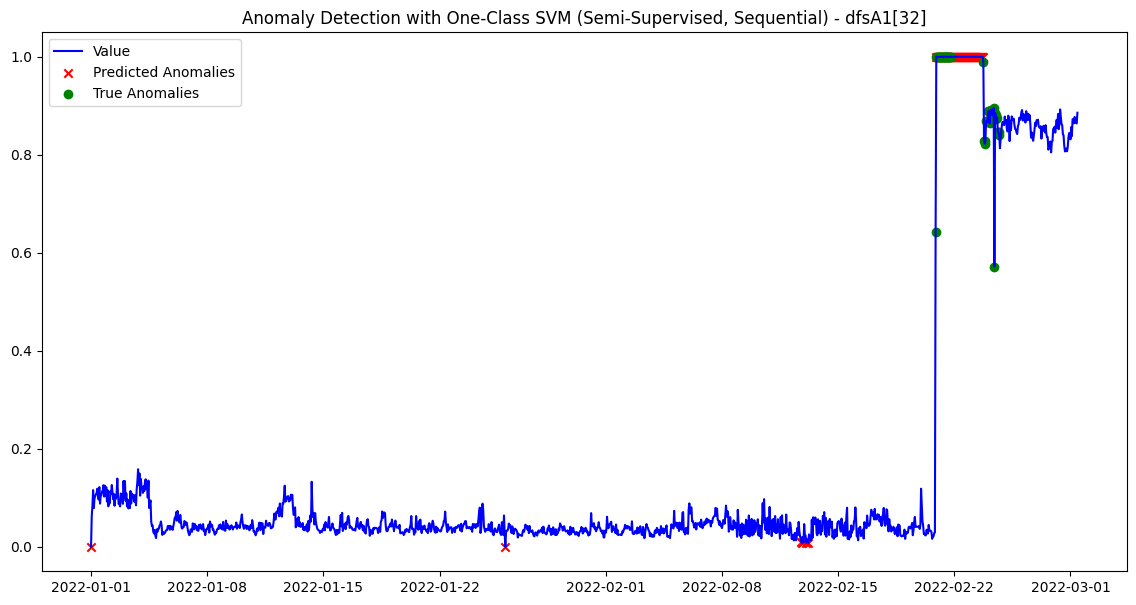

Processing dataset dfsA1[48]...
Best F1 Score for dfsA1[48]: 0.0273
Best Precision: 0.0140
Best Recall: 0.5833
Best Parameters: {'gamma': 'scale', 'kernel': 'rbf', 'nu': 0.7}


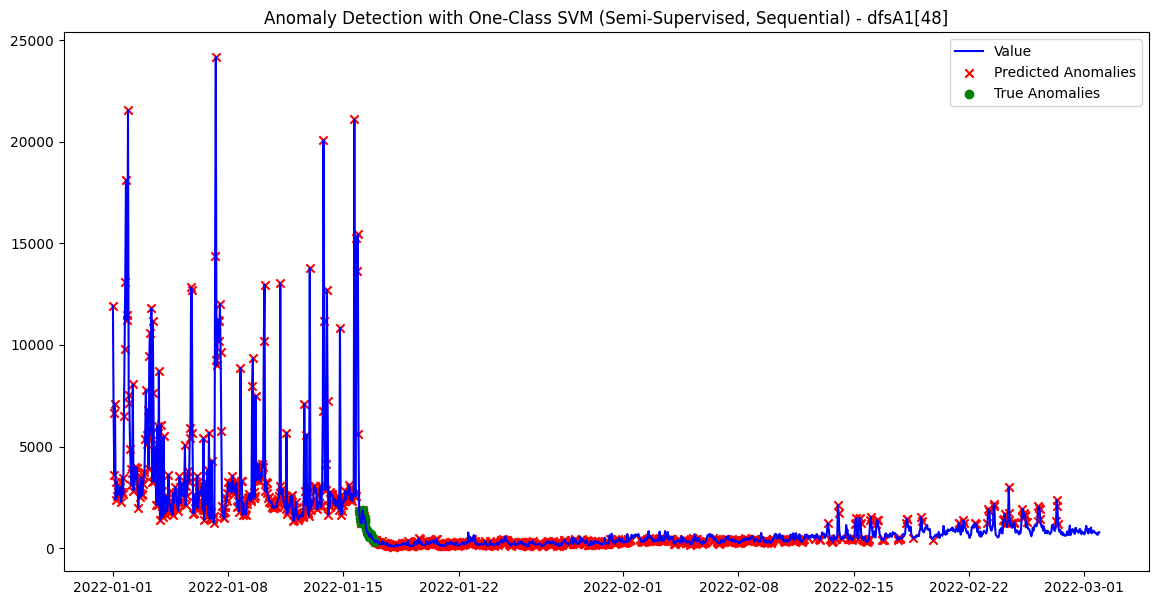

Processing dataset dfsA1[57]...
Best F1 Score for dfsA1[57]: 0.0263
Best Precision: 0.0134
Best Recall: 0.6667
Best Parameters: {'gamma': 'scale', 'kernel': 'rbf', 'nu': 0.1}


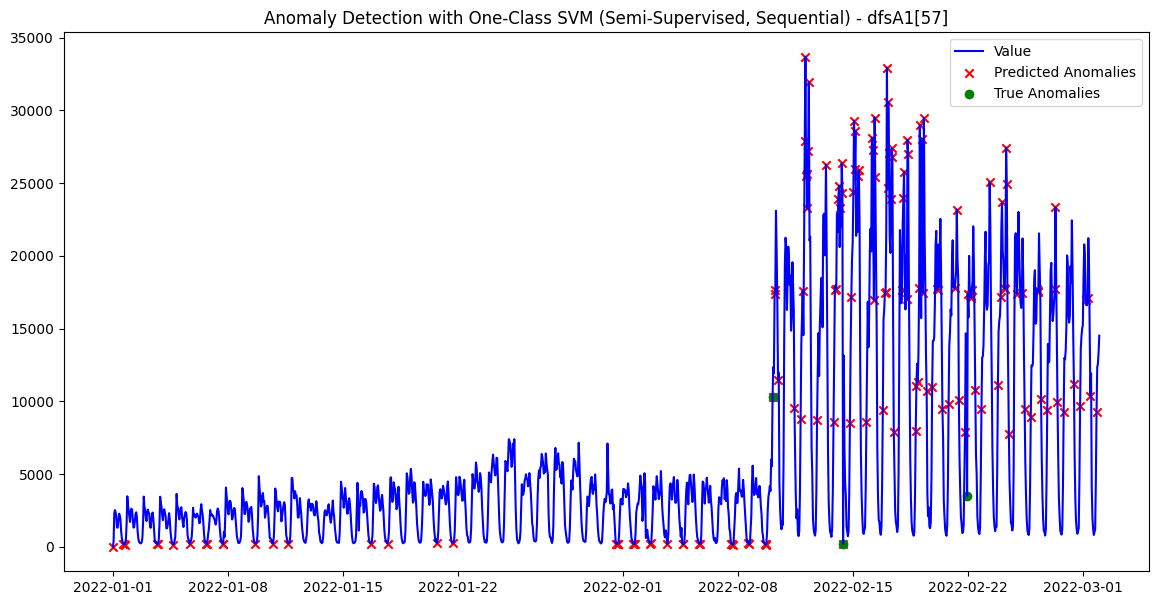

Processing dataset dfsA1[61]...
Best F1 Score for dfsA1[61]: 0.0645
Best Precision: 0.1429
Best Recall: 0.0417
Best Parameters: {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.01}


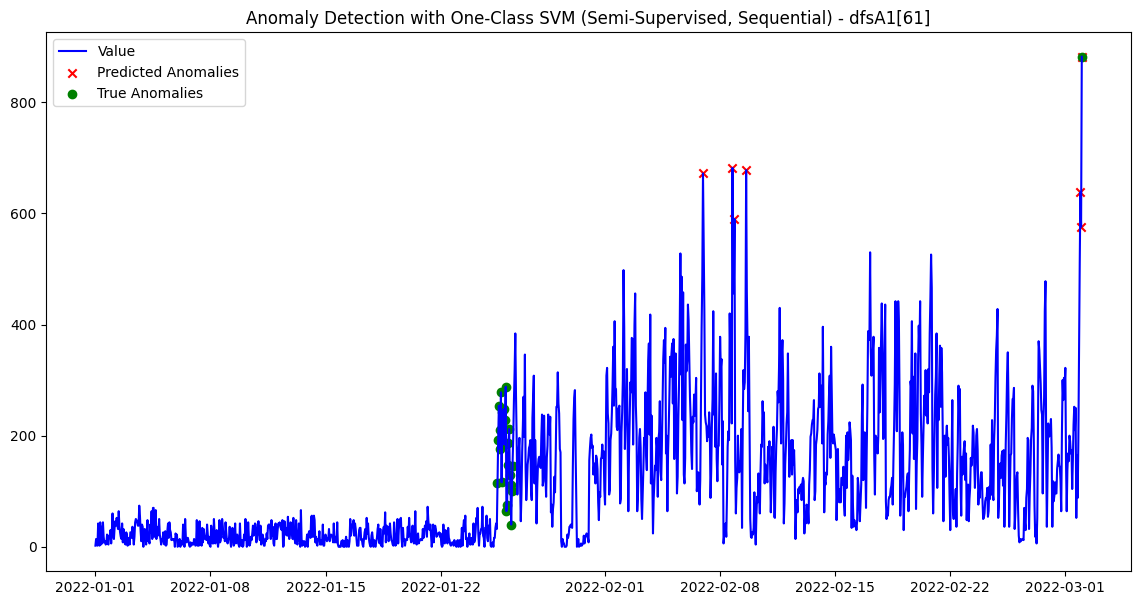

Average F1 Score across all datasets: 0.1743
Average Precision across all datasets: 0.1605
Average Recall across all datasets: 0.4574
All F1 Scores for each dataset: 0.1096, 0.0606, 0.5714, 0.3607, 0.0273, 0.0263, 0.0645


In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Define A1A and ParameterGrid for hyperparameter tuning
A1B = [7,20,31,32,48,57,61]
param_grid = {
    'nu': [0.01, 0.05, 0.1, 0.5, 0.7],
    'kernel': ['rbf'],
    'gamma': ['scale', 'auto']
}
grid = ParameterGrid(param_grid)

# To calculate the average F1 score, precision, and recall
f1_scores = []
precision_scores = []
recall_scores = []

# Iterate through datasets
for i in A1B:
    print(f"Processing dataset dfsA1[{i}]...")

    # Feature engineering for sequential data
    data_features = dfsA1[i]

    # Separate features and labels
    X = data_features.drop(columns=['label'])  # Drop the label column
    y = data_features['label']  # Ground truth labels

    # Separate normal data for training
    X_normal = X[y == 0]  # Use only normal data for training
    y_test = y  # Full ground truth for evaluation

    # Normalize features
    scaler = MinMaxScaler()
    X_normal_normalized = scaler.fit_transform(X_normal)  # Normalize only normal training data
    X_normalized = scaler.transform(X)  # Normalize the entire dataset for evaluation

    # Hyperparameter tuning using grid search
    best_f1 = -1
    best_precision = -1
    best_recall = -1
    best_params = None
    best_predictions = None

    for params in grid:
        # Train One-Class SVM using only normal instances
        ocsvm = OneClassSVM(
            nu=params['nu'],
            kernel=params['kernel'],
            gamma=params['gamma']
        )
        ocsvm.fit(X_normal_normalized)  # Train on normal data only

        # Predict sequentially
        predictions = ocsvm.predict(X_normalized)

        # Map predictions to binary (1 = anomaly, 0 = normal)
        predictions = [1 if pred == -1 else 0 for pred in predictions]

        # Calculate metrics
        f1 = f1_score(y_test, predictions)
        precision = precision_score(y_test, predictions)
        recall = recall_score(y_test, predictions)

        # Update best parameters if current F1 is better
        if f1 > best_f1:
            best_f1 = f1
            best_precision = precision
            best_recall = recall
            best_params = params
            best_predictions = predictions

    # Append best metrics for the dataset
    f1_scores.append(best_f1)
    precision_scores.append(best_precision)
    recall_scores.append(best_recall)

    # Output best parameters and metrics for current dataset
    print(f"Best F1 Score for dfsA1[{i}]: {best_f1:.4f}")
    print(f"Best Precision: {best_precision:.4f}")
    print(f"Best Recall: {best_recall:.4f}")
    print(f"Best Parameters: {best_params}")

    # Add predictions to the original DataFrame for inspection
    data_features['predictions'] = best_predictions

    # Visualize anomalies
    plt.figure(figsize=(14, 7))
    plt.plot(data_features.index, data_features[f"value_{i}"], label='Value', color='blue')
    plt.scatter(data_features[data_features['predictions'] == 1].index,
                data_features[data_features['predictions'] == 1][f"value_{i}"],
                color='red', label='Predicted Anomalies', marker='x')
    plt.scatter(data_features[data_features['label'] == 1].index,
                data_features[data_features['label'] == 1][f"value_{i}"],
                color='green', label='True Anomalies', marker='o')

    plt.title(f'Anomaly Detection with One-Class SVM (Semi-Supervised, Sequential) - dfsA1[{i}]')
    plt.legend()
    plt.show()

# Calculate and output the average metrics
avg_f1_score = sum(f1_scores) / len(f1_scores)
avg_precision = sum(precision_scores) / len(precision_scores)
avg_recall = sum(recall_scores) / len(recall_scores)
print(f"Average F1 Score across all datasets: {avg_f1_score:.4f}")
print(f"Average Precision across all datasets: {avg_precision:.4f}")
print(f"Average Recall across all datasets: {avg_recall:.4f}")
# Print each F1 score formatted individually
formatted_f1_scores = [f"{score:.4f}" for score in f1_scores]
print(f"All F1 Scores for each dataset: {', '.join(formatted_f1_scores)}")


## A1C

## TEMP

Processing dataset dfsA1[17]...
Best F1 Score for dfsA1[17]: 0.9652
Best Precision: 0.9528
Best Recall: 0.9780
Best Parameters: {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.01}


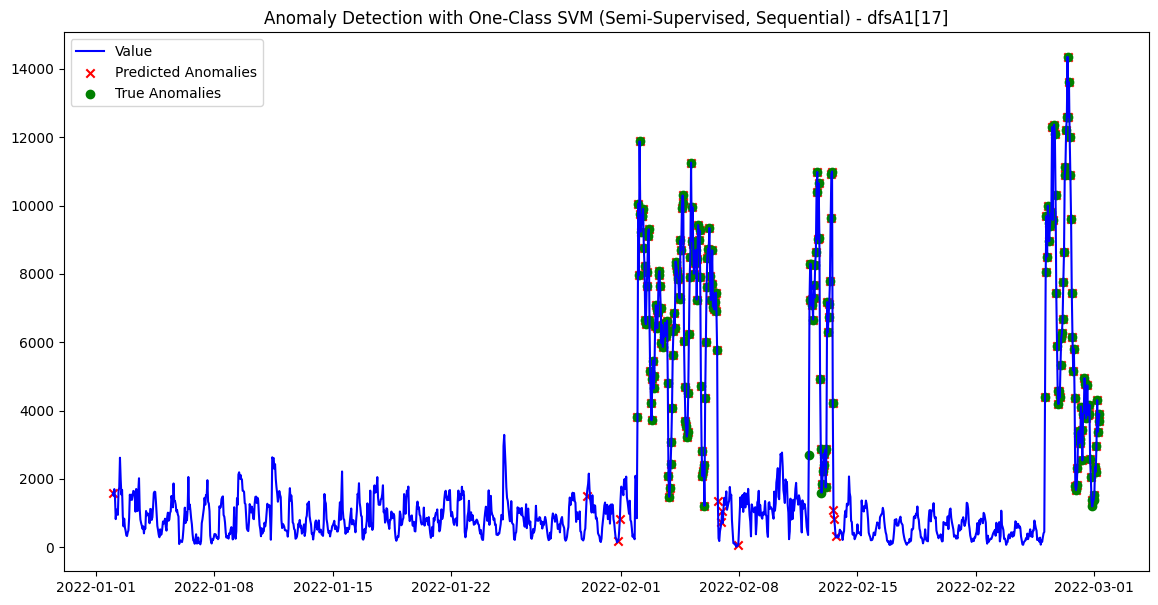

Processing dataset dfsA1[19]...
Best F1 Score for dfsA1[19]: 0.9447
Best Precision: 0.9136
Best Recall: 0.9780
Best Parameters: {'gamma': 'scale', 'kernel': 'rbf', 'nu': 0.01}


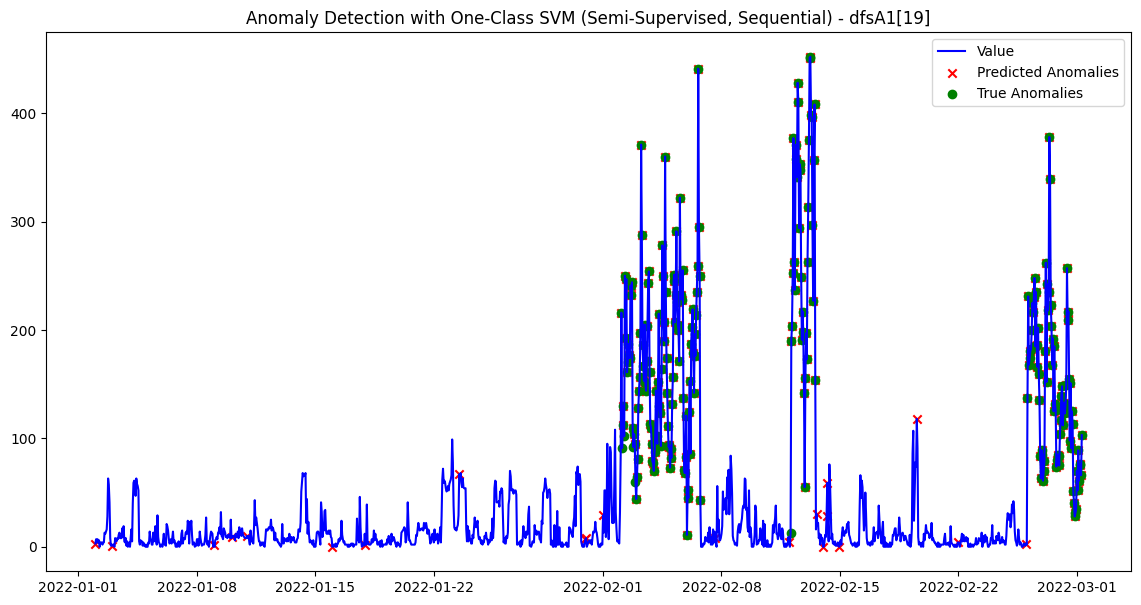

Processing dataset dfsA1[26]...
Best F1 Score for dfsA1[26]: 0.8333
Best Precision: 0.8025
Best Recall: 0.8667
Best Parameters: {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.01}


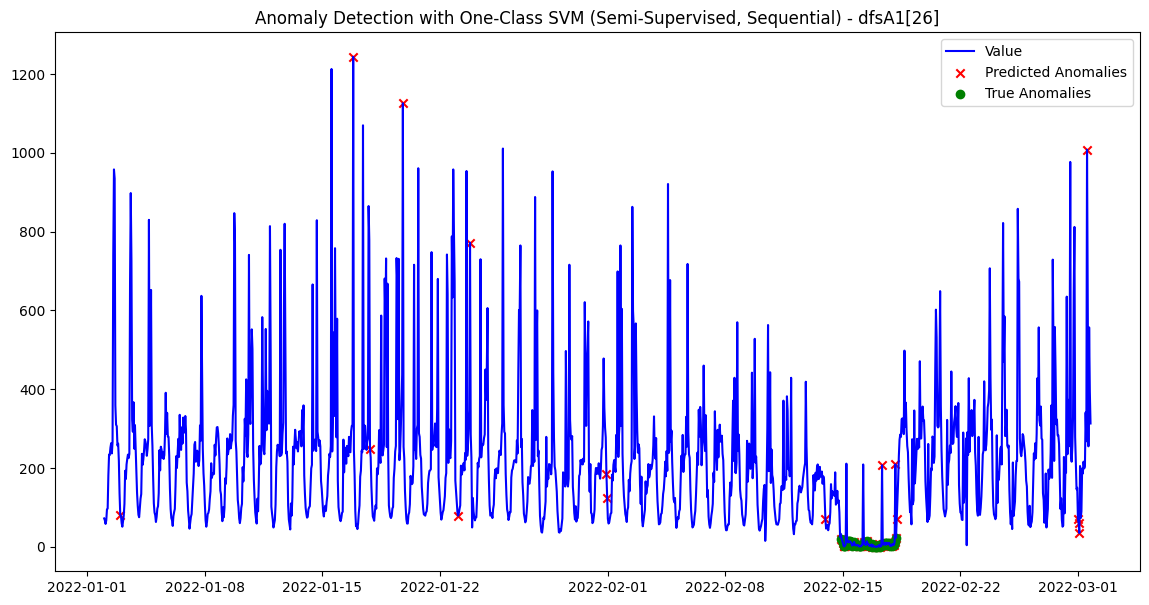

Processing dataset dfsA1[37]...
Best F1 Score for dfsA1[37]: 0.6875
Best Precision: 0.5323
Best Recall: 0.9706
Best Parameters: {'gamma': 'scale', 'kernel': 'rbf', 'nu': 0.01}


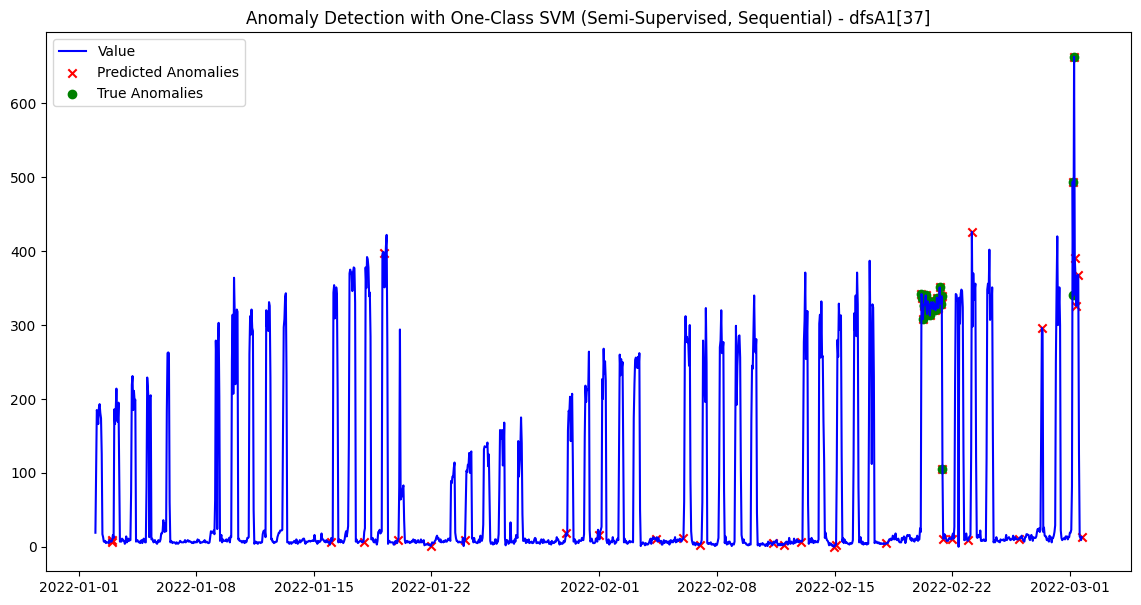

Processing dataset dfsA1[40]...
Best F1 Score for dfsA1[40]: 0.7632
Best Precision: 0.8056
Best Recall: 0.7250
Best Parameters: {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.01}


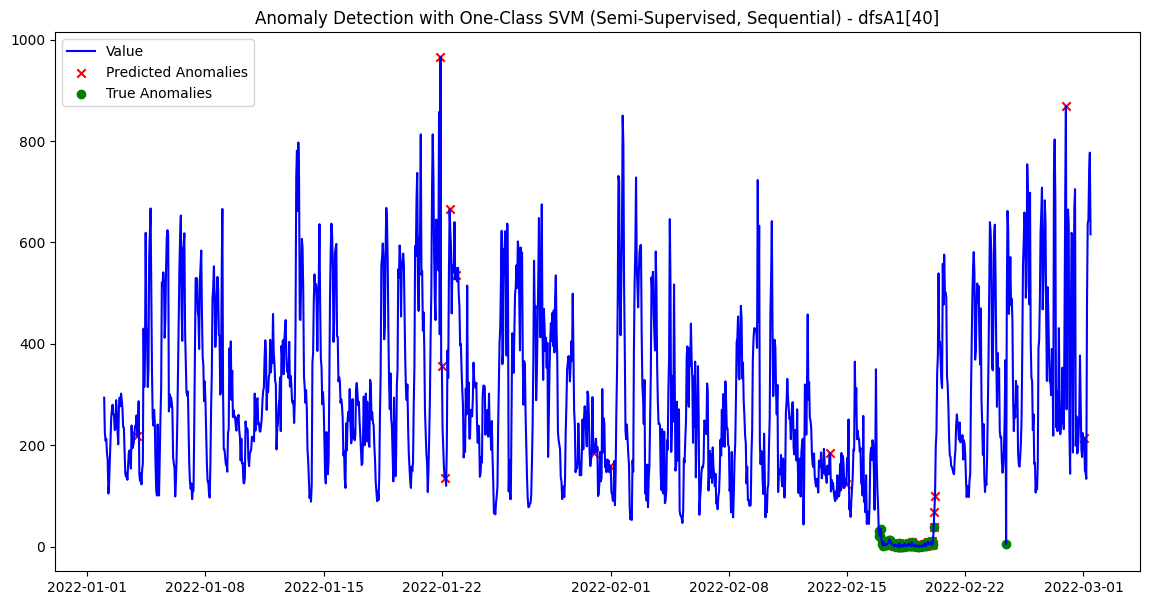

Processing dataset dfsA1[47]...
Best F1 Score for dfsA1[47]: 0.1000
Best Precision: 0.0667
Best Recall: 0.2000
Best Parameters: {'gamma': 'scale', 'kernel': 'rbf', 'nu': 0.01}


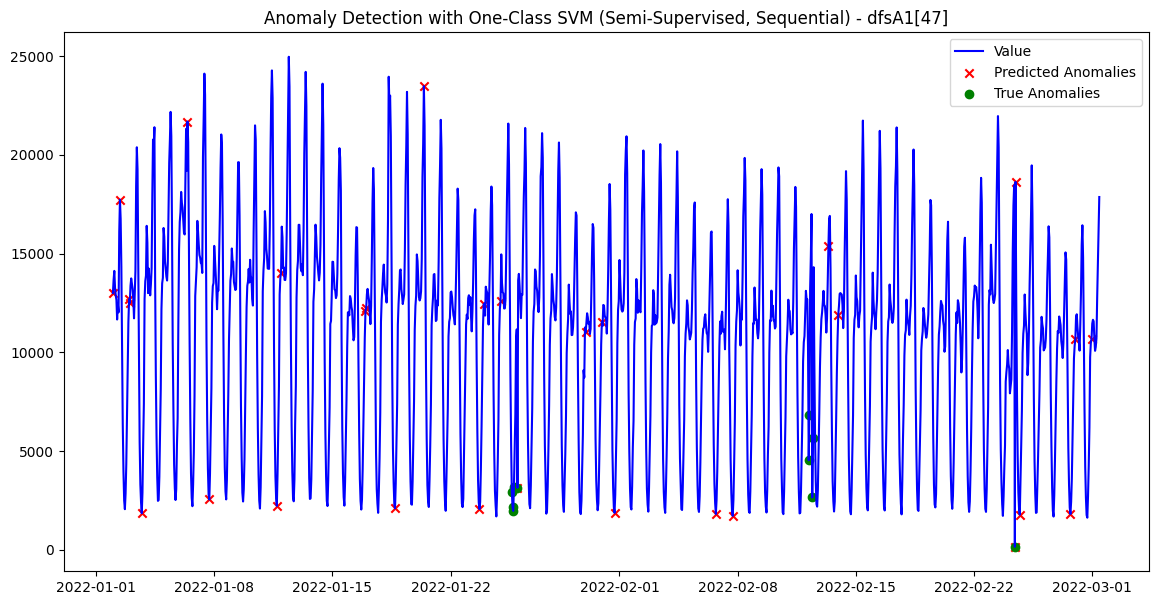

Average F1 Score across all datasets: 0.7156
Average Precision across all datasets: 0.6789
Average Recall across all datasets: 0.7864
All F1 Scores for each dataset: 0.9652, 0.9447, 0.8333, 0.6875, 0.7632, 0.1000


In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Define A1A and ParameterGrid for hyperparameter tuning
A1C = [17, 19, 26, 37, 40, 47]
param_grid = {
    'nu': [0.01, 0.05, 0.1, 0.5, 0.7],
    'kernel': ['rbf'],
    'gamma': ['scale', 'auto']
}
grid = ParameterGrid(param_grid)

# To calculate the average F1 score, precision, and recall
f1_scores = []
precision_scores = []
recall_scores = []

# Iterate through datasets
for i in A1C:
    print(f"Processing dataset dfsA1[{i}]...")

    # Feature engineering for sequential data
    data_features = feature_engineering(dfsA1[i], value_col=f"value_{i}", window_size=24)

    # Separate features and labels
    X = data_features.drop(columns=['label'])  # Drop the label column
    y = data_features['label']  # Ground truth labels

    # Separate normal data for training
    X_normal = X[y == 0]  # Use only normal data for training
    y_test = y  # Full ground truth for evaluation

    # Normalize features
    scaler = MinMaxScaler()
    X_normal_normalized = scaler.fit_transform(X_normal)  # Normalize only normal training data
    X_normalized = scaler.transform(X)  # Normalize the entire dataset for evaluation

    # Hyperparameter tuning using grid search
    best_f1 = -1
    best_precision = -1
    best_recall = -1
    best_params = None
    best_predictions = None

    for params in grid:
        # Train One-Class SVM using only normal instances
        ocsvm = OneClassSVM(
            nu=params['nu'],
            kernel=params['kernel'],
            gamma=params['gamma']
        )
        ocsvm.fit(X_normal_normalized)  # Train on normal data only

        # Predict sequentially
        predictions = ocsvm.predict(X_normalized)

        # Map predictions to binary (1 = anomaly, 0 = normal)
        predictions = [1 if pred == -1 else 0 for pred in predictions]

        # Calculate metrics
        f1 = f1_score(y_test, predictions)
        precision = precision_score(y_test, predictions)
        recall = recall_score(y_test, predictions)

        # Update best parameters if current F1 is better
        if f1 > best_f1:
            best_f1 = f1
            best_precision = precision
            best_recall = recall
            best_params = params
            best_predictions = predictions

    # Append best metrics for the dataset
    f1_scores.append(best_f1)
    precision_scores.append(best_precision)
    recall_scores.append(best_recall)

    # Output best parameters and metrics for current dataset
    print(f"Best F1 Score for dfsA1[{i}]: {best_f1:.4f}")
    print(f"Best Precision: {best_precision:.4f}")
    print(f"Best Recall: {best_recall:.4f}")
    print(f"Best Parameters: {best_params}")

    # Add predictions to the original DataFrame for inspection
    data_features['predictions'] = best_predictions

    # Visualize anomalies
    plt.figure(figsize=(14, 7))
    plt.plot(data_features.index, data_features[f"value_{i}"], label='Value', color='blue')
    plt.scatter(data_features[data_features['predictions'] == 1].index,
                data_features[data_features['predictions'] == 1][f"value_{i}"],
                color='red', label='Predicted Anomalies', marker='x')
    plt.scatter(data_features[data_features['label'] == 1].index,
                data_features[data_features['label'] == 1][f"value_{i}"],
                color='green', label='True Anomalies', marker='o')

    plt.title(f'Anomaly Detection with One-Class SVM (Semi-Supervised, Sequential) - dfsA1[{i}]')
    plt.legend()
    plt.show()

# Calculate and output the average metrics
avg_f1_score = sum(f1_scores) / len(f1_scores)
avg_precision = sum(precision_scores) / len(precision_scores)
avg_recall = sum(recall_scores) / len(recall_scores)
print(f"Average F1 Score across all datasets: {avg_f1_score:.4f}")
print(f"Average Precision across all datasets: {avg_precision:.4f}")
print(f"Average Recall across all datasets: {avg_recall:.4f}")
# Print each F1 score formatted individually
formatted_f1_scores = [f"{score:.4f}" for score in f1_scores]
print(f"All F1 Scores for each dataset: {', '.join(formatted_f1_scores)}")


## NOT TEMP

Processing dataset dfsA1[17]...
Best F1 Score for dfsA1[17]: 0.9050
Best Precision: 0.9302
Best Recall: 0.8811
Best Parameters: {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.01}


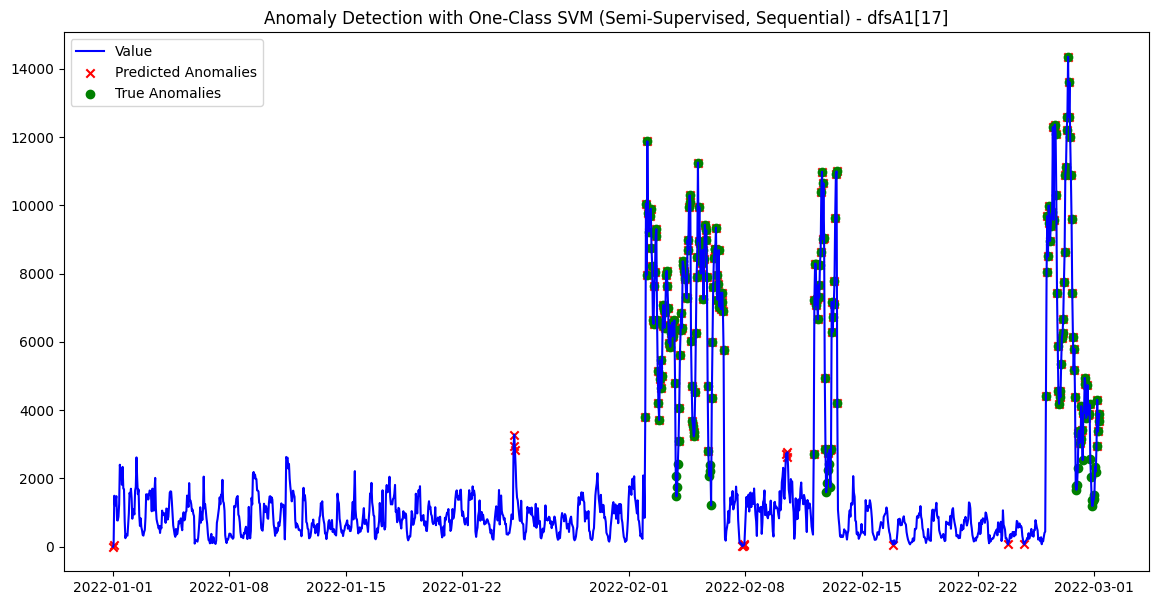

Processing dataset dfsA1[19]...
Best F1 Score for dfsA1[19]: 0.8927
Best Precision: 0.8703
Best Recall: 0.9163
Best Parameters: {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.05}


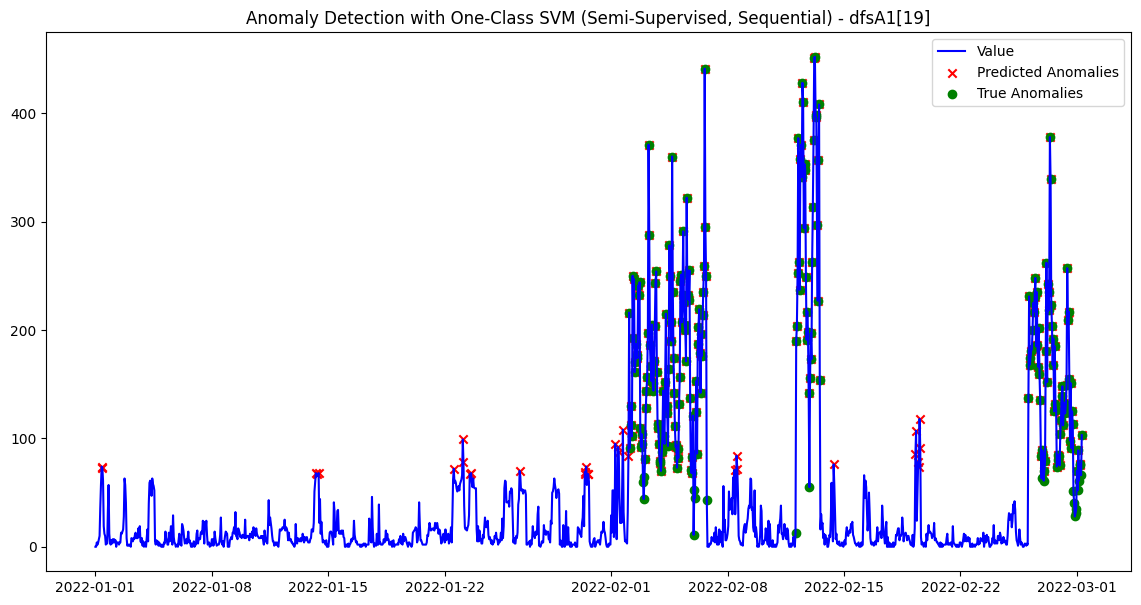

Processing dataset dfsA1[26]...
Best F1 Score for dfsA1[26]: 0.9146
Best Precision: 0.8427
Best Recall: 1.0000
Best Parameters: {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.01}


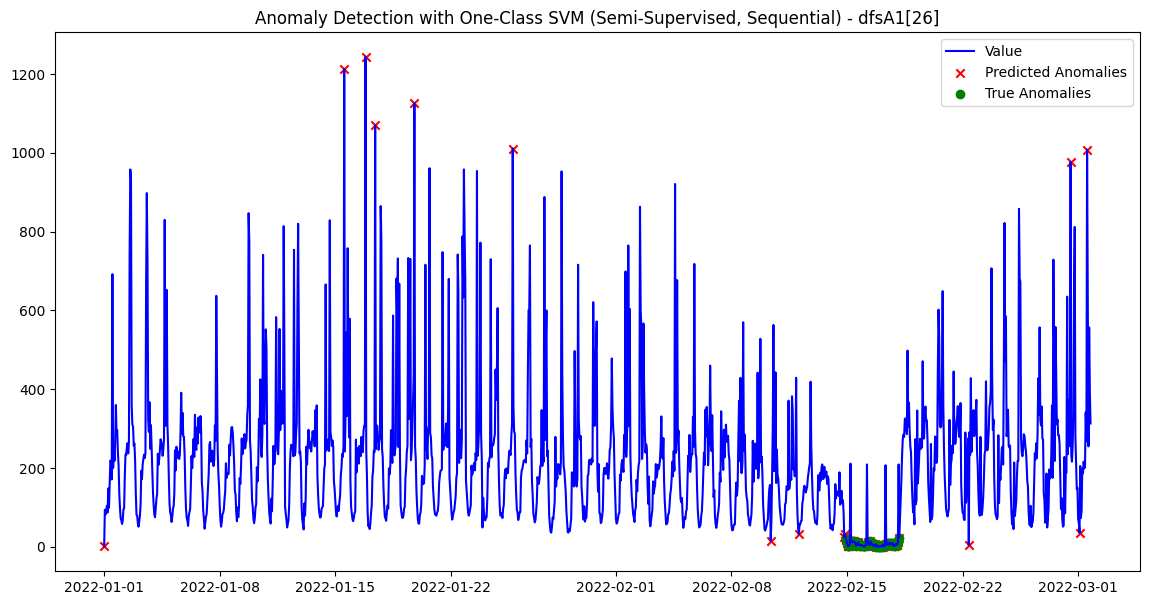

Processing dataset dfsA1[37]...
Best F1 Score for dfsA1[37]: 0.1726
Best Precision: 0.1043
Best Recall: 0.5000
Best Parameters: {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.1}


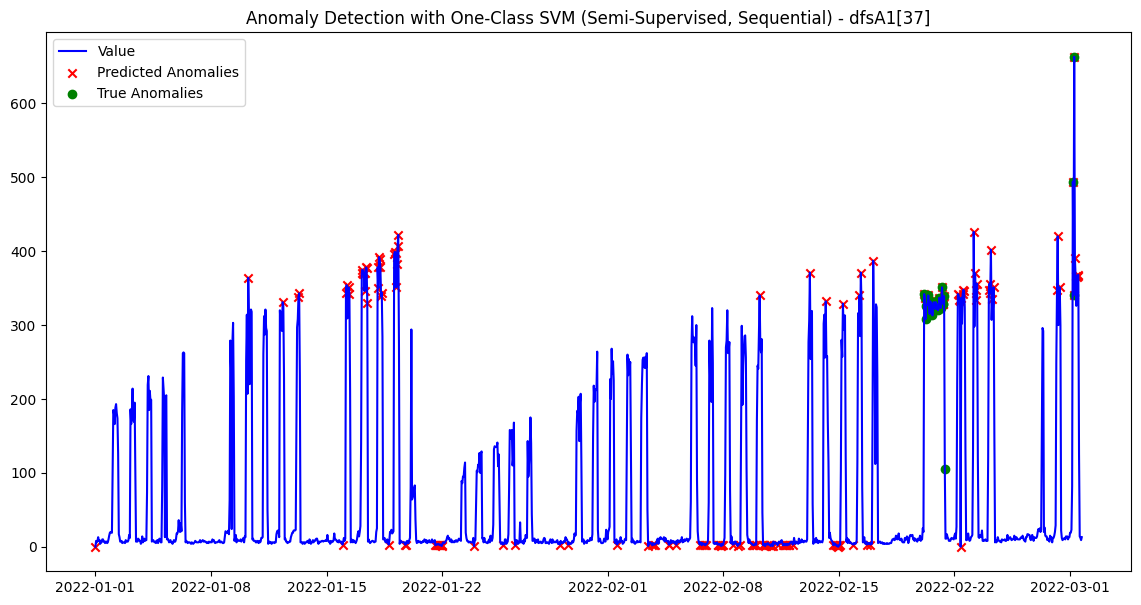

Processing dataset dfsA1[40]...
Best F1 Score for dfsA1[40]: 0.9249
Best Precision: 0.8602
Best Recall: 1.0000
Best Parameters: {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.01}


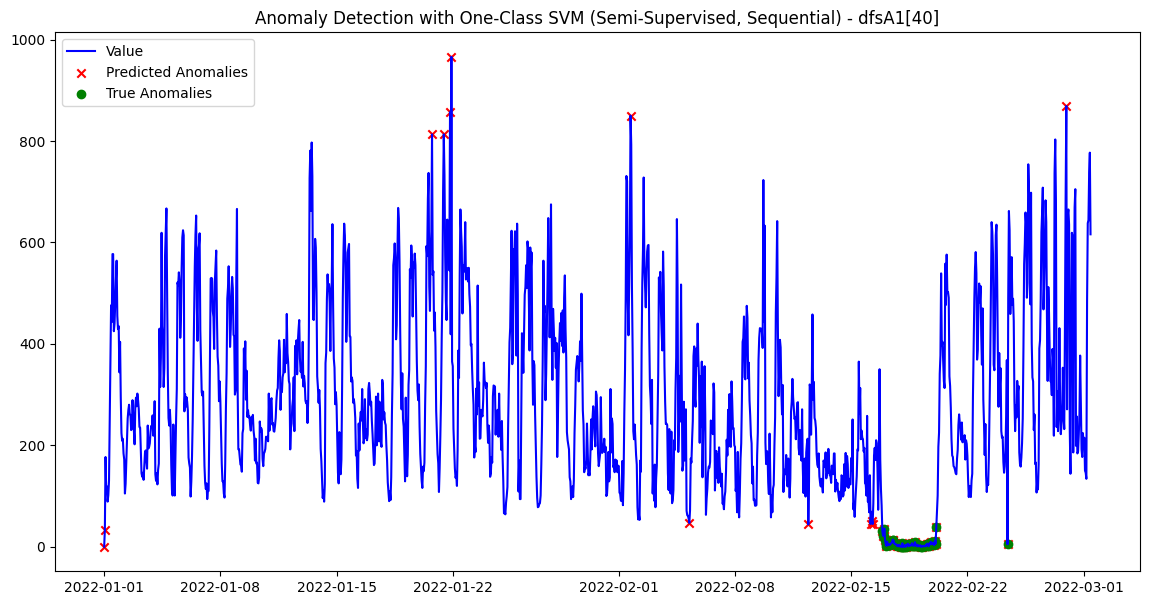

Processing dataset dfsA1[47]...
Best F1 Score for dfsA1[47]: 0.0741
Best Precision: 0.0588
Best Recall: 0.1000
Best Parameters: {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.01}


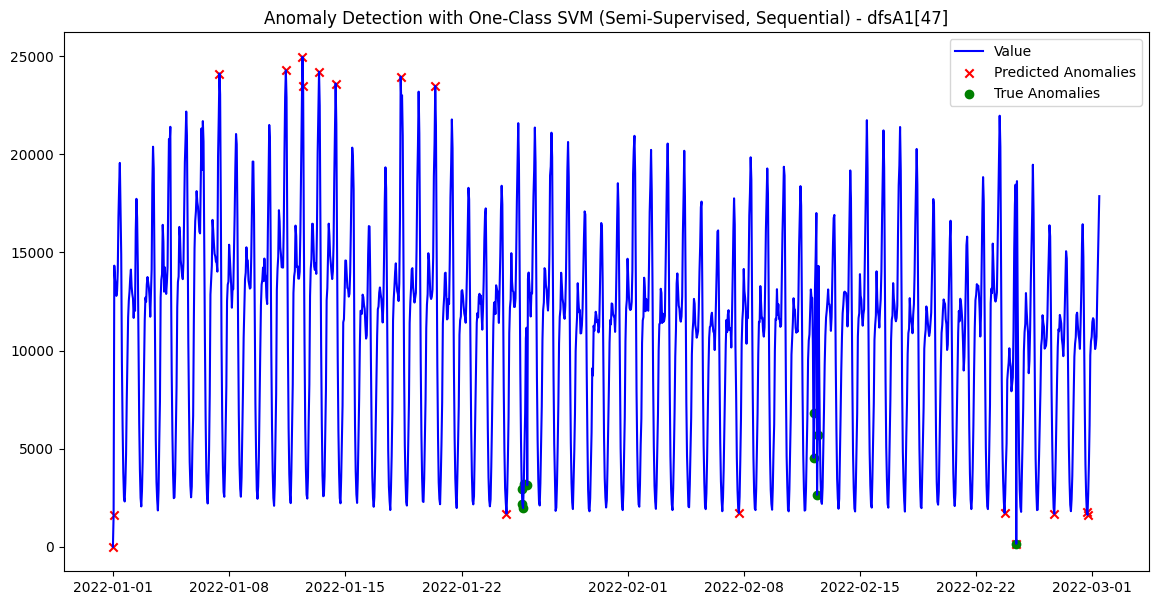

Average F1 Score across all datasets: 0.6473
Average Precision across all datasets: 0.6111
Average Recall across all datasets: 0.7329
All F1 Scores for each dataset: 0.9050, 0.8927, 0.9146, 0.1726, 0.9249, 0.0741


In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Define A1A and ParameterGrid for hyperparameter tuning
A1C = [17, 19, 26, 37, 40, 47]
param_grid = {
    'nu': [0.01, 0.05, 0.1, 0.5, 0.7],
    'kernel': ['rbf'],
    'gamma': ['scale', 'auto']
}
grid = ParameterGrid(param_grid)

# To calculate the average F1 score, precision, and recall
f1_scores = []
precision_scores = []
recall_scores = []

# Iterate through datasets
for i in A1C:
    print(f"Processing dataset dfsA1[{i}]...")

    # Feature engineering for sequential data
    data_features = dfsA1[i]

    # Separate features and labels
    X = data_features.drop(columns=['label'])  # Drop the label column
    y = data_features['label']  # Ground truth labels

    # Separate normal data for training
    X_normal = X[y == 0]  # Use only normal data for training
    y_test = y  # Full ground truth for evaluation

    # Normalize features
    scaler = MinMaxScaler()
    X_normal_normalized = scaler.fit_transform(X_normal)  # Normalize only normal training data
    X_normalized = scaler.transform(X)  # Normalize the entire dataset for evaluation

    # Hyperparameter tuning using grid search
    best_f1 = -1
    best_precision = -1
    best_recall = -1
    best_params = None
    best_predictions = None

    for params in grid:
        # Train One-Class SVM using only normal instances
        ocsvm = OneClassSVM(
            nu=params['nu'],
            kernel=params['kernel'],
            gamma=params['gamma']
        )
        ocsvm.fit(X_normal_normalized)  # Train on normal data only

        # Predict sequentially
        predictions = ocsvm.predict(X_normalized)

        # Map predictions to binary (1 = anomaly, 0 = normal)
        predictions = [1 if pred == -1 else 0 for pred in predictions]

        # Calculate metrics
        f1 = f1_score(y_test, predictions)
        precision = precision_score(y_test, predictions)
        recall = recall_score(y_test, predictions)

        # Update best parameters if current F1 is better
        if f1 > best_f1:
            best_f1 = f1
            best_precision = precision
            best_recall = recall
            best_params = params
            best_predictions = predictions

    # Append best metrics for the dataset
    f1_scores.append(best_f1)
    precision_scores.append(best_precision)
    recall_scores.append(best_recall)

    # Output best parameters and metrics for current dataset
    print(f"Best F1 Score for dfsA1[{i}]: {best_f1:.4f}")
    print(f"Best Precision: {best_precision:.4f}")
    print(f"Best Recall: {best_recall:.4f}")
    print(f"Best Parameters: {best_params}")

    # Add predictions to the original DataFrame for inspection
    data_features['predictions'] = best_predictions

    # Visualize anomalies
    plt.figure(figsize=(14, 7))
    plt.plot(data_features.index, data_features[f"value_{i}"], label='Value', color='blue')
    plt.scatter(data_features[data_features['predictions'] == 1].index,
                data_features[data_features['predictions'] == 1][f"value_{i}"],
                color='red', label='Predicted Anomalies', marker='x')
    plt.scatter(data_features[data_features['label'] == 1].index,
                data_features[data_features['label'] == 1][f"value_{i}"],
                color='green', label='True Anomalies', marker='o')

    plt.title(f'Anomaly Detection with One-Class SVM (Semi-Supervised, Sequential) - dfsA1[{i}]')
    plt.legend()
    plt.show()

# Calculate and output the average metrics
avg_f1_score = sum(f1_scores) / len(f1_scores)
avg_precision = sum(precision_scores) / len(precision_scores)
avg_recall = sum(recall_scores) / len(recall_scores)
print(f"Average F1 Score across all datasets: {avg_f1_score:.4f}")
print(f"Average Precision across all datasets: {avg_precision:.4f}")
print(f"Average Recall across all datasets: {avg_recall:.4f}")
# Print each F1 score formatted individually
formatted_f1_scores = [f"{score:.4f}" for score in f1_scores]
print(f"All F1 Scores for each dataset: {', '.join(formatted_f1_scores)}")


## A1D

## TEMP

Processing dataset dfsA1[28]...
Best F1 Score for dfsA1[28]: 0.9029
Best Precision: 0.8495
Best Recall: 0.9634
Best Parameters: {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.01}


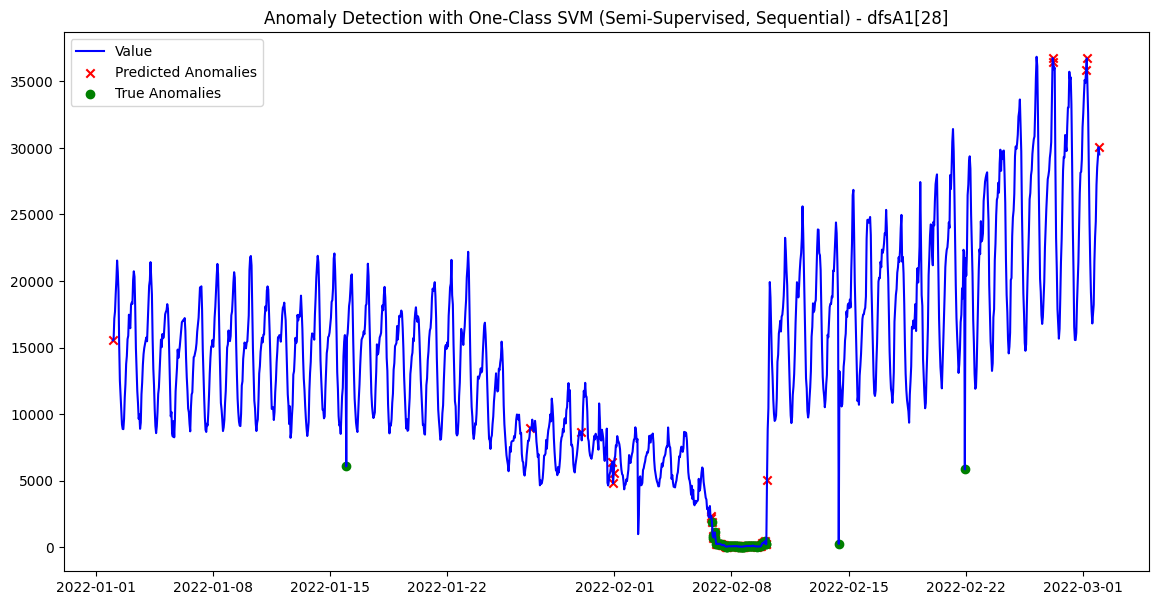

Processing dataset dfsA1[43]...
Best F1 Score for dfsA1[43]: 0.3226
Best Precision: 0.3333
Best Recall: 0.3125
Best Parameters: {'gamma': 'scale', 'kernel': 'rbf', 'nu': 0.01}


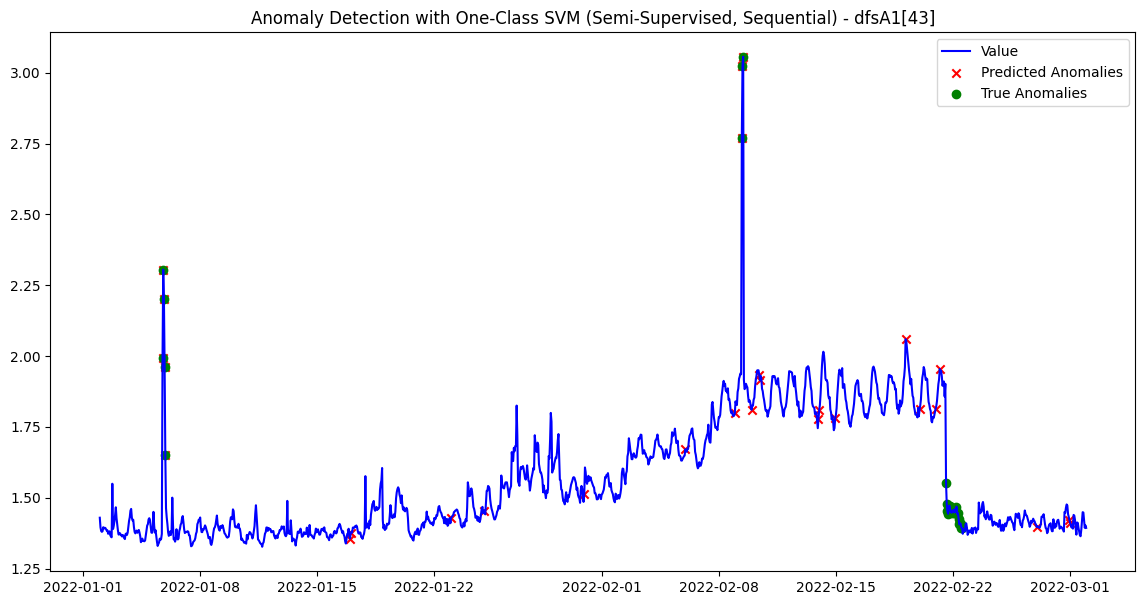

Processing dataset dfsA1[46]...
Best F1 Score for dfsA1[46]: 0.9298
Best Precision: 0.8908
Best Recall: 0.9725
Best Parameters: {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.01}


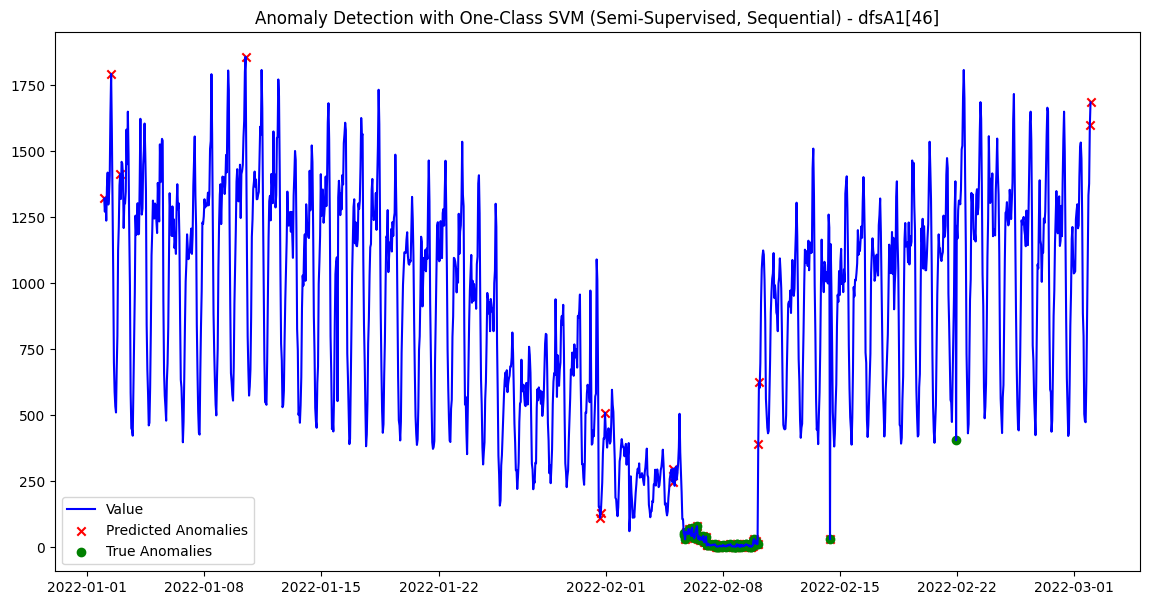

Processing dataset dfsA1[55]...
Best F1 Score for dfsA1[55]: 0.1481
Best Precision: 0.0909
Best Recall: 0.4000
Best Parameters: {'gamma': 'scale', 'kernel': 'rbf', 'nu': 0.01}


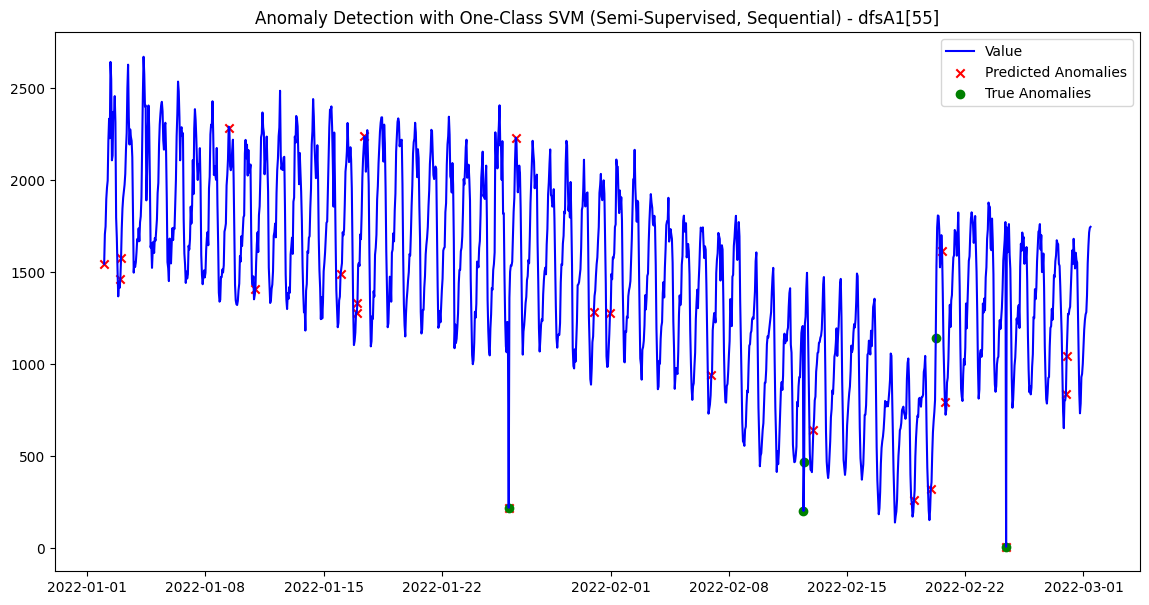

Processing dataset dfsA1[56]...
Best F1 Score for dfsA1[56]: 0.1818
Best Precision: 0.1176
Best Recall: 0.4000
Best Parameters: {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.01}


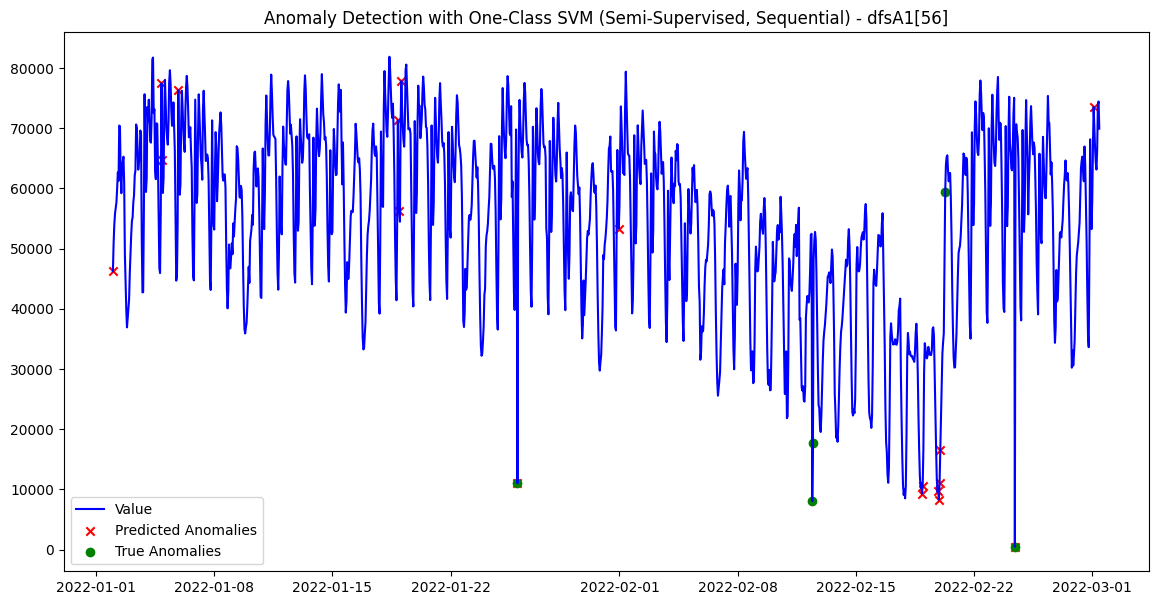

Processing dataset dfsA1[65]...
Best F1 Score for dfsA1[65]: 0.2500
Best Precision: 0.2667
Best Recall: 0.2353
Best Parameters: {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.01}


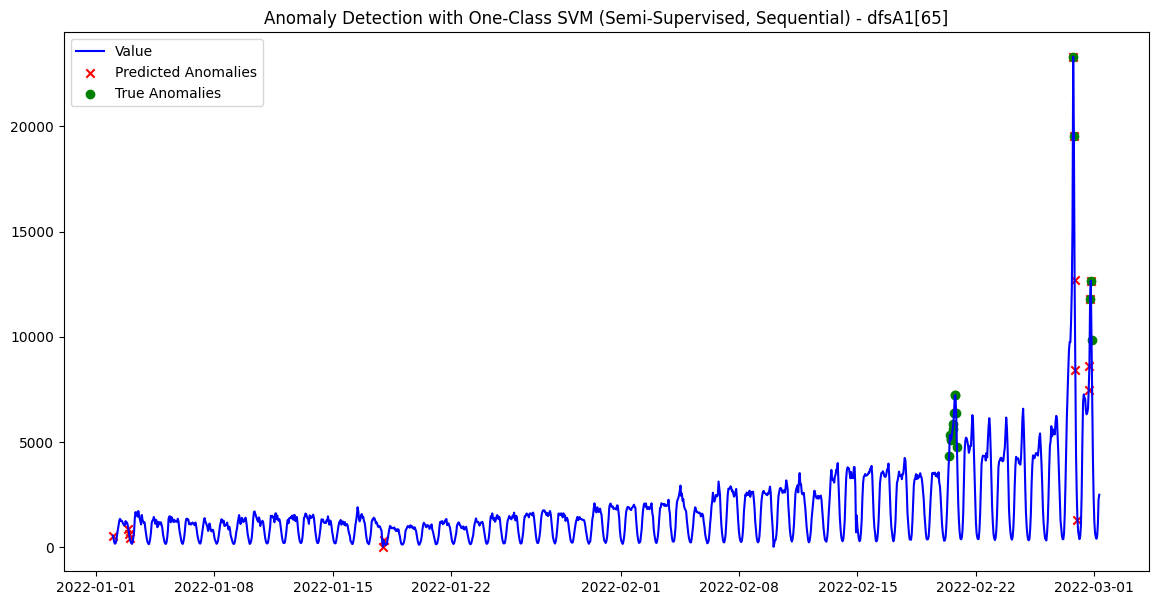

Average F1 Score across all datasets: 0.4559
Average Precision across all datasets: 0.4248
Average Recall across all datasets: 0.5473
All F1 Scores for each dataset: 0.9029, 0.3226, 0.9298, 0.1481, 0.1818, 0.2500


In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Define A1A and ParameterGrid for hyperparameter tuning
A1D = [28,43,46,55,56,65]
param_grid = {
    'nu': [0.01, 0.05, 0.1, 0.5, 0.7],
    'kernel': ['rbf'],
    'gamma': ['scale', 'auto']
}
grid = ParameterGrid(param_grid)

# To calculate the average F1 score, precision, and recall
f1_scores = []
precision_scores = []
recall_scores = []

# Iterate through datasets
for i in A1D:
    print(f"Processing dataset dfsA1[{i}]...")

    # Feature engineering for sequential data
    data_features = feature_engineering(dfsA1[i], value_col=f"value_{i}", window_size=24)

    # Separate features and labels
    X = data_features.drop(columns=['label'])  # Drop the label column
    y = data_features['label']  # Ground truth labels

    # Separate normal data for training
    X_normal = X[y == 0]  # Use only normal data for training
    y_test = y  # Full ground truth for evaluation

    # Normalize features
    scaler = MinMaxScaler()
    X_normal_normalized = scaler.fit_transform(X_normal)  # Normalize only normal training data
    X_normalized = scaler.transform(X)  # Normalize the entire dataset for evaluation

    # Hyperparameter tuning using grid search
    best_f1 = -1
    best_precision = -1
    best_recall = -1
    best_params = None
    best_predictions = None

    for params in grid:
        # Train One-Class SVM using only normal instances
        ocsvm = OneClassSVM(
            nu=params['nu'],
            kernel=params['kernel'],
            gamma=params['gamma']
        )
        ocsvm.fit(X_normal_normalized)  # Train on normal data only

        # Predict sequentially
        predictions = ocsvm.predict(X_normalized)

        # Map predictions to binary (1 = anomaly, 0 = normal)
        predictions = [1 if pred == -1 else 0 for pred in predictions]

        # Calculate metrics
        f1 = f1_score(y_test, predictions)
        precision = precision_score(y_test, predictions)
        recall = recall_score(y_test, predictions)

        # Update best parameters if current F1 is better
        if f1 > best_f1:
            best_f1 = f1
            best_precision = precision
            best_recall = recall
            best_params = params
            best_predictions = predictions

    # Append best metrics for the dataset
    f1_scores.append(best_f1)
    precision_scores.append(best_precision)
    recall_scores.append(best_recall)

    # Output best parameters and metrics for current dataset
    print(f"Best F1 Score for dfsA1[{i}]: {best_f1:.4f}")
    print(f"Best Precision: {best_precision:.4f}")
    print(f"Best Recall: {best_recall:.4f}")
    print(f"Best Parameters: {best_params}")

    # Add predictions to the original DataFrame for inspection
    data_features['predictions'] = best_predictions

    # Visualize anomalies
    plt.figure(figsize=(14, 7))
    plt.plot(data_features.index, data_features[f"value_{i}"], label='Value', color='blue')
    plt.scatter(data_features[data_features['predictions'] == 1].index,
                data_features[data_features['predictions'] == 1][f"value_{i}"],
                color='red', label='Predicted Anomalies', marker='x')
    plt.scatter(data_features[data_features['label'] == 1].index,
                data_features[data_features['label'] == 1][f"value_{i}"],
                color='green', label='True Anomalies', marker='o')

    plt.title(f'Anomaly Detection with One-Class SVM (Semi-Supervised, Sequential) - dfsA1[{i}]')
    plt.legend()
    plt.show()

# Calculate and output the average metrics
avg_f1_score = sum(f1_scores) / len(f1_scores)
avg_precision = sum(precision_scores) / len(precision_scores)
avg_recall = sum(recall_scores) / len(recall_scores)
print(f"Average F1 Score across all datasets: {avg_f1_score:.4f}")
print(f"Average Precision across all datasets: {avg_precision:.4f}")
print(f"Average Recall across all datasets: {avg_recall:.4f}")
# Print each F1 score formatted individually
formatted_f1_scores = [f"{score:.4f}" for score in f1_scores]
print(f"All F1 Scores for each dataset: {', '.join(formatted_f1_scores)}")


## UNSUPERVISED

Processing dataset dfsA1[28]...
Best F1 Score for dfsA1[28]: 0.4732
Best Precision: 0.3732
Best Recall: 0.6463
Best Parameters: {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.1}


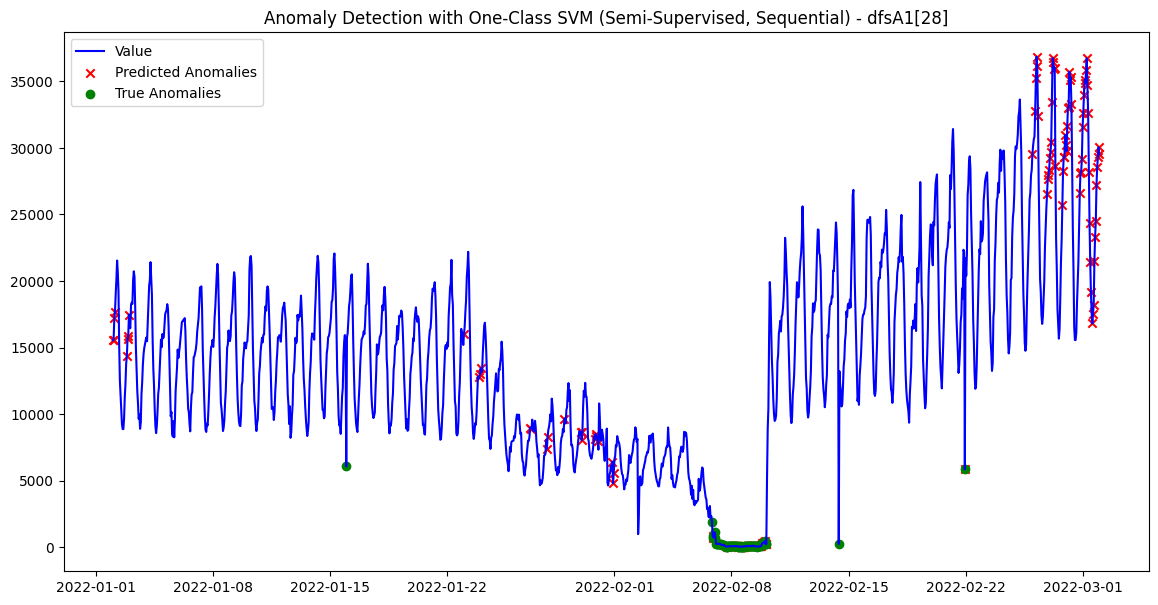

Processing dataset dfsA1[43]...
Best F1 Score for dfsA1[43]: 0.1304
Best Precision: 0.2143
Best Recall: 0.0938
Best Parameters: {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.01}


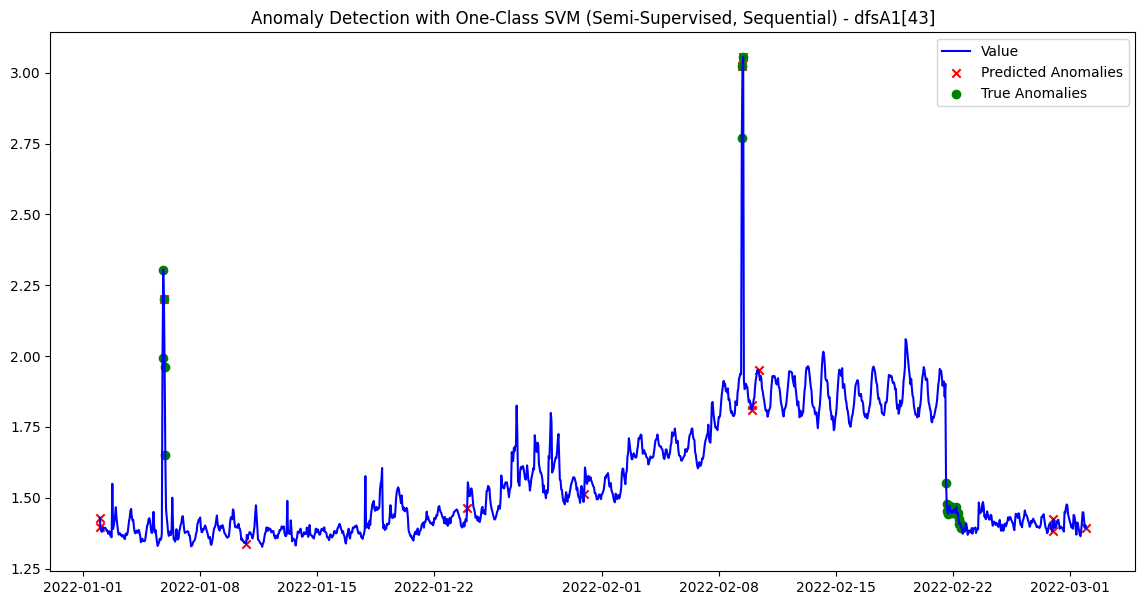

Processing dataset dfsA1[46]...
Best F1 Score for dfsA1[46]: 0.4800
Best Precision: 0.4255
Best Recall: 0.5505
Best Parameters: {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.1}


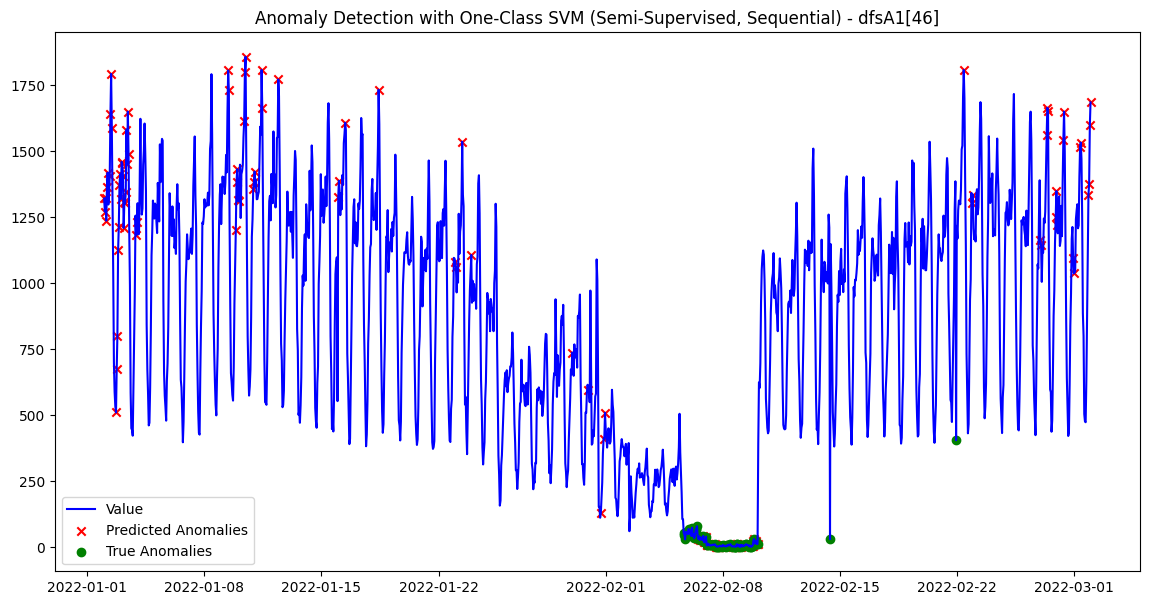

Processing dataset dfsA1[55]...
Best F1 Score for dfsA1[55]: 0.1379
Best Precision: 0.0833
Best Recall: 0.4000
Best Parameters: {'gamma': 'scale', 'kernel': 'rbf', 'nu': 0.01}


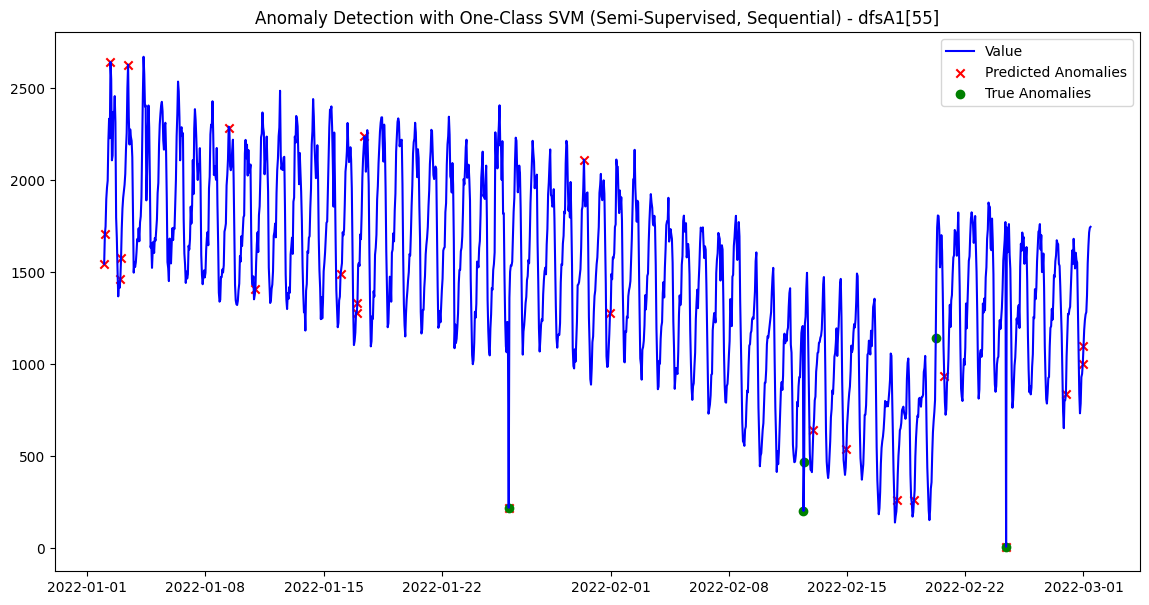

Processing dataset dfsA1[56]...
Best F1 Score for dfsA1[56]: 0.1667
Best Precision: 0.1053
Best Recall: 0.4000
Best Parameters: {'gamma': 'scale', 'kernel': 'rbf', 'nu': 0.01}


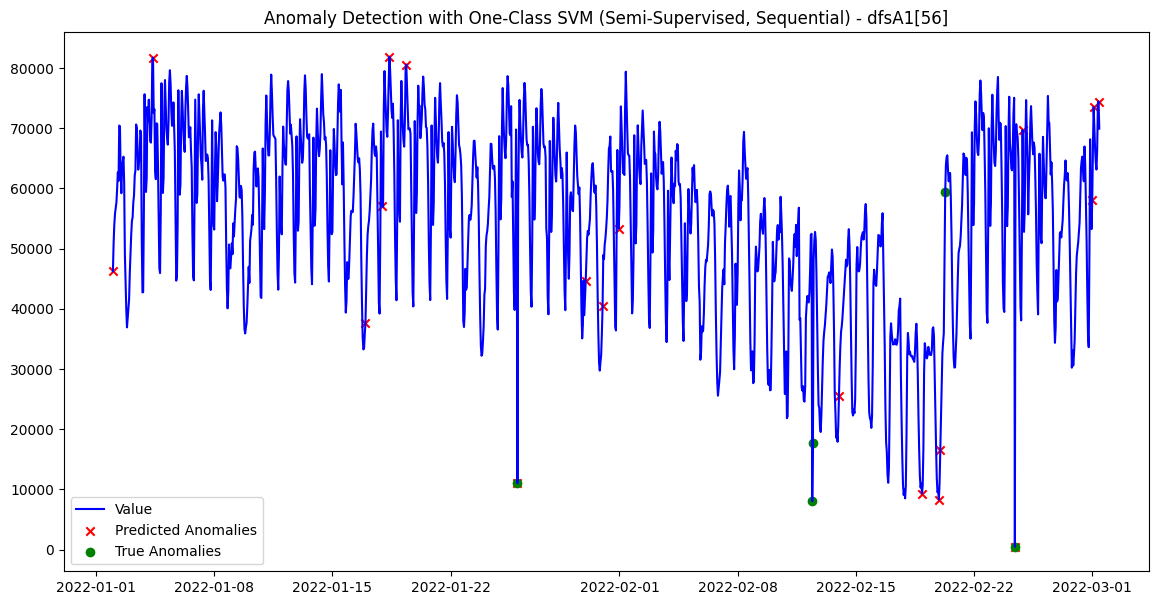

Processing dataset dfsA1[65]...
Best F1 Score for dfsA1[65]: 0.1875
Best Precision: 0.2000
Best Recall: 0.1765
Best Parameters: {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.01}


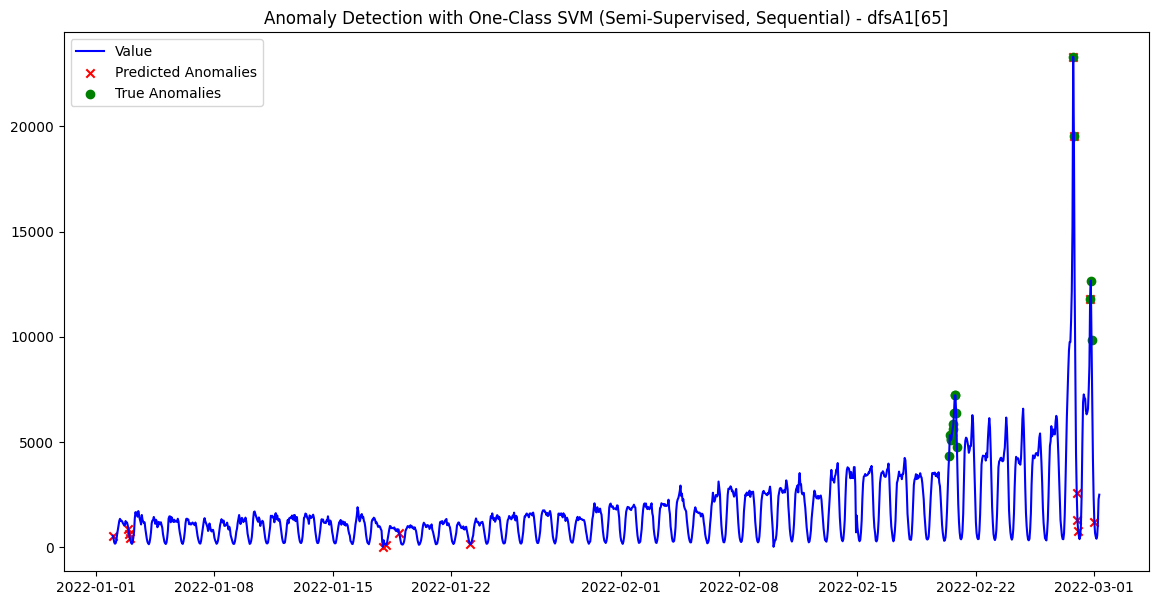

Average F1 Score across all datasets: 0.2626
Average Precision across all datasets: 0.2336
Average Recall across all datasets: 0.3778


In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Define A1A and ParameterGrid for hyperparameter tuning
A1D = [28,43,46,55,56,65]
param_grid = {
    'nu': [0.01, 0.05, 0.1, 0.5, 0.7],
    'kernel': ['rbf'],
    'gamma': ['scale', 'auto']
}
grid = ParameterGrid(param_grid)

# To calculate the average F1 score, precision, and recall
f1_scores = []
precision_scores = []
recall_scores = []

# Iterate through datasets
for i in A1D:
    print(f"Processing dataset dfsA1[{i}]...")

    # Feature engineering for sequential data
    data_features = feature_engineering(dfsA1[i], value_col=f"value_{i}", window_size=24)

    # Separate features and labels
    X = data_features.drop(columns=['label'])  # Drop the label column
    y = data_features['label']  # Ground truth labels

    y_test = y  # Full ground truth for evaluation

    # Normalize features
    scaler = MinMaxScaler()
    X_normalized = scaler.fit_transform(X)  # Normalize the entire dataset for evaluation

    # Hyperparameter tuning using grid search
    best_f1 = -1
    best_precision = -1
    best_recall = -1
    best_params = None
    best_predictions = None

    for params in grid:
        # Train One-Class SVM using only normal instances
        ocsvm = OneClassSVM(
            nu=params['nu'],
            kernel=params['kernel'],
            gamma=params['gamma']
        )
        ocsvm.fit(X_normalized)  # Train on normal data only

        # Predict sequentially
        predictions = ocsvm.predict(X_normalized)

        # Map predictions to binary (1 = anomaly, 0 = normal)
        predictions = [1 if pred == -1 else 0 for pred in predictions]

        # Calculate metrics
        f1 = f1_score(y_test, predictions)
        precision = precision_score(y_test, predictions)
        recall = recall_score(y_test, predictions)

        # Update best parameters if current F1 is better
        if f1 > best_f1:
            best_f1 = f1
            best_precision = precision
            best_recall = recall
            best_params = params
            best_predictions = predictions

    # Append best metrics for the dataset
    f1_scores.append(best_f1)
    precision_scores.append(best_precision)
    recall_scores.append(best_recall)

    # Output best parameters and metrics for current dataset
    print(f"Best F1 Score for dfsA1[{i}]: {best_f1:.4f}")
    print(f"Best Precision: {best_precision:.4f}")
    print(f"Best Recall: {best_recall:.4f}")
    print(f"Best Parameters: {best_params}")

    # Add predictions to the original DataFrame for inspection
    data_features['predictions'] = best_predictions

    # Visualize anomalies
    plt.figure(figsize=(14, 7))
    plt.plot(data_features.index, data_features[f"value_{i}"], label='Value', color='blue')
    plt.scatter(data_features[data_features['predictions'] == 1].index,
                data_features[data_features['predictions'] == 1][f"value_{i}"],
                color='red', label='Predicted Anomalies', marker='x')
    plt.scatter(data_features[data_features['label'] == 1].index,
                data_features[data_features['label'] == 1][f"value_{i}"],
                color='green', label='True Anomalies', marker='o')

    plt.title(f'Anomaly Detection with One-Class SVM (Semi-Supervised, Sequential) - dfsA1[{i}]')
    plt.legend()
    plt.show()

# Calculate and output the average metrics
avg_f1_score = sum(f1_scores) / len(f1_scores)
avg_precision = sum(precision_scores) / len(precision_scores)
avg_recall = sum(recall_scores) / len(recall_scores)
print(f"Average F1 Score across all datasets: {avg_f1_score:.4f}")
print(f"Average Precision across all datasets: {avg_precision:.4f}")
print(f"Average Recall across all datasets: {avg_recall:.4f}")


## NOT TEMP

Processing dataset dfsA1[28]...
Best F1 Score for dfsA1[28]: 0.9195
Best Precision: 0.8696
Best Recall: 0.9756
Best Parameters: {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.01}


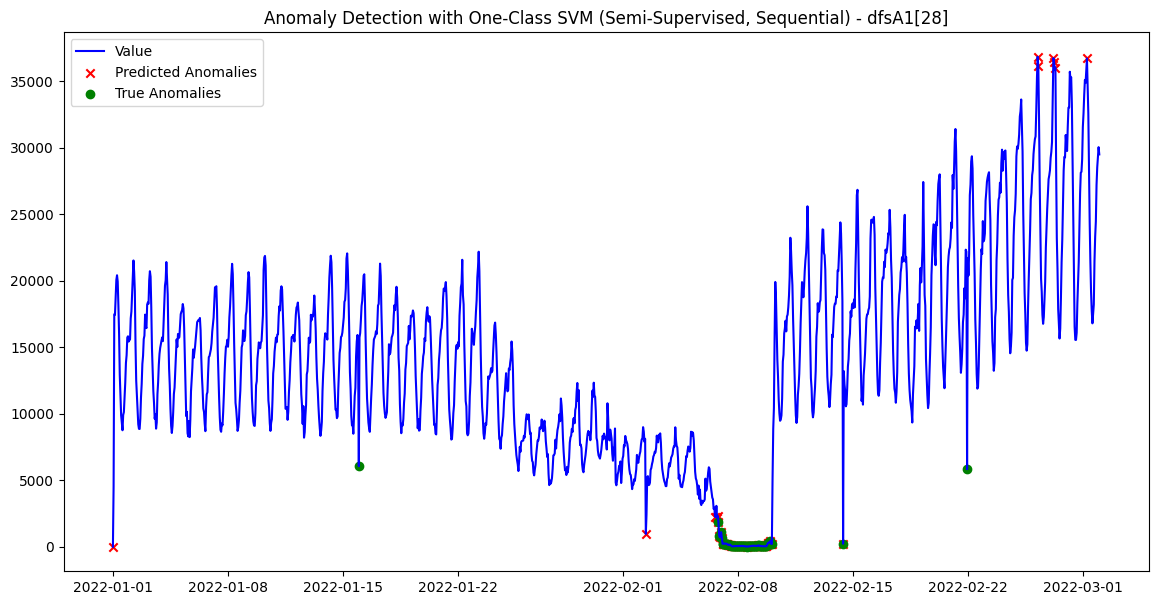

Processing dataset dfsA1[43]...
Best F1 Score for dfsA1[43]: 0.1923
Best Precision: 0.2500
Best Recall: 0.1562
Best Parameters: {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.01}


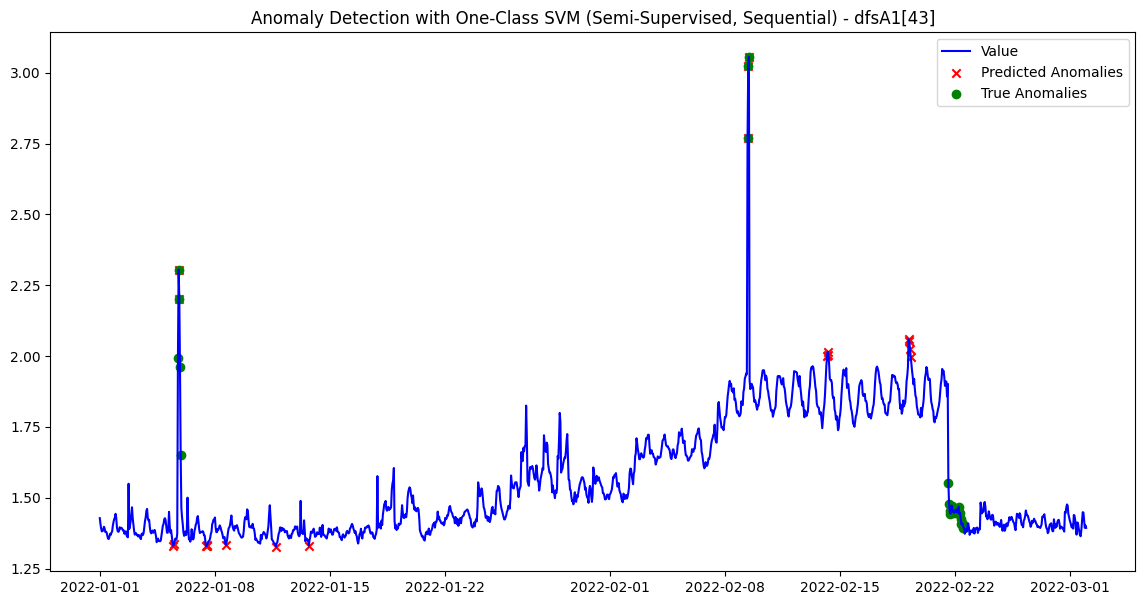

Processing dataset dfsA1[46]...
Best F1 Score for dfsA1[46]: 0.9391
Best Precision: 0.8926
Best Recall: 0.9908
Best Parameters: {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.01}


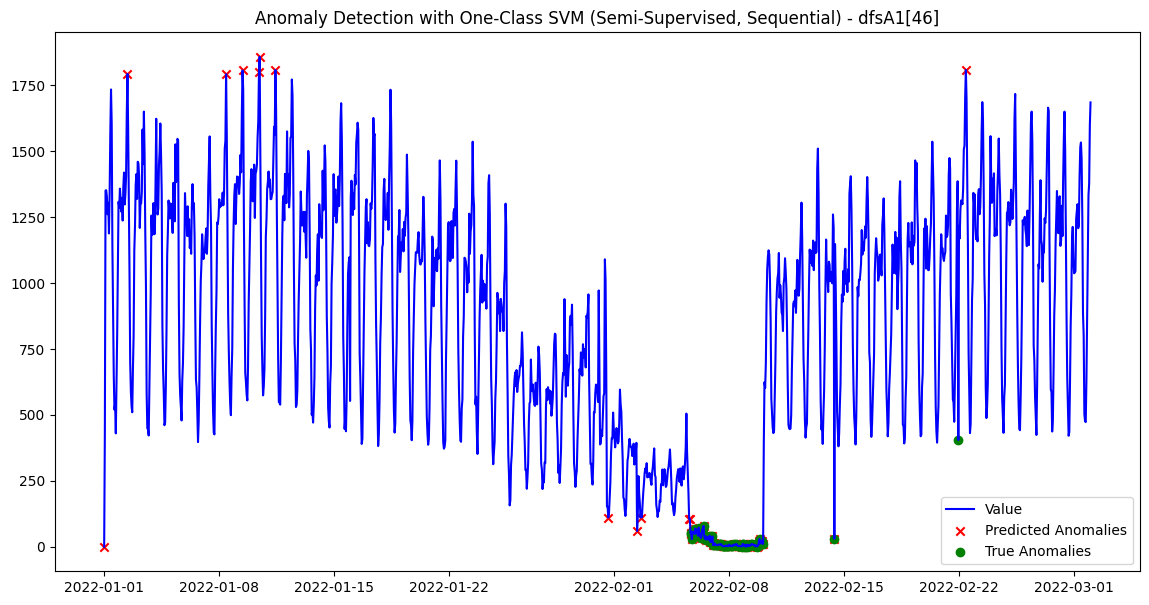

Processing dataset dfsA1[55]...
Best F1 Score for dfsA1[55]: 0.0952
Best Precision: 0.0625
Best Recall: 0.2000
Best Parameters: {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.01}


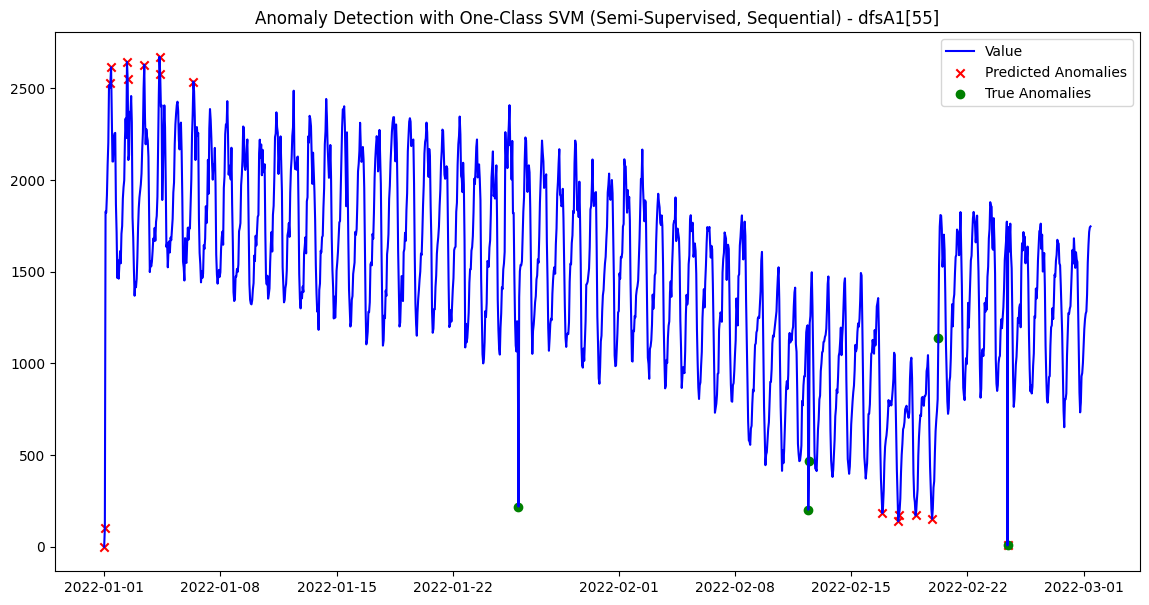

Processing dataset dfsA1[56]...
Best F1 Score for dfsA1[56]: 0.1818
Best Precision: 0.1176
Best Recall: 0.4000
Best Parameters: {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.01}


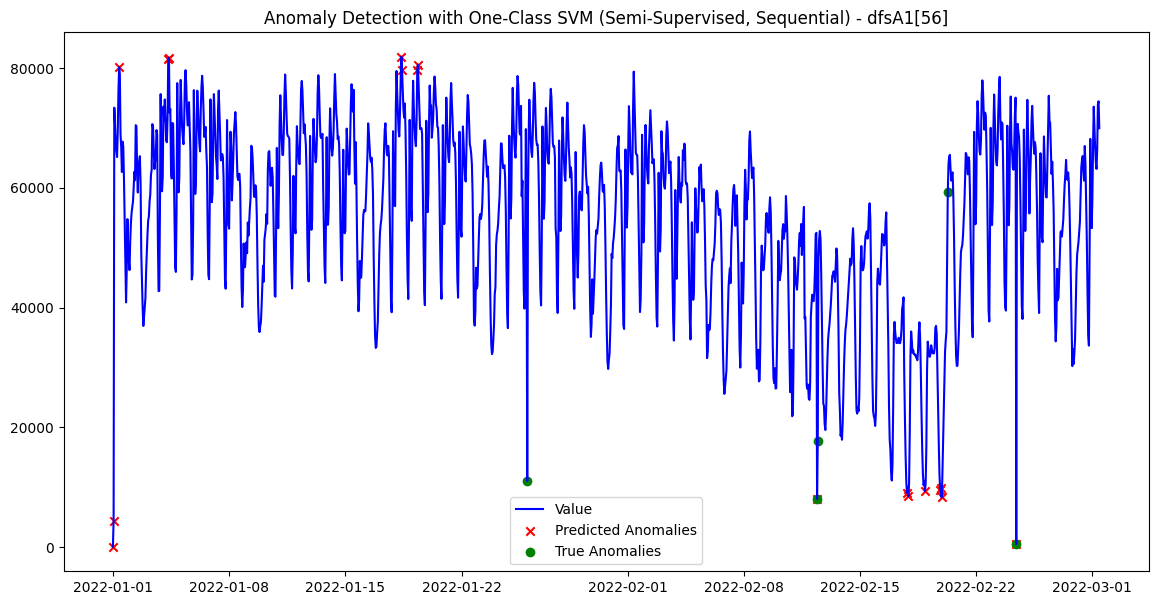

Processing dataset dfsA1[65]...
Best F1 Score for dfsA1[65]: 0.2857
Best Precision: 0.2778
Best Recall: 0.2941
Best Parameters: {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.01}


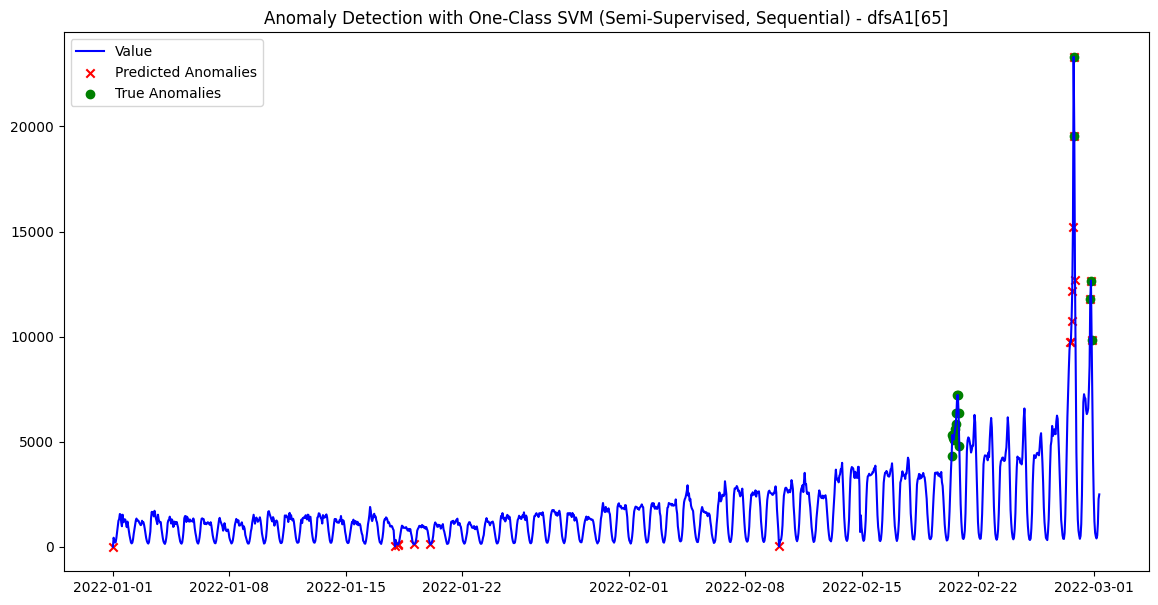

Average F1 Score across all datasets: 0.4356
Average Precision across all datasets: 0.4117
Average Recall across all datasets: 0.5028
All F1 Scores for each dataset: 0.9195, 0.1923, 0.9391, 0.0952, 0.1818, 0.2857


In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Define A1A and ParameterGrid for hyperparameter tuning
A1D = [28,43,46,55,56,65]
param_grid = {
    'nu': [0.01, 0.05, 0.1, 0.5, 0.7],
    'kernel': ['rbf'],
    'gamma': ['scale', 'auto']
}
grid = ParameterGrid(param_grid)

# To calculate the average F1 score, precision, and recall
f1_scores = []
precision_scores = []
recall_scores = []

# Iterate through datasets
for i in A1D:
    print(f"Processing dataset dfsA1[{i}]...")

    # Feature engineering for sequential data
    data_features = dfsA1[i]

    # Separate features and labels
    X = data_features.drop(columns=['label'])  # Drop the label column
    y = data_features['label']  # Ground truth labels

    # Separate normal data for training
    X_normal = X[y == 0]  # Use only normal data for training
    y_test = y  # Full ground truth for evaluation

    # Normalize features
    scaler = MinMaxScaler()
    X_normal_normalized = scaler.fit_transform(X_normal)  # Normalize only normal training data
    X_normalized = scaler.transform(X)  # Normalize the entire dataset for evaluation

    # Hyperparameter tuning using grid search
    best_f1 = -1
    best_precision = -1
    best_recall = -1
    best_params = None
    best_predictions = None

    for params in grid:
        # Train One-Class SVM using only normal instances
        ocsvm = OneClassSVM(
            nu=params['nu'],
            kernel=params['kernel'],
            gamma=params['gamma']
        )
        ocsvm.fit(X_normal_normalized)  # Train on normal data only

        # Predict sequentially
        predictions = ocsvm.predict(X_normalized)

        # Map predictions to binary (1 = anomaly, 0 = normal)
        predictions = [1 if pred == -1 else 0 for pred in predictions]

        # Calculate metrics
        f1 = f1_score(y_test, predictions)
        precision = precision_score(y_test, predictions)
        recall = recall_score(y_test, predictions)

        # Update best parameters if current F1 is better
        if f1 > best_f1:
            best_f1 = f1
            best_precision = precision
            best_recall = recall
            best_params = params
            best_predictions = predictions

    # Append best metrics for the dataset
    f1_scores.append(best_f1)
    precision_scores.append(best_precision)
    recall_scores.append(best_recall)

    # Output best parameters and metrics for current dataset
    print(f"Best F1 Score for dfsA1[{i}]: {best_f1:.4f}")
    print(f"Best Precision: {best_precision:.4f}")
    print(f"Best Recall: {best_recall:.4f}")
    print(f"Best Parameters: {best_params}")

    # Add predictions to the original DataFrame for inspection
    data_features['predictions'] = best_predictions

    # Visualize anomalies
    plt.figure(figsize=(14, 7))
    plt.plot(data_features.index, data_features[f"value_{i}"], label='Value', color='blue')
    plt.scatter(data_features[data_features['predictions'] == 1].index,
                data_features[data_features['predictions'] == 1][f"value_{i}"],
                color='red', label='Predicted Anomalies', marker='x')
    plt.scatter(data_features[data_features['label'] == 1].index,
                data_features[data_features['label'] == 1][f"value_{i}"],
                color='green', label='True Anomalies', marker='o')

    plt.title(f'Anomaly Detection with One-Class SVM (Semi-Supervised, Sequential) - dfsA1[{i}]')
    plt.legend()
    plt.show()

# Calculate and output the average metrics
avg_f1_score = sum(f1_scores) / len(f1_scores)
avg_precision = sum(precision_scores) / len(precision_scores)
avg_recall = sum(recall_scores) / len(recall_scores)
print(f"Average F1 Score across all datasets: {avg_f1_score:.4f}")
print(f"Average Precision across all datasets: {avg_precision:.4f}")
print(f"Average Recall across all datasets: {avg_recall:.4f}")
# Print each F1 score formatted individually
formatted_f1_scores = [f"{score:.4f}" for score in f1_scores]
print(f"All F1 Scores for each dataset: {', '.join(formatted_f1_scores)}")


## UNSUPERVISED

Processing dataset dfsA1[28]...
Best F1 Score for dfsA1[28]: 0.5357
Best Precision: 0.4225
Best Recall: 0.7317
Best Parameters: {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.1}


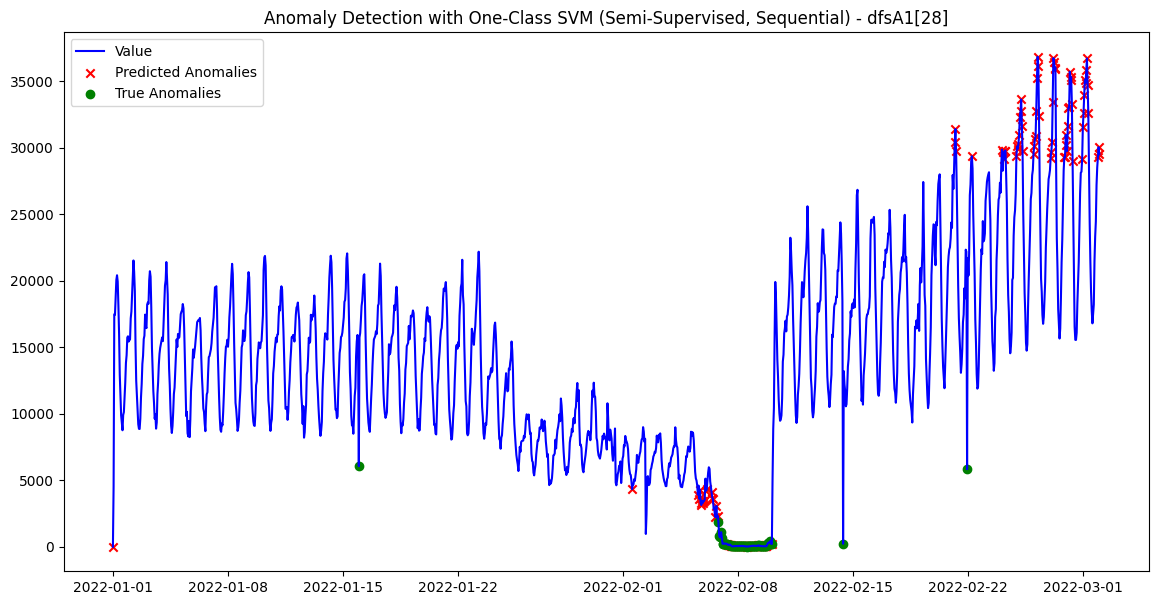

Processing dataset dfsA1[43]...
Best F1 Score for dfsA1[43]: 0.2128
Best Precision: 0.3333
Best Recall: 0.1562
Best Parameters: {'gamma': 'scale', 'kernel': 'rbf', 'nu': 0.01}


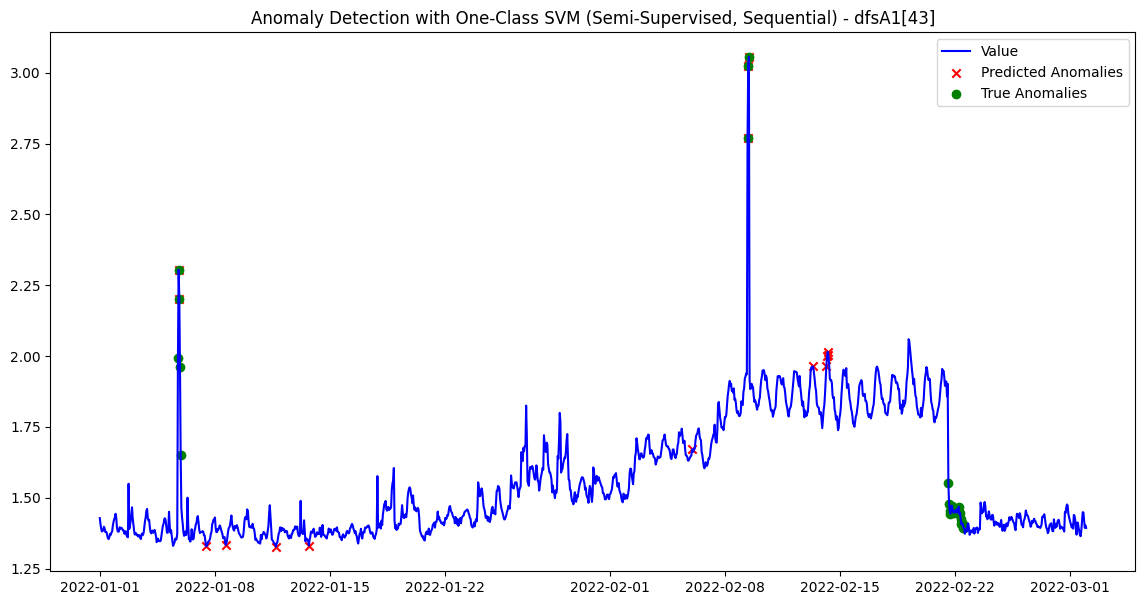

Processing dataset dfsA1[46]...
Best F1 Score for dfsA1[46]: 0.4683
Best Precision: 0.4126
Best Recall: 0.5413
Best Parameters: {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.1}


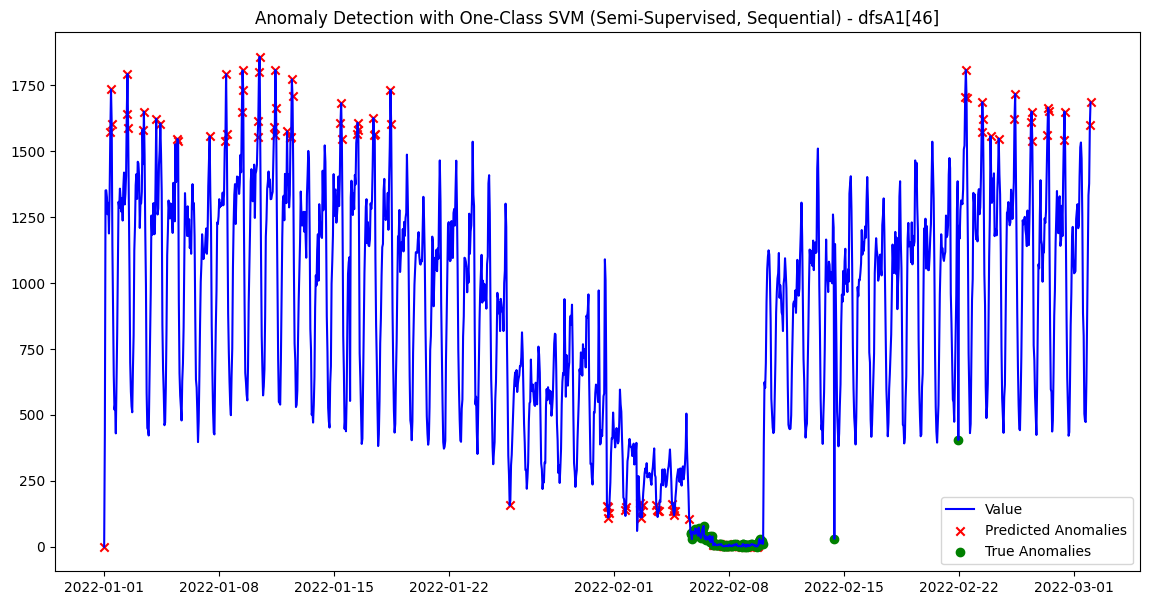

Processing dataset dfsA1[55]...
Best F1 Score for dfsA1[55]: 0.1111
Best Precision: 0.0769
Best Recall: 0.2000
Best Parameters: {'gamma': 'scale', 'kernel': 'rbf', 'nu': 0.01}


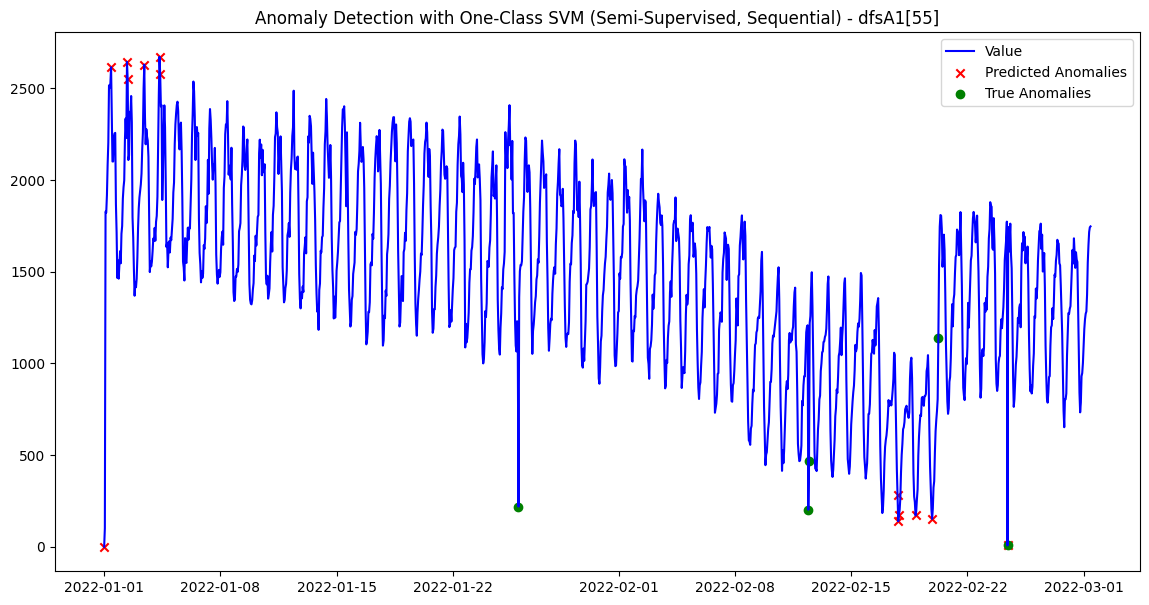

Processing dataset dfsA1[56]...
Best F1 Score for dfsA1[56]: 0.2000
Best Precision: 0.1333
Best Recall: 0.4000
Best Parameters: {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.01}


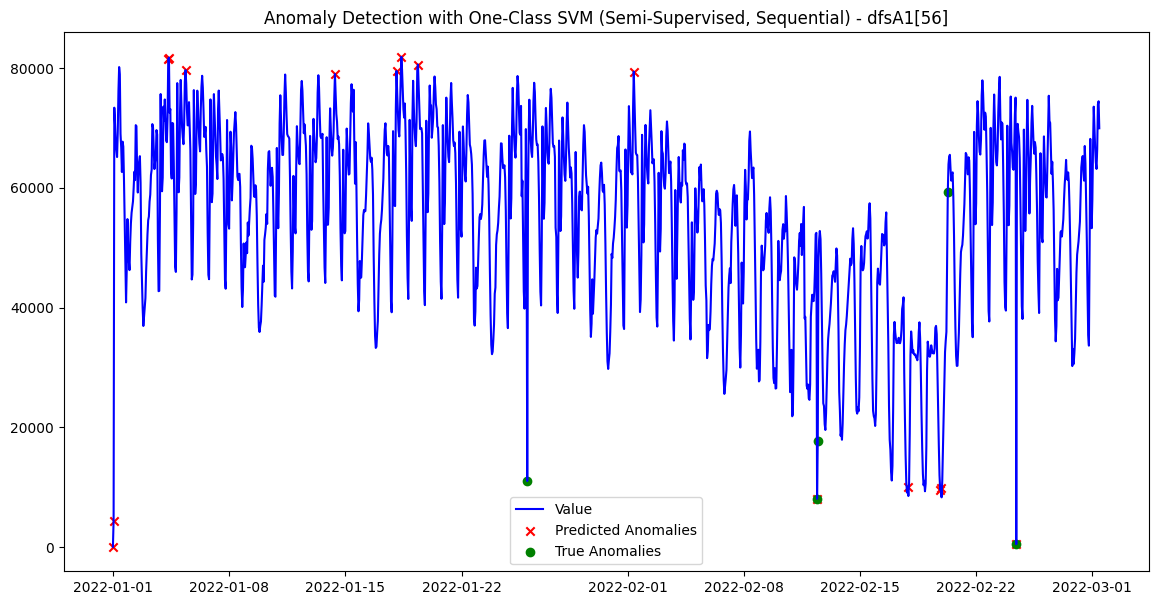

Processing dataset dfsA1[65]...
Best F1 Score for dfsA1[65]: 0.2254
Best Precision: 0.1481
Best Recall: 0.4706
Best Parameters: {'gamma': 'scale', 'kernel': 'rbf', 'nu': 0.01}


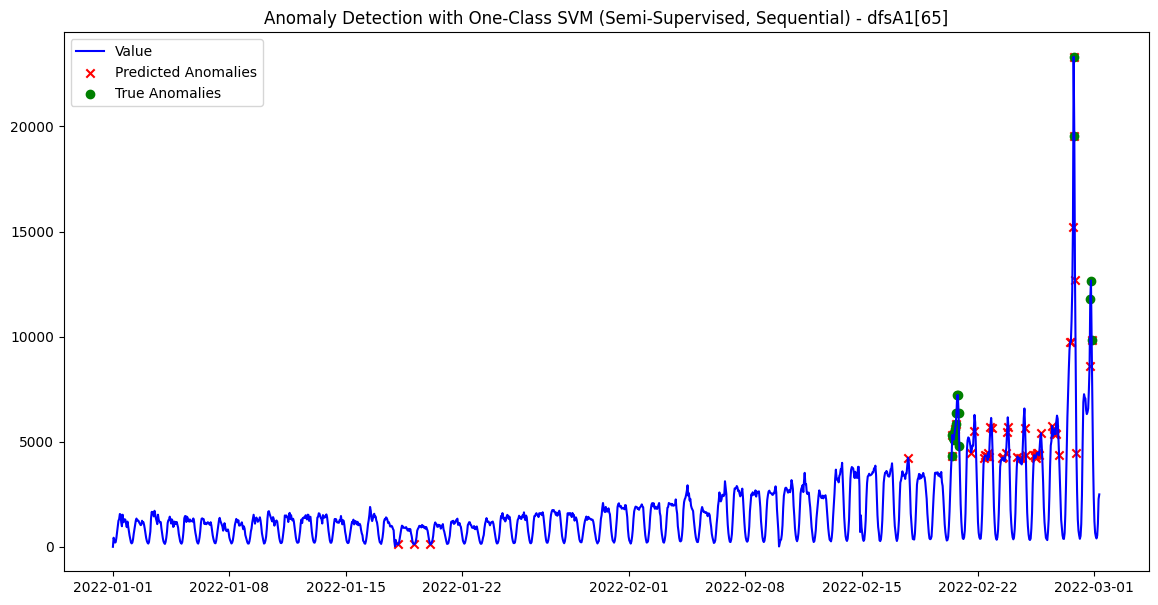

Average F1 Score across all datasets: 0.2922
Average Precision across all datasets: 0.2545
Average Recall across all datasets: 0.4166


In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Define A1A and ParameterGrid for hyperparameter tuning
A1D = [28,43,46,55,56,65]
param_grid = {
    'nu': [0.01, 0.05, 0.1, 0.5, 0.7],
    'kernel': ['rbf'],
    'gamma': ['scale', 'auto']
}
grid = ParameterGrid(param_grid)

# To calculate the average F1 score, precision, and recall
f1_scores = []
precision_scores = []
recall_scores = []

# Iterate through datasets
for i in A1D:
    print(f"Processing dataset dfsA1[{i}]...")

    # Feature engineering for sequential data
    data_features = dfsA1[i]

    # Separate features and labels
    X = data_features.drop(columns=['label'])  # Drop the label column
    y = data_features['label']  # Ground truth labels

    y_test = y  # Full ground truth for evaluation

    # Normalize features
    scaler = MinMaxScaler()
    X_normalized = scaler.fit_transform(X)  # Normalize the entire dataset for evaluation

    # Hyperparameter tuning using grid search
    best_f1 = -1
    best_precision = -1
    best_recall = -1
    best_params = None
    best_predictions = None

    for params in grid:
        # Train One-Class SVM using only normal instances
        ocsvm = OneClassSVM(
            nu=params['nu'],
            kernel=params['kernel'],
            gamma=params['gamma']
        )
        ocsvm.fit(X_normalized)  # Train on normal data only

        # Predict sequentially
        predictions = ocsvm.predict(X_normalized)

        # Map predictions to binary (1 = anomaly, 0 = normal)
        predictions = [1 if pred == -1 else 0 for pred in predictions]

        # Calculate metrics
        f1 = f1_score(y_test, predictions)
        precision = precision_score(y_test, predictions)
        recall = recall_score(y_test, predictions)

        # Update best parameters if current F1 is better
        if f1 > best_f1:
            best_f1 = f1
            best_precision = precision
            best_recall = recall
            best_params = params
            best_predictions = predictions

    # Append best metrics for the dataset
    f1_scores.append(best_f1)
    precision_scores.append(best_precision)
    recall_scores.append(best_recall)

    # Output best parameters and metrics for current dataset
    print(f"Best F1 Score for dfsA1[{i}]: {best_f1:.4f}")
    print(f"Best Precision: {best_precision:.4f}")
    print(f"Best Recall: {best_recall:.4f}")
    print(f"Best Parameters: {best_params}")

    # Add predictions to the original DataFrame for inspection
    data_features['predictions'] = best_predictions

    # Visualize anomalies
    plt.figure(figsize=(14, 7))
    plt.plot(data_features.index, data_features[f"value_{i}"], label='Value', color='blue')
    plt.scatter(data_features[data_features['predictions'] == 1].index,
                data_features[data_features['predictions'] == 1][f"value_{i}"],
                color='red', label='Predicted Anomalies', marker='x')
    plt.scatter(data_features[data_features['label'] == 1].index,
                data_features[data_features['label'] == 1][f"value_{i}"],
                color='green', label='True Anomalies', marker='o')

    plt.title(f'Anomaly Detection with One-Class SVM (Semi-Supervised, Sequential) - dfsA1[{i}]')
    plt.legend()
    plt.show()

# Calculate and output the average metrics
avg_f1_score = sum(f1_scores) / len(f1_scores)
avg_precision = sum(precision_scores) / len(precision_scores)
avg_recall = sum(recall_scores) / len(recall_scores)
print(f"Average F1 Score across all datasets: {avg_f1_score:.4f}")
print(f"Average Precision across all datasets: {avg_precision:.4f}")
print(f"Average Recall across all datasets: {avg_recall:.4f}")


## NAB

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)


data = {}
path = '/content/drive/My Drive/NAB/data'

def addFolderAndReadAll(f_name):
    data[f_name] = {}
    csvs = os.listdir(path + '/' + f_name)
    csvs_num = 0
    for csv in csvs:
        data[f_name][csv] = pd.read_csv(path + '/' + f_name + '/' + csv)
        csvs_num += 1
    return csvs_num

csvs_num = sum([addFolderAndReadAll(f_name) for f_name in os.listdir(path)])

with open('/content/drive//My Drive/NAB/labels/combined_windows.json', 'r') as file:
    labels = json.load(file)

for key1 in data:
    for key2 in data[key1]:
        one_csv_labels = labels[key1+'/'+key2]
        data[key1][key2]['label'] = np.array(0)
        num = 0
        for interval in one_csv_labels:
            #print(key2, interval, num)
            index1 = list(data[key1][key2]['timestamp']).index(interval[0][:19])
            index2 = list(data[key1][key2]['timestamp']).index(interval[1][:19])
            data[key1][key2]['label'][num] = slice(index1, index2)
            #data[key1][key2]['label'] = data[key1][key2]['label'].apply(lambda x: 1 if isinstance(x, slice) else 0)
            num += 1

import os
import pandas as pd
import numpy as np
import json

data = {}
path = '/content/drive/My Drive/NAB/data'

# Load all CSV files into a nested dictionary
def addFolderAndReadAll(f_name):
    data[f_name] = {}
    csvs = os.listdir(path + '/' + f_name)
    csvs_num = 0
    for csv in csvs:
        data[f_name][csv] = pd.read_csv(path + '/' + f_name + '/' + csv)
        csvs_num += 1
    return csvs_num

# Read data from all folders
csvs_num = sum([addFolderAndReadAll(f_name) for f_name in os.listdir(path)])

# Load anomaly intervals from JSON
with open('/content/drive/My Drive/NAB/labels/combined_windows.json', 'r') as file:
    labels = json.load(file)

# Process each CSV and assign binary labels
for key1 in data:
    for key2 in data[key1]:
        one_csv_labels = labels[key1 + '/' + key2]
        df = data[key1][key2]
        df['label'] = 0  # Initialize label column with 0

        # Mark intervals as anomalies
        for interval in one_csv_labels:
            index1 = list(df['timestamp']).index(interval[0][:19])
            index2 = list(df['timestamp']).index(interval[1][:19])
            df.loc[index1:index2, 'label'] = 1  # Set rows within interval to 1

        # Update the DataFrame back into the data dictionary
        data[key1][key2] = df

# All `data` dictionaries now have binary labels.

In [ ]:
import math

def sigmoid(x):
    """Standard sigmoid function."""
    return 1 / (1 + math.exp(-x))

def sigmoid_score(t, A_tp, A_fp):
    """
    Calculate the scaled sigmoid score for a detection.
    @param t: Relative position of the detection:
              - t = -1 is far left of the window, t = 0 is the right edge.
              - t > 0 considers detections outside the window.
    @param A_tp: Reward for true positives.
    @param A_fp: Penalty for false positives.
    """
    if t > 3.0:
        return -1.0  # Assign -1 for detections too far after the window
    elif 0 < t <= 3.0:
        return  2* (1 / (1 + math.exp(5 * t))) - 1.0  # Sigmoid scaling
    else:
        return  2* (1 / (1 + math.exp(5 * t))) - 1.0  # Normal sigmoid for in-window cases

def compute_raw_score_debug(detections, anomaly_windows, A_tp, A_fp, A_fn):
    """
    Compute the raw NAB score for a dataset with detailed debugging.
    Also computes S_perfect and S_null for comparison.
    @param detections: List of detected anomaly timestamps.
    @param anomaly_windows: List of anomaly windows (start_time, end_time).
    @param A_tp: Reward for true positives.
    @param A_fp: Penalty for false positives.
    @param A_fn: Penalty for missed anomaly windows (false negatives).

    @return: Raw NAB score, S_perfect, S_null.
    """
    score = 0
    missed_windows = 0


    # Sort detections and anomaly windows
    detections = sorted(detections)
    anomaly_windows = sorted(anomaly_windows, key=lambda x: x[0])

    # Compute the actual score
    for i, window in enumerate(anomaly_windows):
        start_time, end_time = window
        window_length = end_time - start_time

        # Find detections within or after the current window
        detections_in_window = [d for d in detections if d >= start_time]

        if detections_in_window and start_time <= detections_in_window[0] <= end_time:
            # Detection within the window
            first_detection = detections_in_window[0]
            t = -3 + 2 * (first_detection - start_time) / window_length
            contribution = sigmoid_score(t, A_tp, A_fp)
            print(f"Window {i}: {window}, Detection t={t:.3f}, Contribution={contribution:.3f}")
            score += contribution
            # Remove the detection
            detections.remove(first_detection)
            detections_in_window = [d for d in detections if start_time <= d <= end_time]
            for d in detections_in_window:
                detections.remove(d)


        elif detections_in_window:
            # Check all detections just outside the current window
            near_miss_detections = [d for d in detections_in_window if 0 < (d - end_time) <= 3.0]

            for near_detection in near_miss_detections:
                t = (near_detection - end_time)  # Relative position after the window
                contribution = sigmoid_score(t, A_tp, A_fp)
                print(f"Window {i}: {window}, Near-miss detection t={t:.3f}, Contribution={contribution:.3f}")
                score += contribution
                # Remove the detection after scoring it
                detections.remove(near_detection)
        else:
            # No detections in this window - count as a false negative
            print(f"Window {i}: {window}, Missed anomaly window. Penalty={A_fn:.3f}")
            score += A_fn
            missed_windows += 1

    # Handle remaining detections as false positives or outside windows
    for detection in detections:
        # Check if detection is close to the end of any window
        near_miss_found = False
        for window in anomaly_windows:
            _, end_time = window
            if 0 < (detection - end_time) <= 3.0:
                t = (detection - end_time)
                contribution = sigmoid_score(t, A_tp, A_fp)
                print(f"Detection {detection} near-miss outside any window. t={t:.3f}, Contribution={contribution:.3f}")
                score += contribution
                near_miss_found = True
                break

        if not near_miss_found:
            # Treat as a false positive
            contribution = sigmoid_score(3.0, A_tp, A_fp)  # Use t=3.0 for far detections
            print(f"False positive detection at {detection}, Contribution={contribution:.3f}")
            score += contribution

    print(f"Raw score for dataset: {score:.3f}")

    return score

In [ ]:
def create_anomaly_windows(binary_labels):
    """
    Generate an array of anomaly windows (start, end) tuples from binary labels.

    @param binary_labels: List or array of binary labels (0s and 1s).
                          1 indicates an anomaly, 0 indicates normal.

    @return: List of tuples where each tuple is (start_index, end_index) for an anomaly window.
    """
    anomaly_windows = []
    in_window = False
    start_index = None

    for i, label in enumerate(binary_labels):
        if label == 1 and not in_window:
            # Start of a new anomaly window
            start_index = i
            in_window = True
        elif label == 0 and in_window:
            # End of the current anomaly window
            end_index = i - 1
            anomaly_windows.append((start_index, end_index))
            in_window = False

    # If the last label is part of an anomaly window, close it
    if in_window:
        anomaly_windows.append((start_index, len(binary_labels) - 1))

    return anomaly_windows


In [ ]:
anomaly_windows = {}
binary_labels = data["realKnownCause"]["nyc_taxi.csv"]["label"]
# Generate the anomaly windows for the current labels
anomaly_windows["nyc_taxi.csv"] = create_anomaly_windows(binary_labels)

## temp

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Perform feature engineering
def feature_engineering_nab(df, value_col, window_size):
    df = df.copy()

    if not isinstance(df.index, pd.DatetimeIndex):
      df['timestamp'] = pd.to_datetime(df['timestamp'])  # Assuming 'timestamp' is the datetime column
      df.set_index('timestamp', inplace=True)

    # Rolling statistics
    df[f'rolling_mean_{window_size}'] = df[value_col].rolling(window=window_size).mean()
    df[f'rolling_std_{window_size}'] = df[value_col].rolling(window=window_size).std()
    df[f'rolling_min_{window_size}'] = df[value_col].rolling(window=window_size).min()
    df[f'rolling_max_{window_size}'] = df[value_col].rolling(window=window_size).max()

    # Time-based features
    df['hour'] = df.index.hour
    df['day_of_week'] = df.index.weekday
    df['day_of_month'] = df.index.day
    df['month'] = df.index.month
    df['Lag'] = df[value_col].shift(window_size)
    df["lag_1"] = df[value_col].shift(1)
    df["lag_2"] = df[value_col].shift(2)

    # Sinusoidal encoding for capturing daily seasonality
    df['sin_day'] = np.sin(2 * np.pi * df.index.hour / window_size)
    df['cos_day'] = np.cos(2 * np.pi * df.index.hour / window_size)
    # Drop rows with NaN due to rolling statistics
    df.dropna(inplace=True)
    return df

Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
False positive detection at 2317, Contribution=-1.000
False positive detection at 2342, Contribution=-1.000
False positive detection at 2343, Contribution=-1.000
False positive detection at 2344, Contribution=-1.000
False positive detection at 2345, Contribution=-1.000
False positive detection at 2346, Contribution=-1.000
False positive detection at 2347, Contribution=-1.000
False positive detection at 2348, Contribution=-1.000
False positive detection at 2349, Contribution=-1.000
False positive detection at 2350, Contribution=-1.000
False positive detection at 2351, Contribution=-1.000
False positive detection at 2352, Contribution=-1.000
False positive detection at 2353, Contribution=-1.000
False positive detection at 2354, Contribution=-1.000
False positive detection at 2355, Contribution=-1.000
False positive detection at 2356, Contribution=-1.000
False positive detection at 2357, Contribution=-1.000
False positive detection at

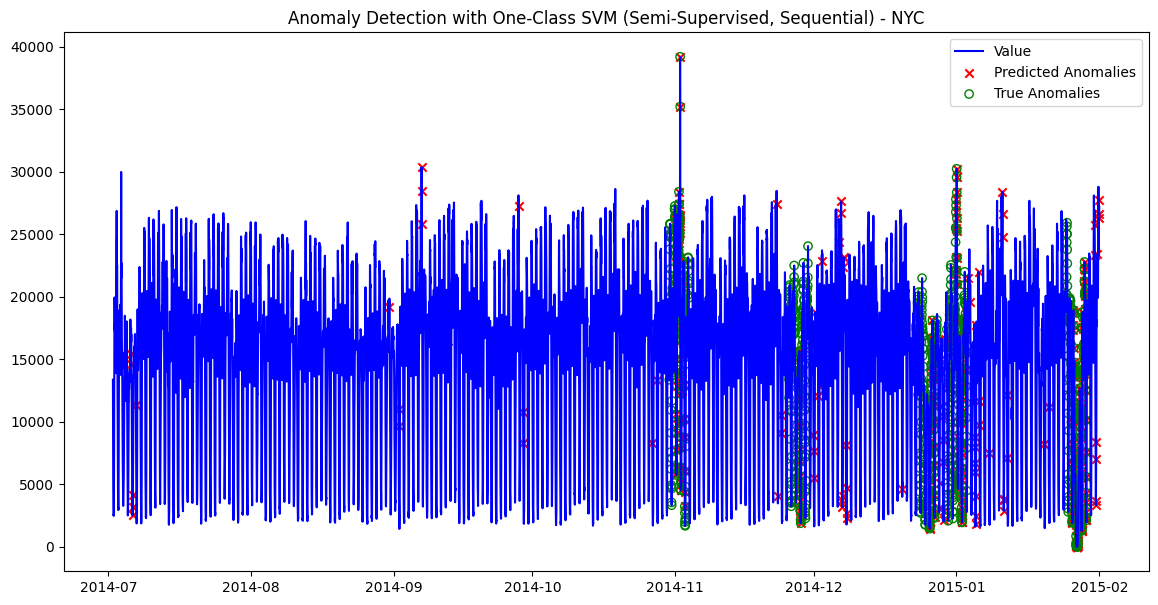

In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


param_grid = {
    'nu': [0.01, 0.05, 0.1, 0.5, 0.7],
    'kernel': ['rbf'],
    'gamma': ['scale', 'auto']
}
grid = ParameterGrid(param_grid)

# Feature engineering for sequential data
data_features = feature_engineering_nab(data["realKnownCause"]["nyc_taxi.csv"], value_col=f"value", window_size=48)

# Separate features and labels
X = data_features.drop(columns=['label'])  # Drop the label column
y = data_features['label']  # Ground truth labels

# Separate normal data for training
X_normal = X[y == 0]  # Use only normal data for training
y_test = y  # Full ground truth for evaluation

# Normalize features
scaler = MinMaxScaler()
X_normal_normalized = scaler.fit_transform(X_normal)  # Normalize only normal training data
X_normalized = scaler.transform(X)  # Normalize the entire dataset for evaluation

# Hyperparameter tuning using grid search
best_f1 = -1
best_precision = -1
best_recall = -1
best_nab = float("-inf")
best_params = None
best_predictions = None

for params in grid:
    # Train One-Class SVM using only normal instances
    ocsvm = OneClassSVM(
        nu=params['nu'],
        kernel=params['kernel'],
        gamma=params['gamma']
    )
    ocsvm.fit(X_normal_normalized)  # Train on normal data only

    # Predict sequentially
    predictions = ocsvm.predict(X_normalized)

    # Map predictions to binary (1 = anomaly, 0 = normal)
    predictions = [1 if pred == -1 else 0 for pred in predictions]

    # Adjust detections by adding the offset
    detections = [i for i, x in enumerate(predictions) if x == 1]

    # Compute the NAB score
    nab_score = compute_raw_score_debug(detections, anomaly_windows["nyc_taxi.csv"], A_tp = 1.0, A_fp = -0.11, A_fn = -1.0)

    # Calculate metrics
    f1 = f1_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)

    # Update best parameters if current F1 is better
    if nab_score > best_nab:
        best_f1 = f1
        best_precision = precision
        best_recall = recall
        best_params = params
        best_predictions = predictions
        best_nab = nab_score

# Output best parameters and metrics for current dataset
print(f"Best F1 Score for NYC]: {best_f1:.4f}")
print(f"Best Precision: {best_precision:.4f}")
print(f"Best Recall: {best_recall:.4f}")
print(f"Best Parameters: {best_params}")
print(f"Best NAB Score: {best_nab:.4f}")

# Add predictions to the original DataFrame for inspection
data_features['predictions'] = best_predictions

# Visualize anomalies
plt.figure(figsize=(14, 7))
plt.plot(data_features.index, data_features[f"value"], label='Value', color='blue')
plt.scatter(data_features[data_features['predictions'] == 1].index,
            data_features[data_features['predictions'] == 1][f"value"],
            color='red', label='Predicted Anomalies', marker='x')
plt.scatter(data_features[data_features['label'] == 1].index,
            data_features[data_features['label'] == 1][f"value"],
            color='green', label='True Anomalies', marker='o', facecolors="none")

plt.title(f'Anomaly Detection with One-Class SVM (Semi-Supervised, Sequential) - NYC')
plt.legend()
plt.show()



## not temp

Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
False positive detection at 2321, Contribution=-1.000
False positive detection at 2339, Contribution=-1.000
False positive detection at 2340, Contribution=-1.000
False positive detection at 2341, Contribution=-1.000
False positive detection at 2342, Contribution=-1.000
False positive detection at 2343, Contribution=-1.000
False positive detection at 2344, Contribution=-1.000
False positive detection at 2345, Contribution=-1.000
False positive detection at 2346, Contribution=-1.000
False positive detection at 2347, Contribution=-1.000
False positive detection at 2348, Contribution=-1.000
False positive detection at 2351, Contribution=-1.000
False positive detection at 2352, Contribution=-1.000
False positive detection at 2353, Contribution=-1.000
False positive detection at 2354, Contribution=-1.000
False positive detection at 2355, Contribution=-1.000
False positive detection at 2356, Contribution=-1.000
False positive detection at

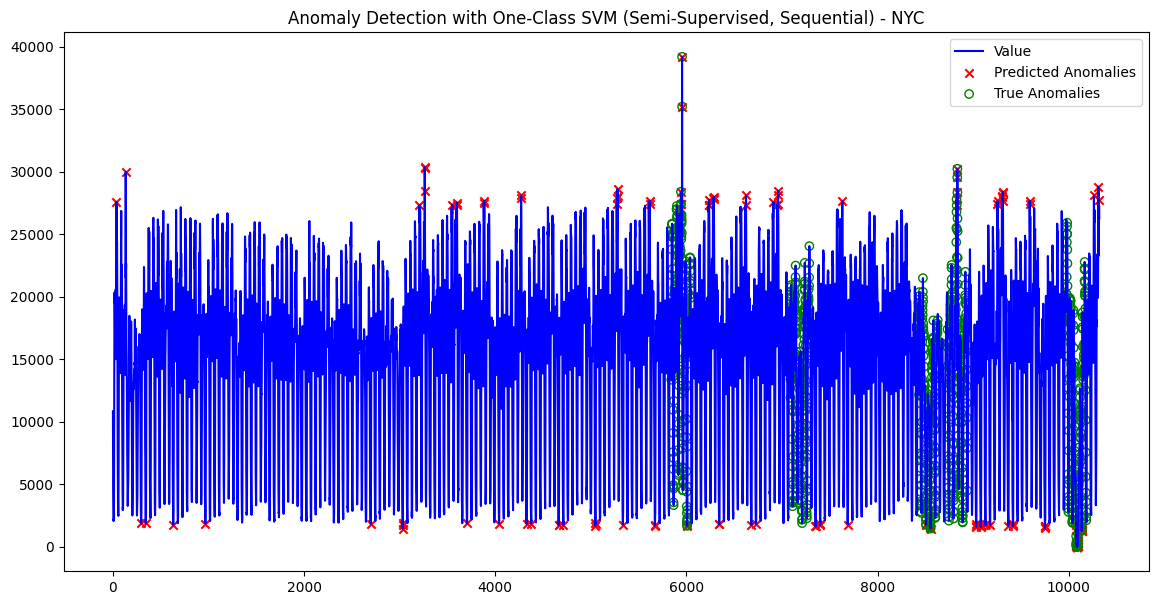

In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


param_grid = {
    'nu': [0.01, 0.05, 0.1, 0.5, 0.7],
    'kernel': ['rbf'],
    'gamma': ['scale', 'auto']
}
grid = ParameterGrid(param_grid)

# Feature engineering for sequential data
data_features = data["realKnownCause"]["nyc_taxi.csv"]

# Separate features and labels
X = data_features.drop(columns=['timestamp','label'])  # Drop the label column
y = data_features['label']  # Ground truth labels

# Separate normal data for training
X_normal = X[y == 0]  # Use only normal data for training
y_test = y  # Full ground truth for evaluation

# Normalize features
scaler = MinMaxScaler()
X_normal_normalized = scaler.fit_transform(X_normal)  # Normalize only normal training data
X_normalized = scaler.transform(X)  # Normalize the entire dataset for evaluation

# Hyperparameter tuning using grid search
best_f1 = -1
best_precision = -1
best_recall = -1
best_nab = float("-inf")
best_params = None
best_predictions = None

for params in grid:
    # Train One-Class SVM using only normal instances
    ocsvm = OneClassSVM(
        nu=params['nu'],
        kernel=params['kernel'],
        gamma=params['gamma']
    )
    ocsvm.fit(X_normal_normalized)  # Train on normal data only

    # Predict sequentially
    predictions = ocsvm.predict(X_normalized)

    # Map predictions to binary (1 = anomaly, 0 = normal)
    predictions = [1 if pred == -1 else 0 for pred in predictions]

    # Adjust detections by adding the offset
    detections = [i for i, x in enumerate(predictions) if x == 1]

    # Compute the NAB score
    nab_score = compute_raw_score_debug(detections, anomaly_windows["nyc_taxi.csv"], A_tp = 1.0, A_fp = -0.11, A_fn = -1.0)

    # Calculate metrics
    f1 = f1_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)

    # Update best parameters if current F1 is better
    if nab_score > best_nab:
        best_f1 = f1
        best_precision = precision
        best_recall = recall
        best_params = params
        best_predictions = predictions
        best_nab = nab_score

# Output best parameters and metrics for current dataset
print(f"Best F1 Score for NYC]: {best_f1:.4f}")
print(f"Best Precision: {best_precision:.4f}")
print(f"Best Recall: {best_recall:.4f}")
print(f"Best Parameters: {best_params}")
print(f"Best NAB Score: {best_nab:.4f}")

# Add predictions to the original DataFrame for inspection
data_features['predictions'] = best_predictions

# Visualize anomalies
plt.figure(figsize=(14, 7))
plt.plot(data_features.index, data_features[f"value"], label='Value', color='blue')
plt.scatter(data_features[data_features['predictions'] == 1].index,
            data_features[data_features['predictions'] == 1][f"value"],
            color='red', label='Predicted Anomalies', marker='x')
plt.scatter(data_features[data_features['label'] == 1].index,
            data_features[data_features['label'] == 1][f"value"],
            color='green', label='True Anomalies', marker='o', facecolors="none")

plt.title(f'Anomaly Detection with One-Class SVM (Semi-Supervised, Sequential) - NYC')
plt.legend()
plt.show()